# Notebook para Análisis de Precios de Toyota Corolla


## Carga del dataset


In [1057]:
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import mlflow

Traemos el dataframe que quedó guardado por el asset anterior


In [1058]:
from pathlib import Path

raw_path = Path("data/raw_df.csv").resolve()
raw_dataset = pd.read_csv(raw_path)

Hacemos una copia para que nos quedé intacto el original por si lo necesitamos para después


In [1059]:
# Cargar dataset
df = raw_dataset.copy()

## Descripción del dataset


Vamos viendo qué onda este dataset


In [1060]:
df.shape

(1436, 37)

In [1061]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1436 entries, 0 to 1435
Data columns (total 37 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Id                1436 non-null   int64 
 1   Model             1436 non-null   object
 2   Price             1436 non-null   int64 
 3   Age_08_04         1436 non-null   int64 
 4   Mfg_Month         1436 non-null   int64 
 5   Mfg_Year          1436 non-null   int64 
 6   KM                1436 non-null   int64 
 7   Fuel_Type         1436 non-null   object
 8   HP                1436 non-null   int64 
 9   Met_Color         1436 non-null   int64 
 10  Automatic         1436 non-null   int64 
 11  cc                1436 non-null   int64 
 12  Doors             1436 non-null   int64 
 13  Cylinders         1436 non-null   int64 
 14  Gears             1436 non-null   int64 
 15  Quarterly_Tax     1436 non-null   int64 
 16  Weight            1436 non-null   int64 
 17  Mfr_Guarantee 

In [1062]:
df.describe().T

count          mean           std     min       25%  \
Id                1436.0    721.555014    416.476890     1.0    361.75   
Price             1436.0  10730.824513   3626.964585  4350.0   8450.00   
Age_08_04         1436.0     55.947075     18.599988     1.0     44.00   
Mfg_Month         1436.0      5.548747      3.354085     1.0      3.00   
Mfg_Year          1436.0   1999.625348      1.540722  1998.0   1998.00   
KM                1436.0  68533.259749  37506.448872     1.0  43000.00   
HP                1436.0    101.502089     14.981080    69.0     90.00   
Met_Color         1436.0      0.674791      0.468616     0.0      0.00   
Automatic         1436.0      0.055710      0.229441     0.0      0.00   
cc                1436.0   1576.855850    424.386770  1300.0   1400.00   
Doors             1436.0      4.033426      0.952677     2.0      3.00   
Cylinders         1436.0      4.000000      0.000000     4.0      4.00   
Gears             1436.0      5.026462      0.188510     3.0      5.00   
Quarterly_Tax     1436.0     87.122563     41.128611    19.0     69.00   
Weight            1436.0   1072.459610     52.641120  1000.0   1040.00   
Mfr_Guarantee     1436.0      0.409471      0.491907     0.0      0.00   
BOVAG_Guarantee   1436.0      0.895543      0.305959     0.0      1.00   
Guarantee_Period  1436.0      3.815460      3.011025     3.0      3.00   
ABS               1436.0      0.813370      0.389750     0.0      1.00   
Airbag_1          1436.0      0.970752      0.168559     0.0      1.00   
Airbag_2          1436.0      0.722841      0.447751     0.0      0.00   
Airco             1436.0      0.508357      0.500104     0.0      0.00   
Automatic_airco   1436.0      0.056407      0.230786     0.0      0.00   
Boardcomputer     1436.0      0.294568      0.456007     0.0      0.00   
CD_Player         1436.0      0.218663      0.413483     0.0      0.00   
Central_Lock      1436.0      0.580084      0.493717     0.0      0.00   
Powered_Windows   1436.0      0.561978      0.496317     0.0      0.00   
Power_Steering    1436.0      0.977716      0.147657     0.0      1.00   
Radio             1436.0      0.146240      0.353469     0.0      0.00   
Mistlamps         1436.0      0.256964      0.437111     0.0      0.00   
Sport_Model       1436.0      0.300139      0.458478     0.0      0.00   
Backseat_Divider  1436.0      0.770195      0.420854     0.0      1.00   
Metallic_Rim      1436.0      0.204735      0.403649     0.0      0.00   
Radio_cassette    1436.0      0.145543      0.352770     0.0      0.00   
Tow_Bar           1436.0      0.277855      0.448098     0.0      0.00   

                      50%       75%       max  
Id                  721.5   1081.25    1442.0  
Price              9900.0  11950.00   32500.0  
Age_08_04            61.0     70.00      80.0  
Mfg_Month             5.0      8.00      12.0  
Mfg_Year           1999.0   2001.00    2004.0  
KM                63389.5  87020.75  243000.0  
HP                  110.0    110.00     192.0  
Met_Color             1.0      1.00       1.0  
Automatic             0.0      0.00       1.0  
cc                 1600.0   1600.00   16000.0  
Doors                 4.0      5.00       5.0  
Cylinders             4.0      4.00       4.0  
Gears                 5.0      5.00       6.0  
Quarterly_Tax        85.0     85.00     283.0  
Weight             1070.0   1085.00    1615.0  
Mfr_Guarantee         0.0      1.00       1.0  
BOVAG_Guarantee       1.0      1.00       1.0  
Guarantee_Period      3.0      3.00      36.0  
ABS                   1.0      1.00       1.0  
Airbag_1              1.0      1.00       1.0  
Airbag_2              1.0      1.00       1.0  
Airco                 1.0      1.00       1.0  
Automatic_airco       0.0      0.00       1.0  
Boardcomputer         0.0      1.00       1.0  
CD_Player             0.0      0.00       1.0  
Central_Lock          1.0      1.00       1.0  
Powered_Windows       1.0      1.00       1.0  
Power_Stee

In [1063]:
df.head(15)

Id                                              Model  Price  Age_08_04  \
0    1      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13500         23   
1    2      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13750         23   
2    3     ?TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  13950         24   
3    4      TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors  14950         26   
4    5        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  13750         30   
5    6        TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors  12950         32   
6    7     ?TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  16900         27   
7    8      TOYOTA Corolla 2.0 D4D 90 3DR TERRA 2/3-Doors  18600         30   
8    9       ?TOYOTA Corolla 1800 T SPORT VVT I 2/3-Doors  21500         27   
9   10       ?TOYOTA Corolla 1.9 D HATCHB TERRA 2/3-Doors  12950         23   
10  11  TOYOTA Corolla 1.8 VVTL-i T-Sport 3-Drs 2/3-Doors  20950         25   
11  12  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT BNS 2...  19950         22   
12  13  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  19600         25   
13  14  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  21500         31   
14  15  TOYOTA Corolla 1.8 16V VVTLI 3DR T SPORT 2/3-D...  22500         32   

    Mfg_Month  Mfg_Year     KM Fuel_Type   HP  Met_Color  ...  Central_Lock  \
0          10      2002  46986    Diesel   90          1  ...             1   
1          10      2002  72937    Diesel   90          1  ...             1   
2           9      2002  41711    Diesel   90          1  ...             0   
3           7      2002  48000    Diesel   90          0  ...             0   
4           3      2002  38500    Diesel   90          0  ...             1   
5           1      2002  61000    Diesel   90          0  ...             1   
6           6      2002  94612    Diesel   90          1  ...             1   
7           3      2002  75889    Diesel   90          1  ...             1   
8           6      2002  19700    Petrol  192          0  ...             1   
9          10      2002  71138    Diesel   69          0  ...             0   
10          8      2002  31461    Petrol  192          0  ...             1   
11         11      2002  43610    Petrol  192          0  ...             1   
12          8      2002  32189    Petrol  192          0  ...             1   
13          2      2002  23000    Petrol  192          1  ...             1   
14          1      2002  34131    Petrol  192          1  ...             1   

    Powered_Windows  Power_Steering  Radio  Mistlamps  Sport_Model  \
0                 1               1      0          0            0   
1                 0               1      0          0            0   
2                 0               1      0          0            0   
3                 0               1      0          0            0   
4                 1               1      0          1            0   
5                 1               1      0          1            0   
6                 1               1      0          0            1   
7                 1               1      0          0            0   
8                 1               1      1          0            0   
9                 0               1      0          0            0   
10                1               1      0          0            0   
11                1               1      0          1            1   
12                1               1      0          1            1   
13                1               1      0          1            1   
14                1               1      0          1            1   

    Backseat_Divider  Metallic_Rim  Radio_cassette  Tow_Bar  
0                  1             0               0        0  
1                  1             0               0        0  
2                  1             0               0        0  
3                  1             0               0        0  
4                  1             0         

## EDA


Vamos viendo que **ID** es un identificador incremental, nos sirve poco y nada realmente. **Cylinders** es constante, su max y su min son 4, no varía. Hay muchas columnas bandera para indicar equipamiento, algo vamos a tener que hacer con eso.


Hacemos un histograma para estar features que nos llamaron la atención


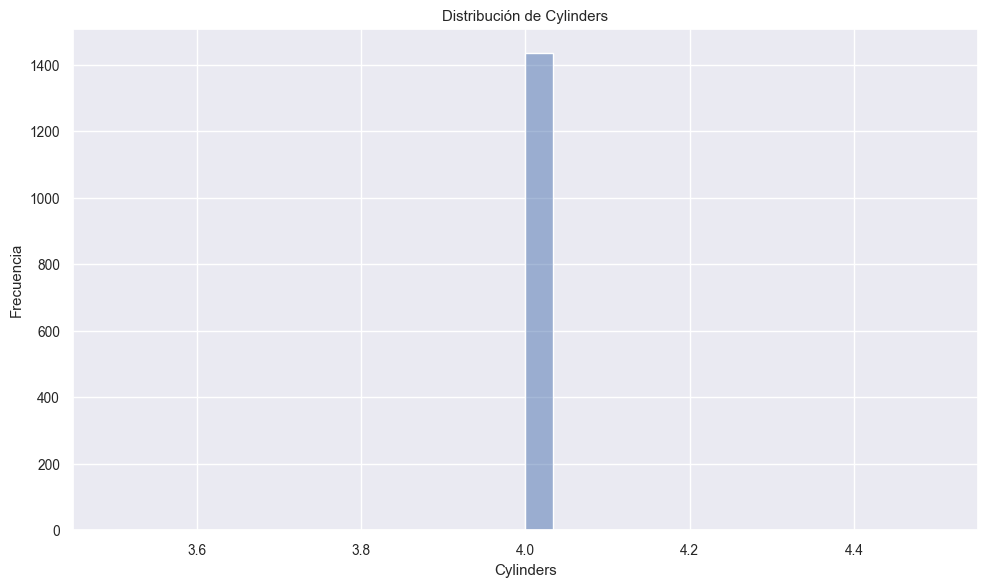

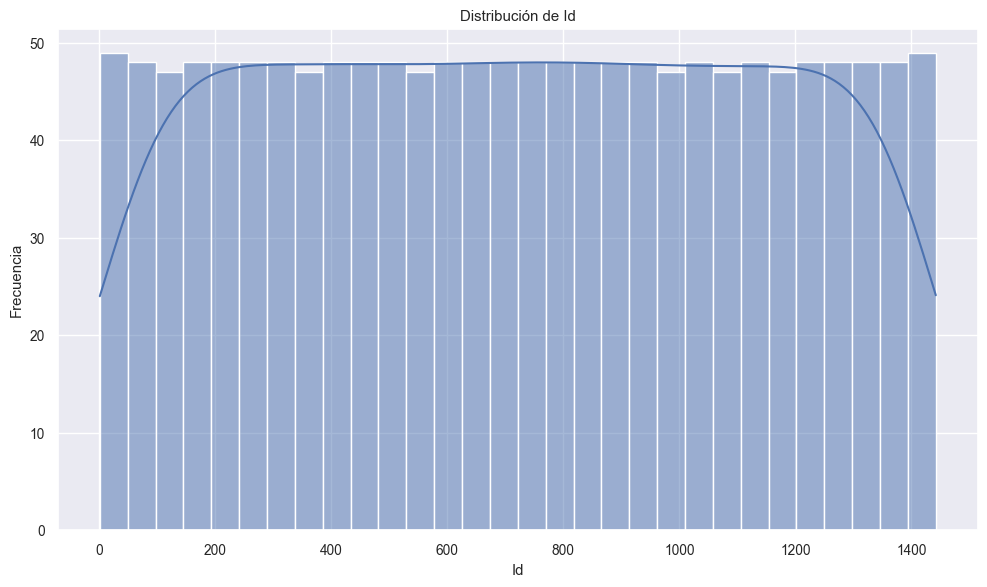

In [1064]:
from utils import histogram_feature


selected_features = ["Cylinders", "Id"]

for feature in selected_features:
    histogram_feature(df, feature)

Efectivamente, no nos sirven en absoluto


Las vamos sacando


In [1065]:
df = df.drop(columns=["Id", "Cylinders"])

Veamos qué onda las columnas que son banderas


In [1066]:
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)
print(bool_cols)

['Met_Color', 'Automatic', 'Mfr_Guarantee', 'BOVAG_Guarantee', 'ABS', 'Airbag_1', 'Airbag_2', 'Airco', 'Automatic_airco', 'Boardcomputer', 'CD_Player', 'Central_Lock', 'Powered_Windows', 'Power_Steering', 'Radio', 'Mistlamps', 'Sport_Model', 'Backseat_Divider', 'Metallic_Rim', 'Radio_cassette', 'Tow_Bar']


Son varias, no sabemos qué significan


Buscamos en internet qué onda esas features, encontramos esto:


1. **Id**
   Identificador único de cada vehículo en el dataset.

2. **Model**
   Versión o acabado del Toyota Corolla (por ejemplo, “Corolla D”, “Corolla GLi”).

3. **Price**
   Precio de venta del automóvil (en la unidad monetaria del dataset, p. ej., euros u otra).

4. **Age_08_04**
   Edad del coche, en años, referida al 4 de agosto de 2004 (fecha de corte utilizada para calcular antigüedad).

5. **Mfg_Month**
   Mes de fabricación del vehículo (1 = enero … 12 = diciembre).

6. **Mfg_Year**
   Año de fabricación del vehículo.

7. **KM**
   Kilometraje recorrido por el coche (en kilómetros).

8. **Fuel_Type**
   Tipo de combustible:

   - “Petrol” (gasolina)
   - “Diesel” (diésel)
   - “CNG” (gas natural comprimido)

9. **HP**
   Potencia del motor en caballos de fuerza (Horse Power).

10. **Met_Color**
    Indicador de pintura metálica (1 = sí, 0 = no).

11. **Automatic**
    Tipo de transmisión (1 = automática, 0 = manual).

12. **cc**
    Cilindrada del motor en centímetros cúbicos (cm³).

13. **Doors**
    Número de puertas del vehículo.

14. **Cylinders**
    Número de cilindros del motor.

15. **Gears**
    Número de marchas de la transmisión.

16. **Quarterly_Tax**
    Importe del impuesto de circulación o matriculación que se paga trimestralmente (en la misma unidad monetaria que Price).

17. **Weight**
    Peso del vehículo en kilogramos.

18. **Mfr_Guarantee**
    Garantía del fabricante (1 = incluida, 0 = no incluida).

19. **BOVAG_Guarantee**
    Garantía ofrecida por BOVAG (asociación neerlandesa de concesionarios) (1 = incluida, 0 = no).

20. **Guarantee_Period**
    Duración de la garantía (en años).

21. **ABS**
    Sistema antibloqueo de frenos (Anti-lock Braking System) (1 = sí, 0 = no).

22. **Airbag_1**
    Airbag para el conductor (1 = sí, 0 = no).

23. **Airbag_2**
    Airbag para el pasajero delantero (1 = sí, 0 = no).

24. **Airco**
    Aire acondicionado (1 = sí, 0 = no).

25. **Automatic_airco**
    Control automático de la temperatura (climatizador) (1 = sí, 0 = no).

26. **Boardcomputer**
    Ordenador de a bordo (display con información de viaje, consumo, etc.) (1 = sí, 0 = no).

27. **CD_Player**
    Reproductor de CD (1 = sí, 0 = no).

28. **Central_Lock**
    Cierre centralizado de puertas (1 = sí, 0 = no).

29. **Powered_Windows**
    Elevalunas eléctricos (1 = sí, 0 = no).

30. **Power_Steering**
    Dirección asistida (1 = sí, 0 = no).

31. **Radio**
    Radio estándar (1 = sí, 0 = no).

32. **Mistlamps**
    Faros antiniebla (1 = sí, 0 = no).

33. **Sport_Model**
    Edición deportiva del modelo (1 = sí, 0 = no).

34. **Backseat_Divider**
    Separador o consola entre asientos traseros (1 = sí, 0 = no).

35. **Metallic_Rim**
    Llantas de aleación metálica (1 = sí, 0 = no).

36. **Radio_cassette**
    Radio con reproductor de casete (1 = sí, 0 = no).

37. **Tow_Bar**
    Enganche de remolque o bola de remolque (1 = sí, 0 = no).


Veamos qué peso tienen sobre la variable objetivo, podemos hacer una matriz de correlación solamente de las banderas, a ver si son importantes


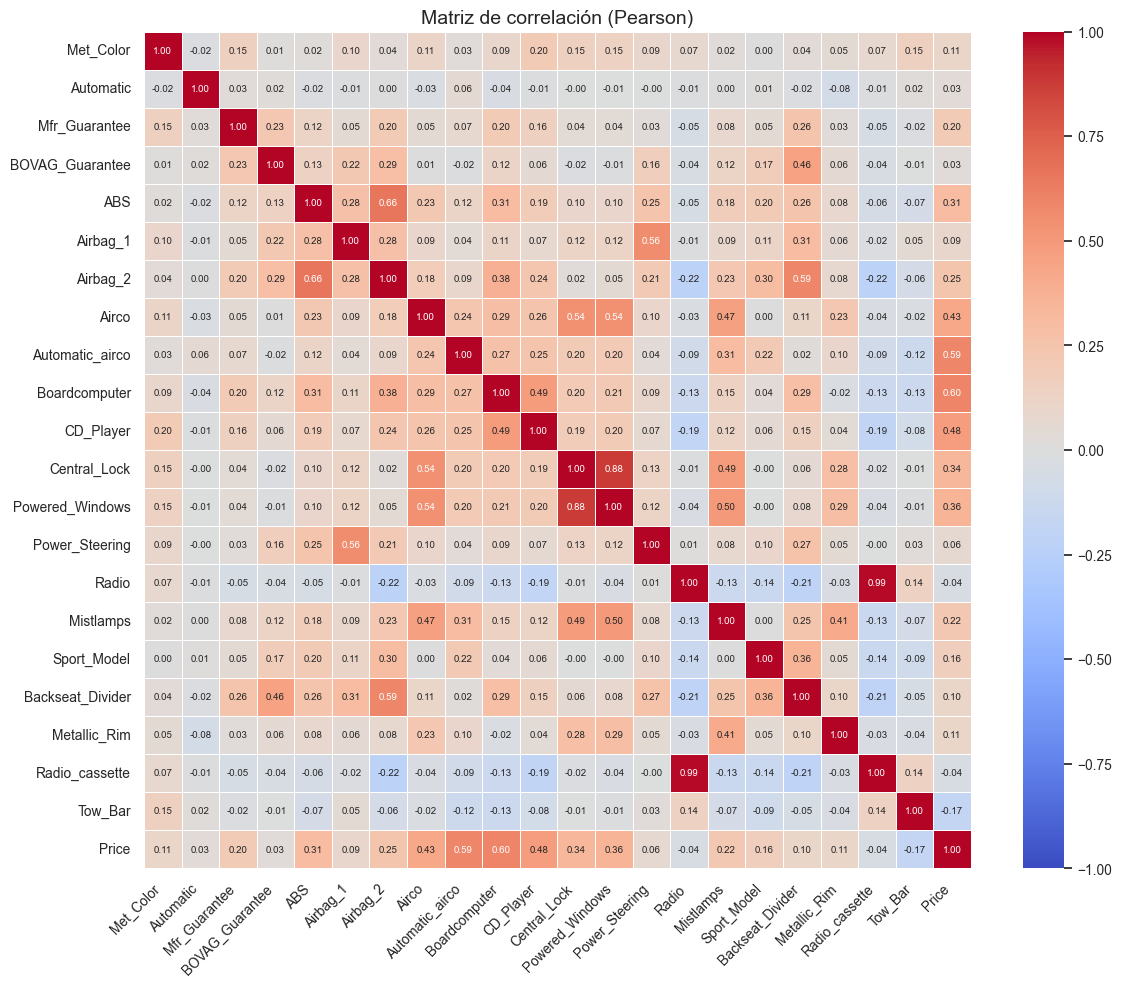

In [1067]:
from utils import show_correlation_matrix


matrix = show_correlation_matrix(df[bool_cols + ["Price"]])

Lo primero que llama la atención es la correlación tan fuerte que existe entre radio y radio_cassette. Tiene sentido. Nos podemos quedar con una nomás, ambas tienen el mismo peso sobre Price.


In [1068]:
# Contar filas donde Radio y Radio_cassette difieren
diferentes = (df["Radio"] != df["Radio_cassette"]).sum()
print(f"Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': {diferentes}")
print(f"Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': {len(df) - diferentes}")

Número de filas con valores distintos entre 'Radio' y 'Radio_cassette': 3
Número de filas con valores iguales entre 'Radio' y 'Radio_cassette': 1433


Prácticamente siempre que hay radio hay radio cassette, borramos una


In [1069]:
df = df.drop(columns=["Radio_cassette"])

Más allá de radio y radio_cassette, por comprensión del dominio, creemos que todas las demás correlaciones medianamente fuertes (no hay ninguna por encima de 0.60) son completamente dadas por el azar. Por ejemplo power_steering y airbag_1, o board_computer y CD_Player.


Seguimos mirando las variables


In [1070]:
df.describe().T

count          mean           std     min      25%  \
Price             1436.0  10730.824513   3626.964585  4350.0   8450.0   
Age_08_04         1436.0     55.947075     18.599988     1.0     44.0   
Mfg_Month         1436.0      5.548747      3.354085     1.0      3.0   
Mfg_Year          1436.0   1999.625348      1.540722  1998.0   1998.0   
KM                1436.0  68533.259749  37506.448872     1.0  43000.0   
HP                1436.0    101.502089     14.981080    69.0     90.0   
Met_Color         1436.0      0.674791      0.468616     0.0      0.0   
Automatic         1436.0      0.055710      0.229441     0.0      0.0   
cc                1436.0   1576.855850    424.386770  1300.0   1400.0   
Doors             1436.0      4.033426      0.952677     2.0      3.0   
Gears             1436.0      5.026462      0.188510     3.0      5.0   
Quarterly_Tax     1436.0     87.122563     41.128611    19.0     69.0   
Weight            1436.0   1072.459610     52.641120  1000.0   1040.0   
Mfr_Guarantee     1436.0      0.409471      0.491907     0.0      0.0   
BOVAG_Guarantee   1436.0      0.895543      0.305959     0.0      1.0   
Guarantee_Period  1436.0      3.815460      3.011025     3.0      3.0   
ABS               1436.0      0.813370      0.389750     0.0      1.0   
Airbag_1          1436.0      0.970752      0.168559     0.0      1.0   
Airbag_2          1436.0      0.722841      0.447751     0.0      0.0   
Airco             1436.0      0.508357      0.500104     0.0      0.0   
Automatic_airco   1436.0      0.056407      0.230786     0.0      0.0   
Boardcomputer     1436.0      0.294568      0.456007     0.0      0.0   
CD_Player         1436.0      0.218663      0.413483     0.0      0.0   
Central_Lock      1436.0      0.580084      0.493717     0.0      0.0   
Powered_Windows   1436.0      0.561978      0.496317     0.0      0.0   
Power_Steering    1436.0      0.977716      0.147657     0.0      1.0   
Radio             1436.0      0.146240      0.353469     0.0      0.0   
Mistlamps         1436.0      0.256964      0.437111     0.0      0.0   
Sport_Model       1436.0      0.300139      0.458478     0.0      0.0   
Backseat_Divider  1436.0      0.770195      0.420854     0.0      1.0   
Metallic_Rim      1436.0      0.204735      0.403649     0.0      0.0   
Tow_Bar           1436.0      0.277855      0.448098     0.0      0.0   

                      50%       75%       max  
Price              9900.0  11950.00   32500.0  
Age_08_04            61.0     70.00      80.0  
Mfg_Month             5.0      8.00      12.0  
Mfg_Year           1999.0   2001.00    2004.0  
KM                63389.5  87020.75  243000.0  
HP                  110.0    110.00     192.0  
Met_Color             1.0      1.00       1.0  
Automatic             0.0      0.00       1.0  
cc                 1600.0   1600.00   16000.0  
Doors                 4.0      5.00       5.0  
Gears                 5.0      5.00       6.0  
Quarterly_Tax        85.0     85.00     283.0  
Weight             1070.0   1085.00    1615.0  
Mfr_Guarantee         0.0      1.00       1.0  
BOVAG_Guarantee       1.0      1.00       1.0  
Guarantee_Period      3.0      3.00      36.0  
ABS                   1.0      1.00       1.0  
Airbag_1              1.0      1.00       1.0  
Airbag_2              1.0      1.00       1.0  
Airco                 1.0      1.00       1.0  
Automatic_airco       0.0      0.00       1.0  
Boardcomputer         0.0      1.00       1.0  
CD_Player             0.0      0.00       1.0  
Central_Lock          1.0      1.00       1.0  
Powered_Windows       1.0      1.00       1.0  
Power_Steering        1.0      1.00       1.0  
Radio                 0.0      0.00       1.0  
Mistlamps             0.0      1.00       1.0  
Sport_Model           0.0      1.00       1.0  
Backseat_Divider      1.0      1.00       1.0  
Metallic_Rim          0.0      0.00       1.0  
Tow_Bar               0.0      1.00       1.0

El mes de manufactura no debería servir así como está planteado, lo verificamos:


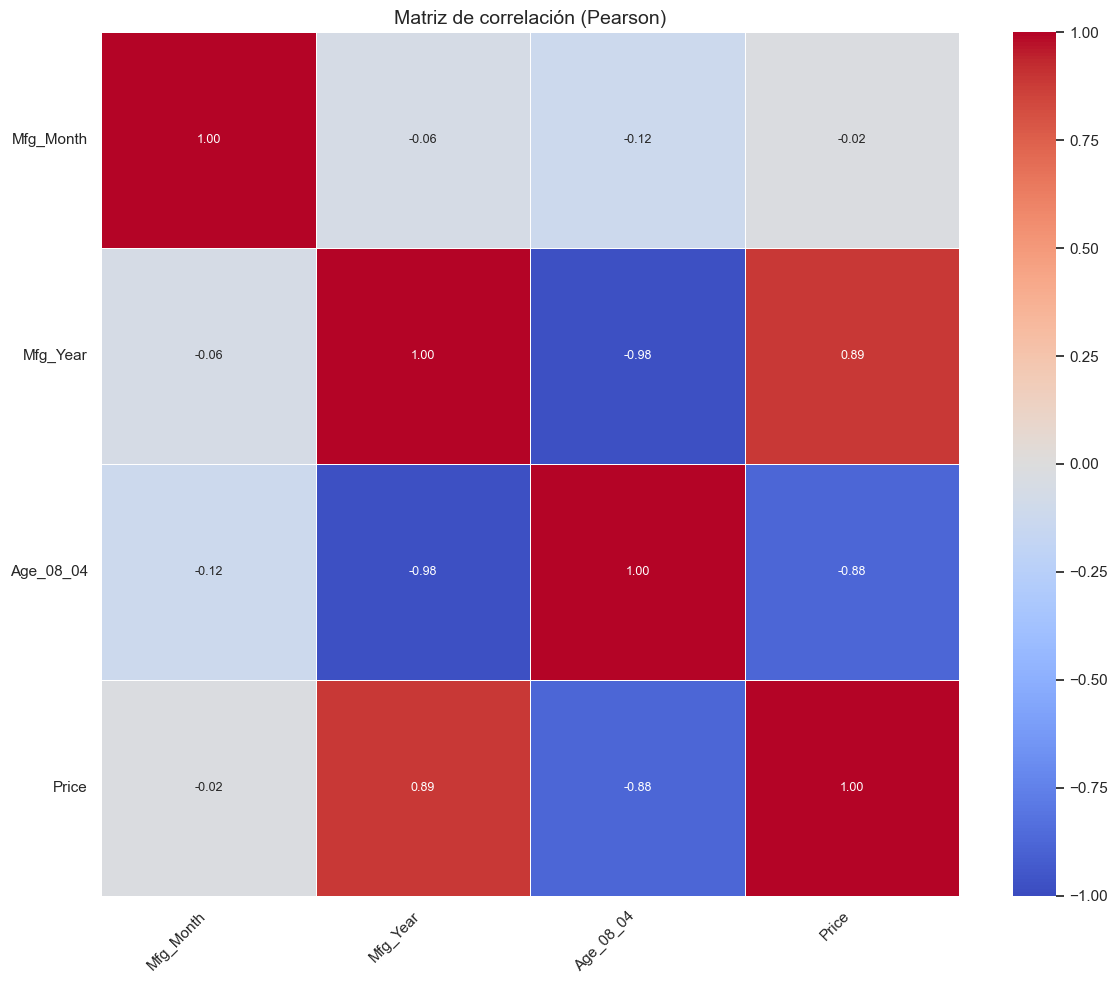

In [1071]:
matrix = show_correlation_matrix(df[["Mfg_Month", "Mfg_Year", "Age_08_04", "Price"]])

Como sospechábamos, el mes por sí solo no tiene ningún peso sobre el precio. Y columnas como año y edad son mucho más importantes. Nos deshacemos de la columna mes, no hay nada que rescatarle.


In [1072]:
df = df.drop(columns=["Mfg_Month"])

Vamos explorando otro lado, veamos lo de automatic


Empezamos con un histograma, para ver cómo está distribuida esta clase


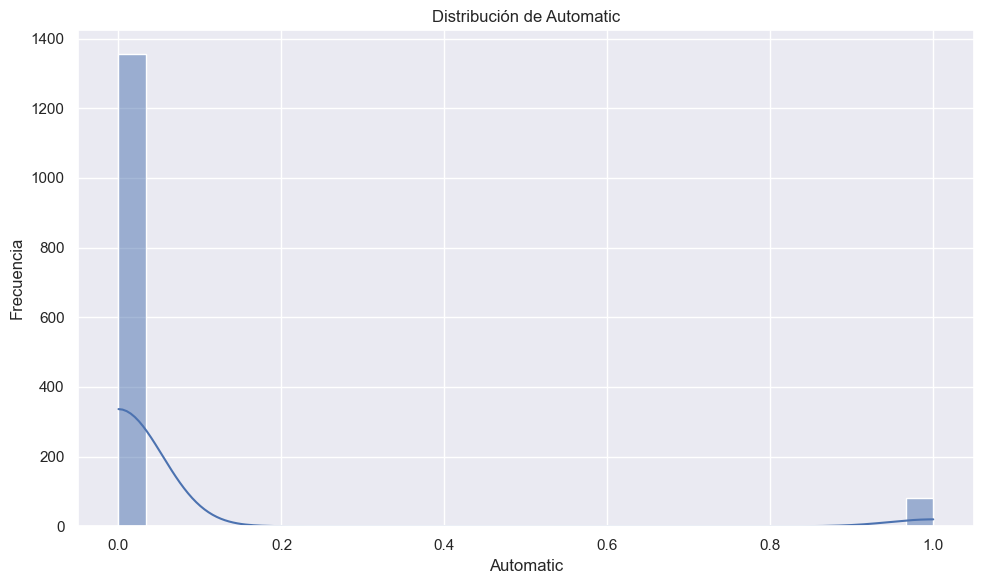

In [1073]:
histogram_feature(df, "Automatic")

In [1074]:
# Calcular porcentaje de filas con Automatic igual a 1 (True) y 0 (False)
total = len(df)
pct_true = (df["Automatic"] == 1).sum() / total * 100
pct_false = (df["Automatic"] == 0).sum() / total * 100

print(f"Porcentaje con Automatic=True: {pct_true:.2f}%")
print(f"Porcentaje con Automatic=False: {pct_false:.2f}%")

Porcentaje con Automatic=True: 5.57%
Porcentaje con Automatic=False: 94.43%


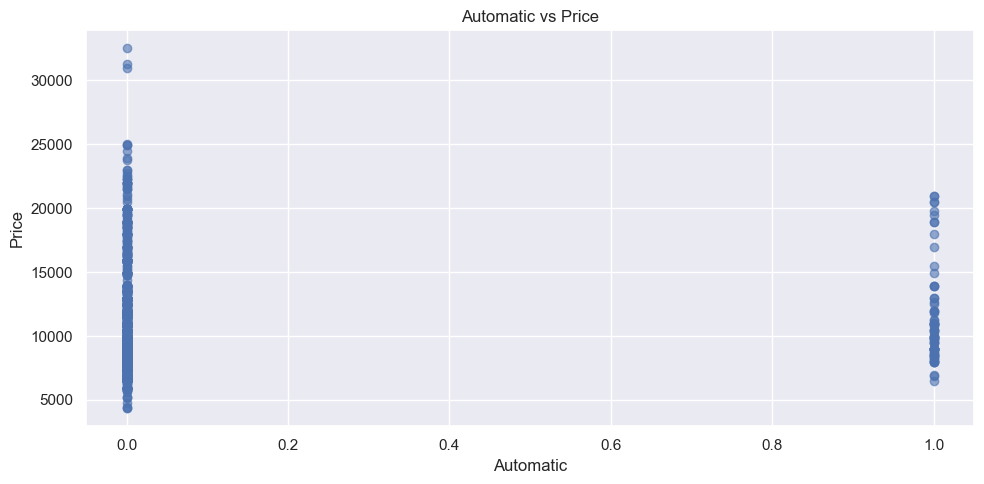

In [1075]:
from utils import scatter_feature_vs_target


scatter_feature_vs_target(df, "Automatic")

Veamos de qué año son los automáticos, capaz por edad valen menos


In [1076]:
precio_promedio_automaticos = df[df["Automatic"] == 1].groupby("Mfg_Year")["Price"].mean().sort_index()
precio_promedio_no_automaticos = df[df["Automatic"] == 0].groupby("Mfg_Year")["Price"].mean().sort_index()
precios_promedio = pd.DataFrame({
    "Automático": precio_promedio_automaticos,
    "Manual": precio_promedio_no_automaticos
})

print(precios_promedio)

            Automático        Manual
Mfg_Year                            
1998       8553.571429   7877.260989
1999      10020.961538   9295.638554
2000      11898.571429  10690.866972
2001      13029.375000  12242.173913
2002      18133.333333  16890.543210
2003      20320.000000  18562.828571
2004               NaN  22324.166667


Bueno, algo de influencia se ve, alrededor de mil dólares más.


Pero la clase está muy desbalanceada, veremos más adelante si vale la pena rescatar esta feature.


Aquí queremos ver si existen features que sean iguales entre sí, es decir si tienen todas el mismo valor 1 al mismo tiempo, y ver si se puede crear otra feature a partir de ellas


In [1077]:
from collections import defaultdict

# Calculamos bools cols devuelta porque ya borramos cosas antes
bool_cols = []
for col in df.columns:
    uniques = df[col].dropna().unique()
    if set(uniques).issubset({0, 1}) and df[col].dtype in [np.int64, np.int32, np.int8]:
        bool_cols.append(col)

groups = defaultdict(list)
for col in bool_cols:
    key = tuple(df[col].fillna(-1))
    groups[key].append(col)

duplicate_groups = [cols for cols in groups.values() if len(cols) > 1]

if duplicate_groups:
    print("Las siguientes columnas binarias son idénticas en todas las filas:")
    for group in duplicate_groups:
        print("  -", ", ".join(group))
else:
    print("No se encontraron columnas binarias idénticas entre sí.")

No se encontraron columnas binarias idénticas entre sí.


Bueno a primera vista no hay observaciones con todas las banderas con el mismo valor, más adelante vamos a seguir viendo esto.


Le peguemos un vistazo a met_color a ver en qué consiste


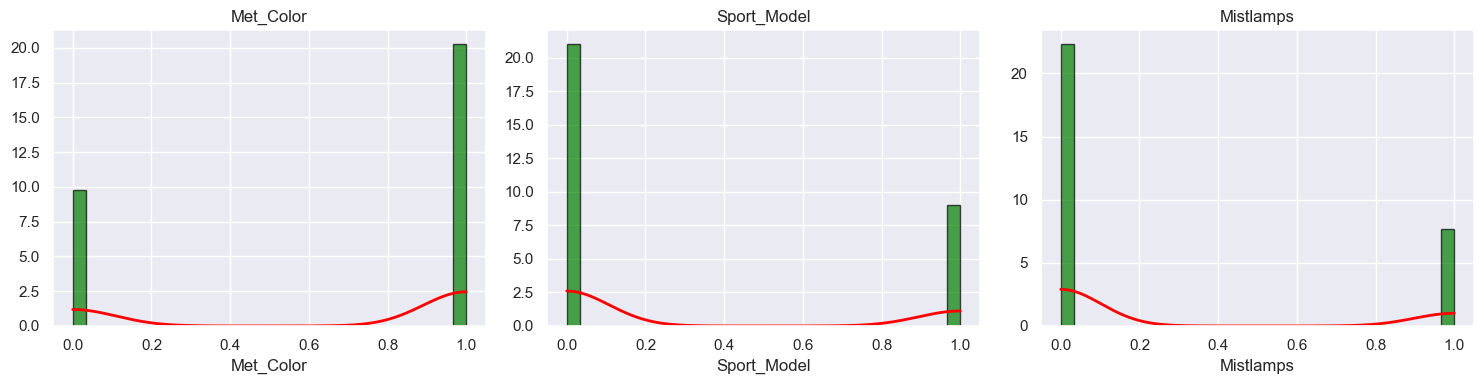

In [1078]:
from utils import histogram_by_batch


cols = ["Met_Color", "Sport_Model", "Mistlamps"]

histogram_by_batch(df[cols])

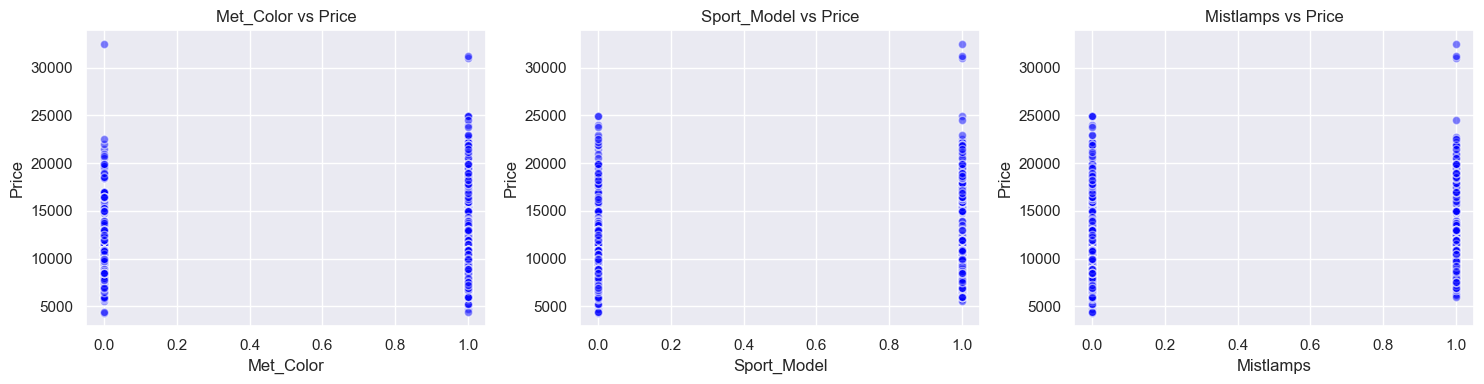

In [1079]:
from utils import scatter_plots_by_batch


cols = ["Met_Color", "Sport_Model", "Mistlamps", "Price"]

scatter_plots_by_batch(df[cols])

La variable Year tenía apenas más correlación con el precio que Age en meses, pensamos en armar un age expresado en años para tener esa myor correlación y reducir la escala de ese dato


<Axes: xlabel='Age_in_Years_08_04'>

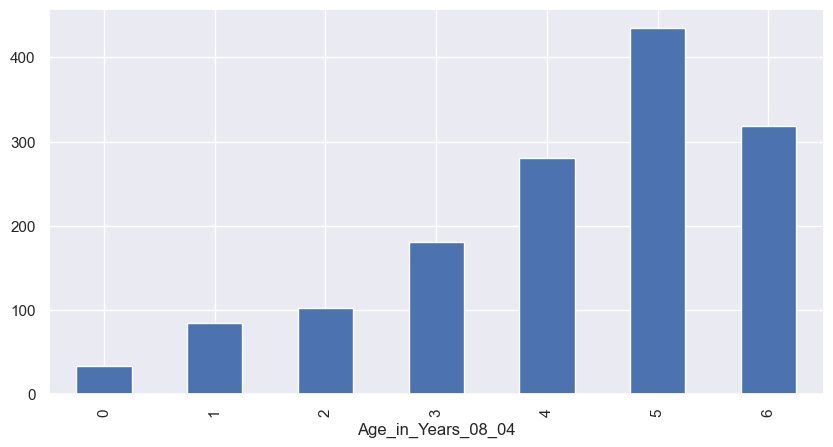

In [1080]:
df["Age_in_Years_08_04"] = (df["Age_08_04"] / 12).astype(int)
df["Age_in_Years_08_04"].value_counts().sort_index().plot(kind="bar", figsize=(10, 5))

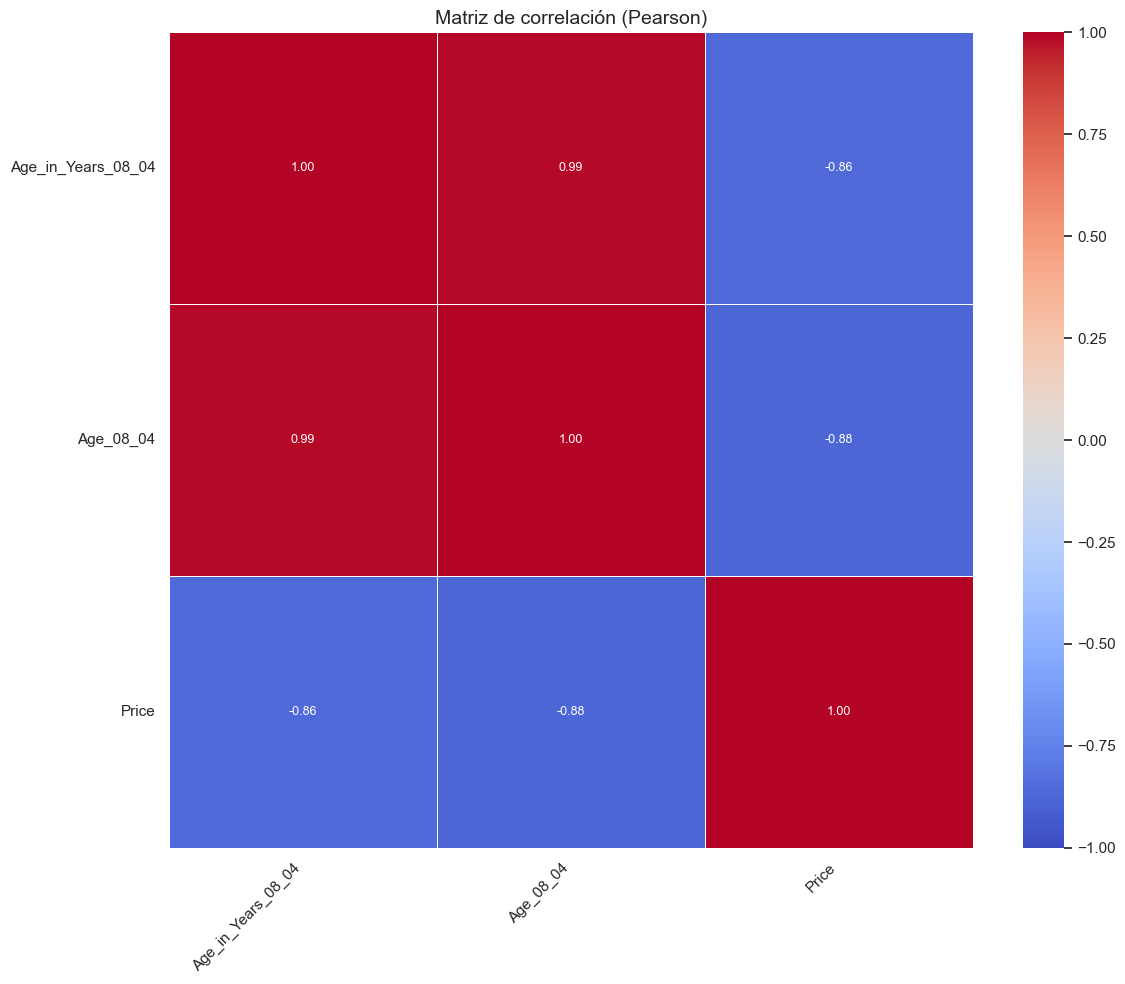

In [1081]:
matrix = show_correlation_matrix(df[["Age_in_Years_08_04", "Age_08_04", "Price"]])

Sigue teniendo más correlación Age en meses


De momento descartamos esto de expresar age de otra forma


<Axes: >

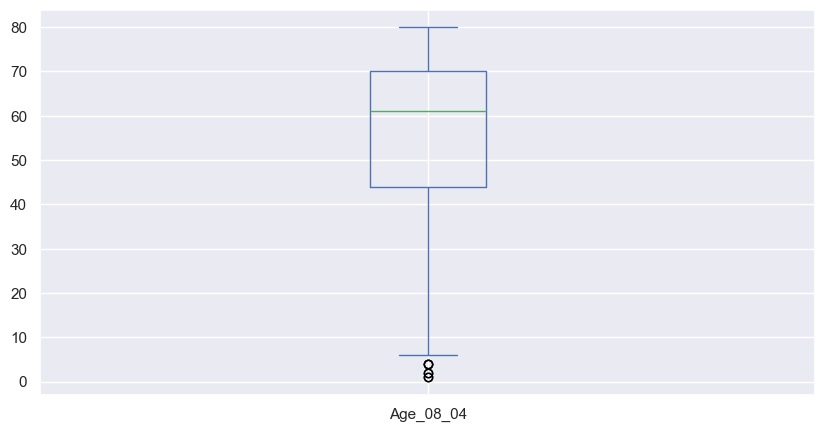

In [1082]:
df["Age_08_04"].plot(kind="box", figsize=(10, 5))

Las columnas binarias son muchas, y no agregan mucho valor por sí solas


In [1083]:
bool_cols

['Met_Color',
 'Automatic',
 'Mfr_Guarantee',
 'BOVAG_Guarantee',
 'ABS',
 'Airbag_1',
 'Airbag_2',
 'Airco',
 'Automatic_airco',
 'Boardcomputer',
 'CD_Player',
 'Central_Lock',
 'Powered_Windows',
 'Power_Steering',
 'Radio',
 'Mistlamps',
 'Sport_Model',
 'Backseat_Divider',
 'Metallic_Rim',
 'Tow_Bar']

Veamos la correlación que tiene cada una


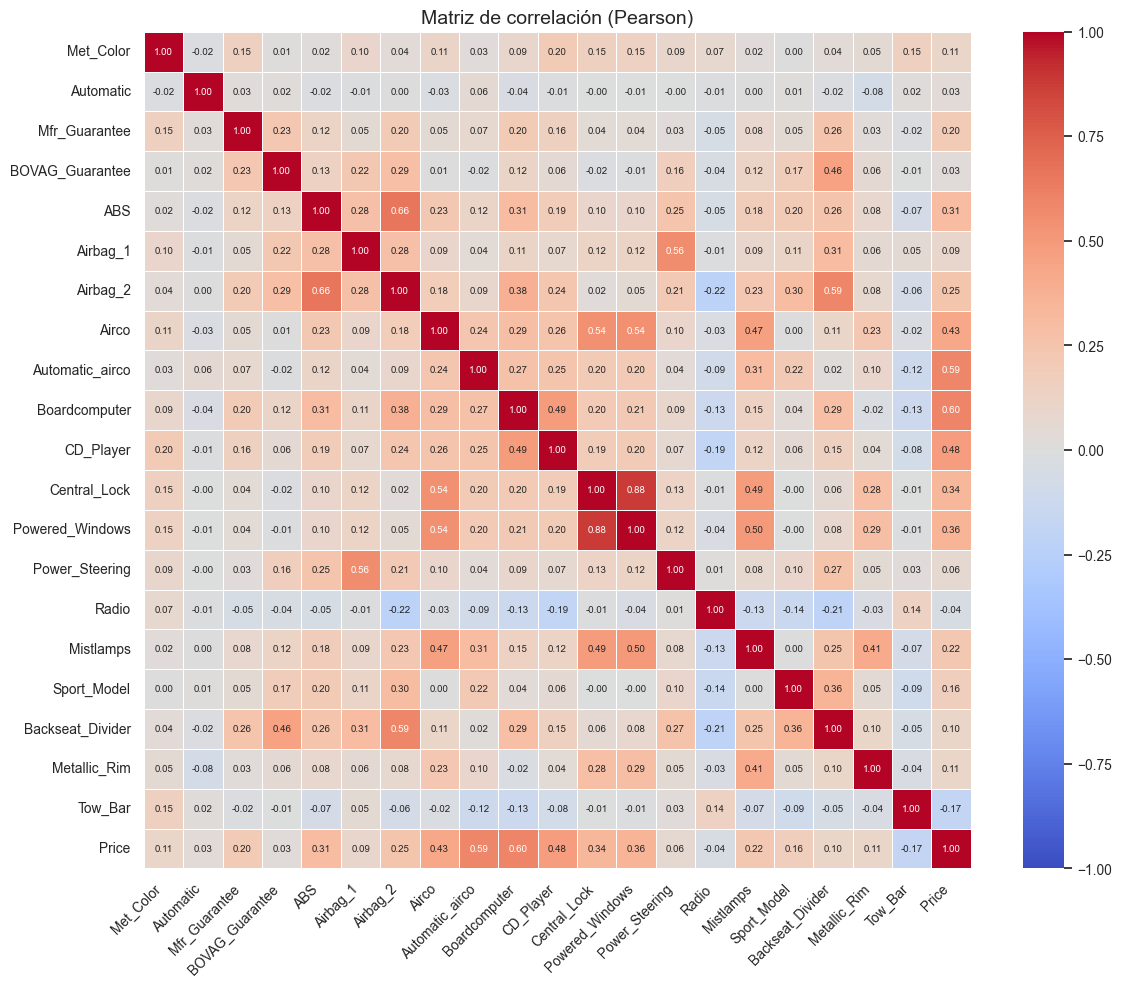

In [1084]:
matrix = show_correlation_matrix(df[bool_cols + ["Price"]])

De todas esas boolenas, algunas podemos considerarlas como equipamiento


In [1085]:
equipment_cols = [
    "ABS",
    "Airbag_1",
    "Airbag_2",
    "Airco",
    "Automatic_airco",
    "Boardcomputer",
    "CD_Player",
    "Central_Lock",
    "Powered_Windows",
    "Power_Steering",
    "Radio",
    "Mistlamps",
    "Backseat_Divider",
    "Tow_Bar",
]

Vemos qué tal están distribuidas estas variables


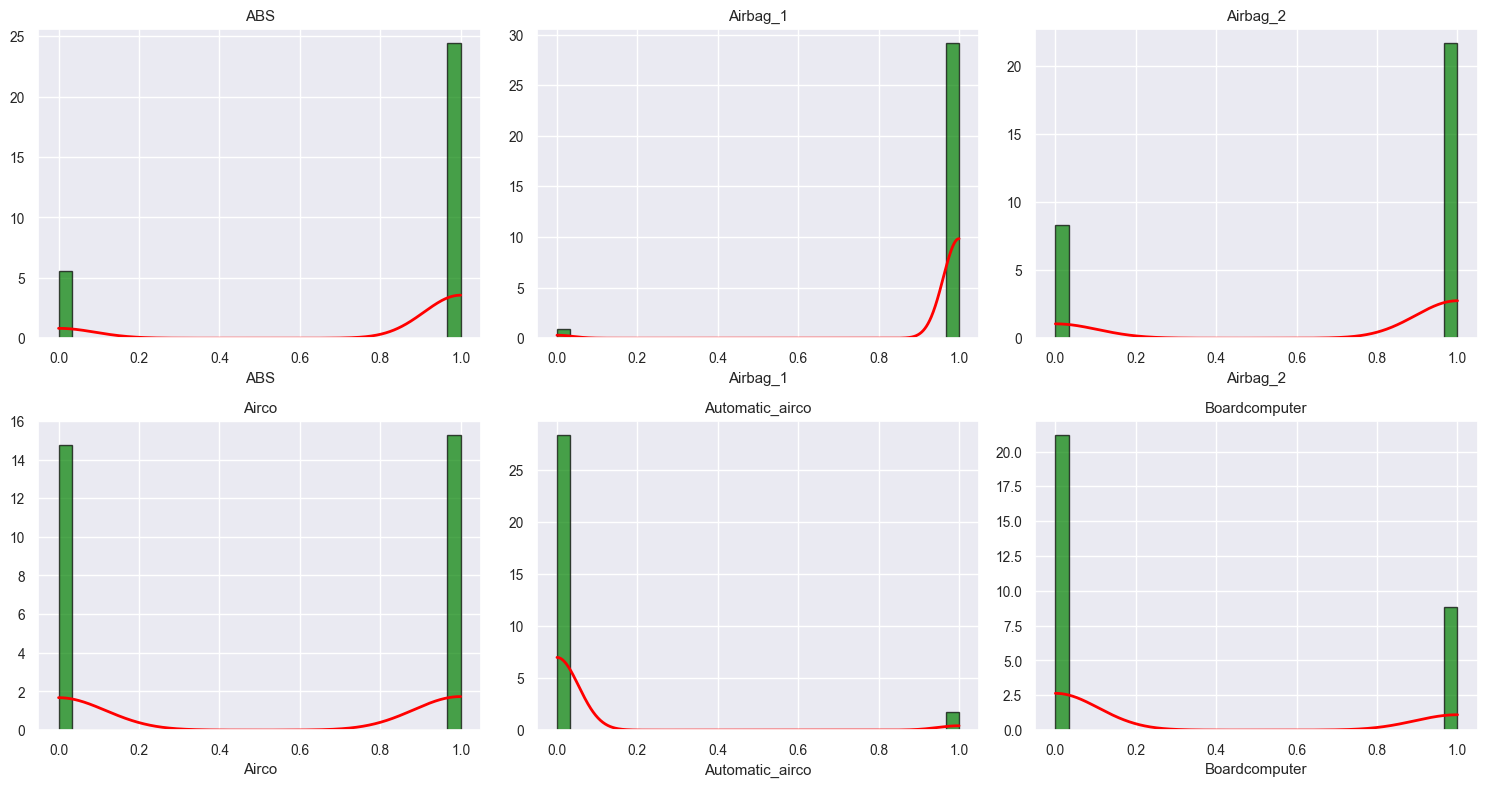

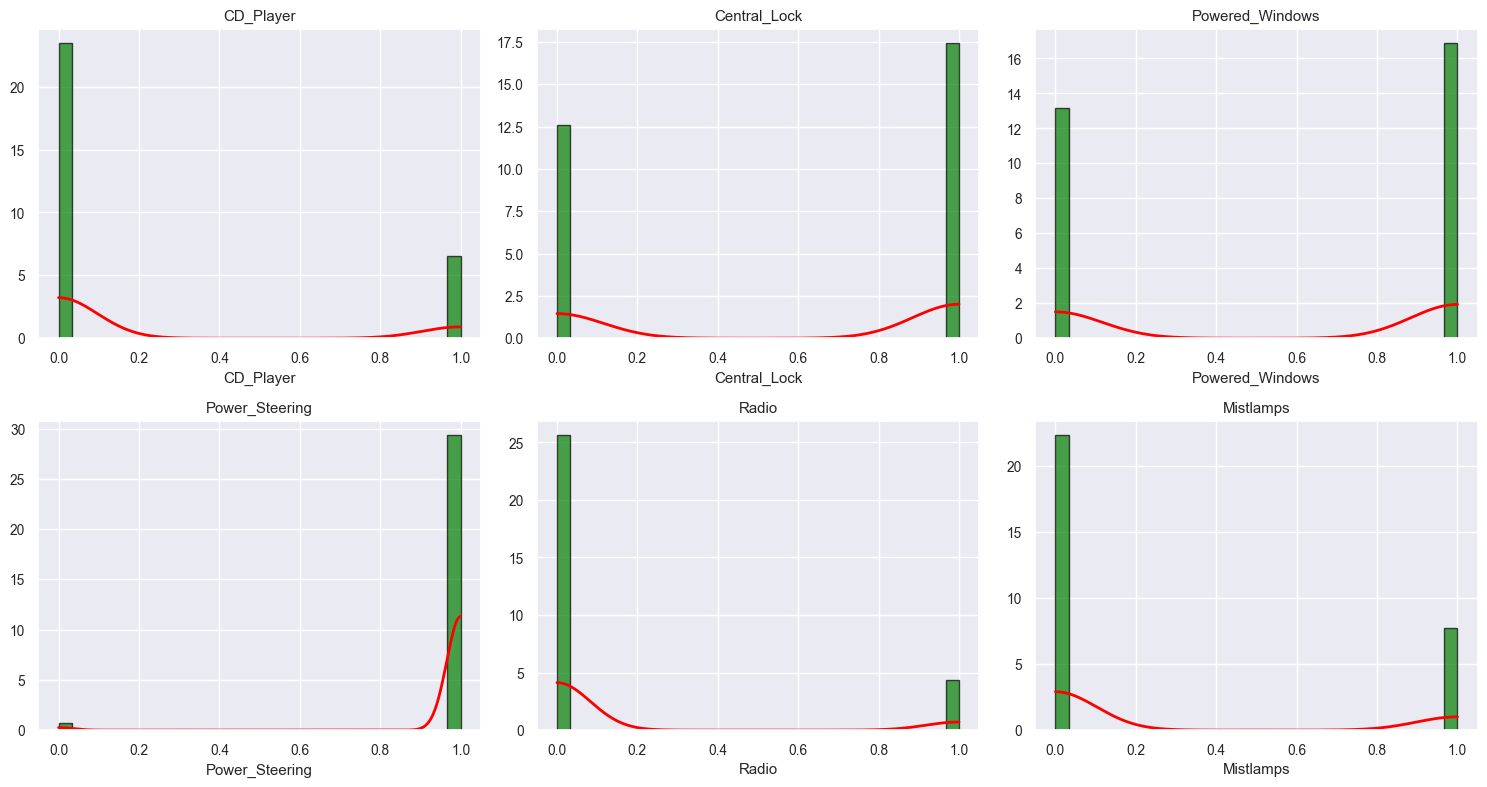

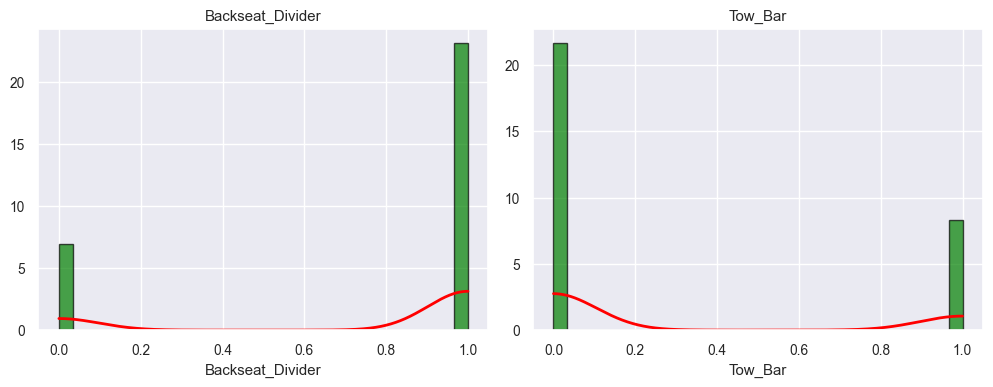

In [1086]:
histogram_by_batch(df[equipment_cols])

In [1087]:
correlations = df[equipment_cols + ["Price"]].corr()["Price"].abs().drop("Price")
weights = correlations / correlations.sum()
df["Equipment_Score"] = df[equipment_cols].mul(weights).sum(axis=1)

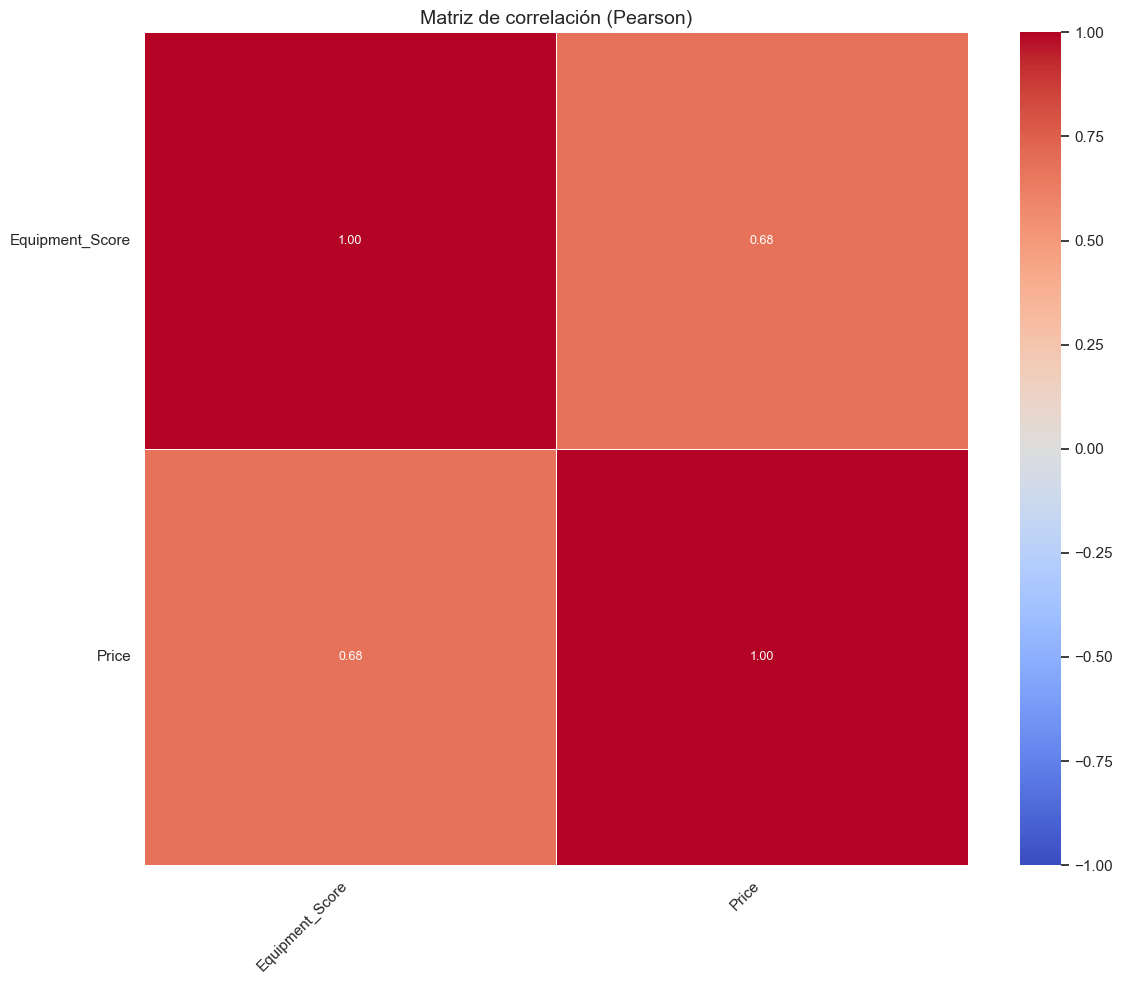

In [1088]:
matrix = show_correlation_matrix(df[["Equipment_Score", "Price"]])

<Axes: >

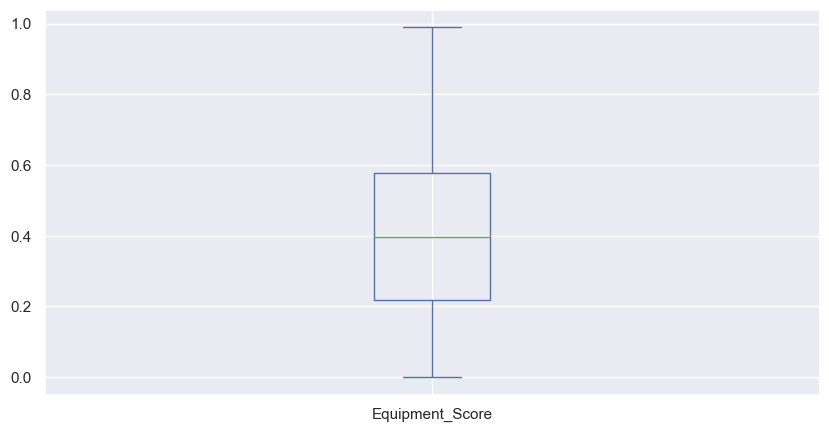

In [1089]:
df["Equipment_Score"].plot(kind="box", figsize=(10, 5))

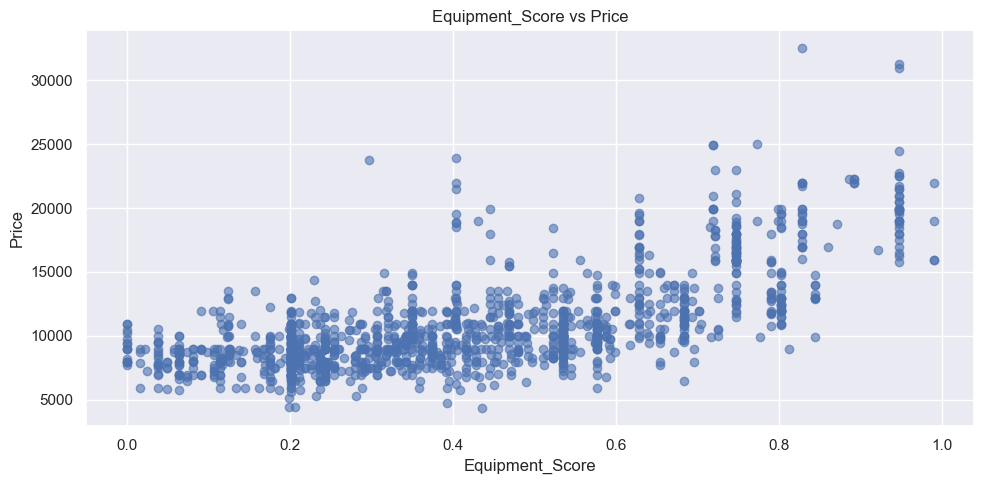

In [1090]:
scatter_feature_vs_target(df, "Equipment_Score")

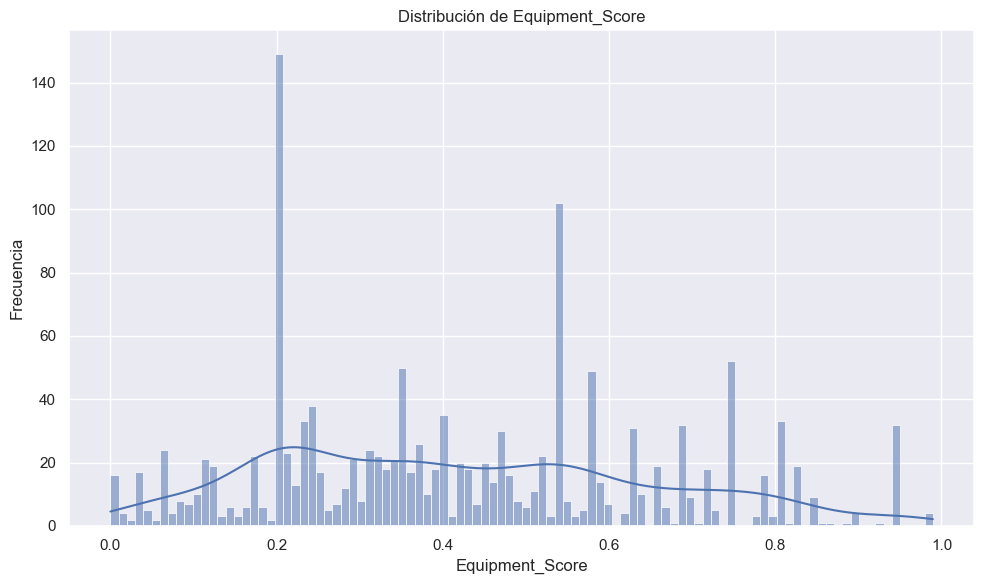

In [1091]:
histogram_feature(df, "Equipment_Score", bins=100)

<Axes: >

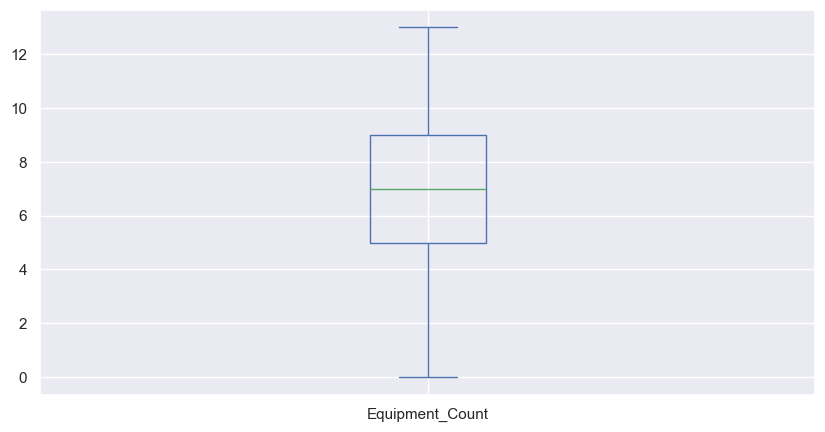

In [1092]:
df["Equipment_Count"] = df[equipment_cols].sum(axis=1)
df["Equipment_Count"].plot(kind="box", figsize=(10, 5))

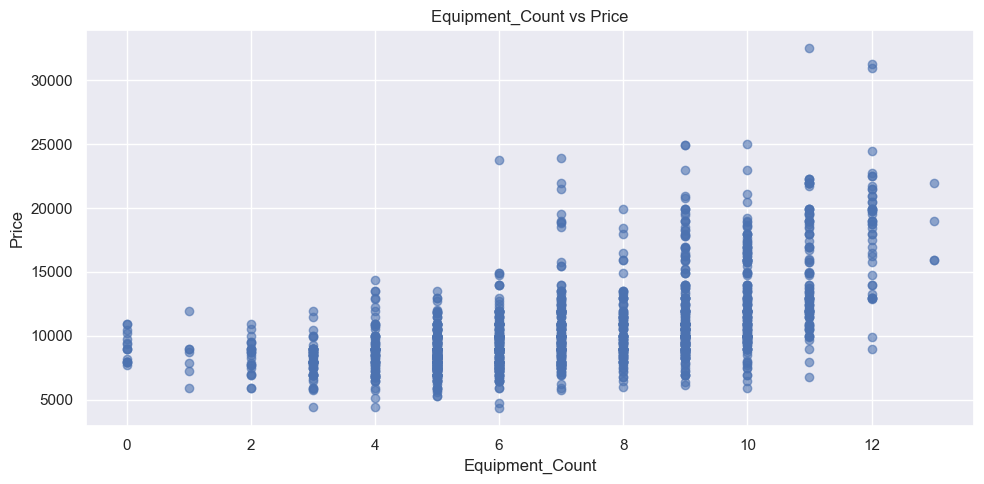

In [1093]:
scatter_feature_vs_target(df, "Equipment_Count")

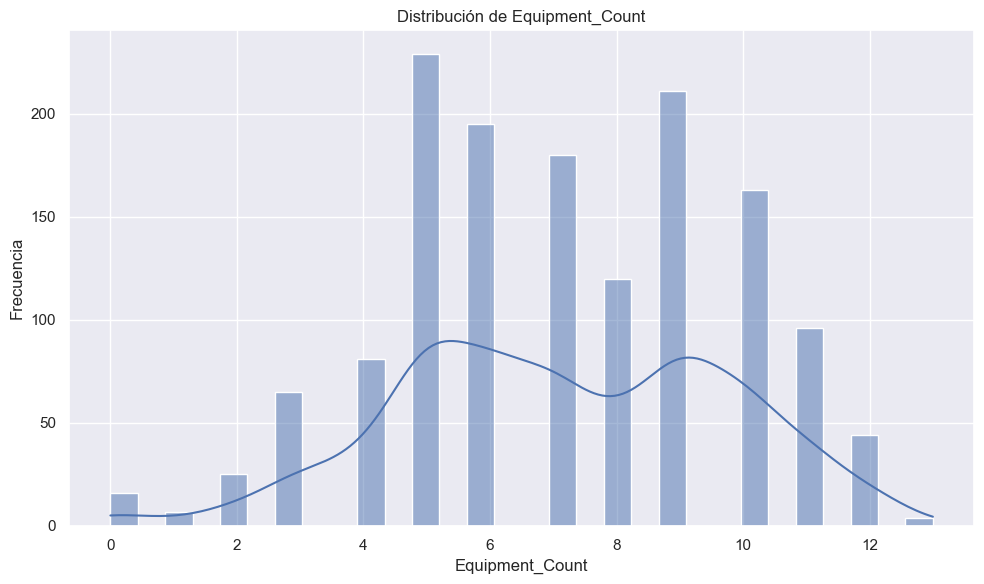

In [1094]:
histogram_feature(df, "Equipment_Count")

Probemos otra cosa, una feature que se fija si el auto tiene equipamiento premium. Del conocimiento del dominio, equipamiento premium sería climatizador, computadora a bordo


In [1095]:
df["Premium_Equipment"] = df["Automatic_airco"] | df["Boardcomputer"]

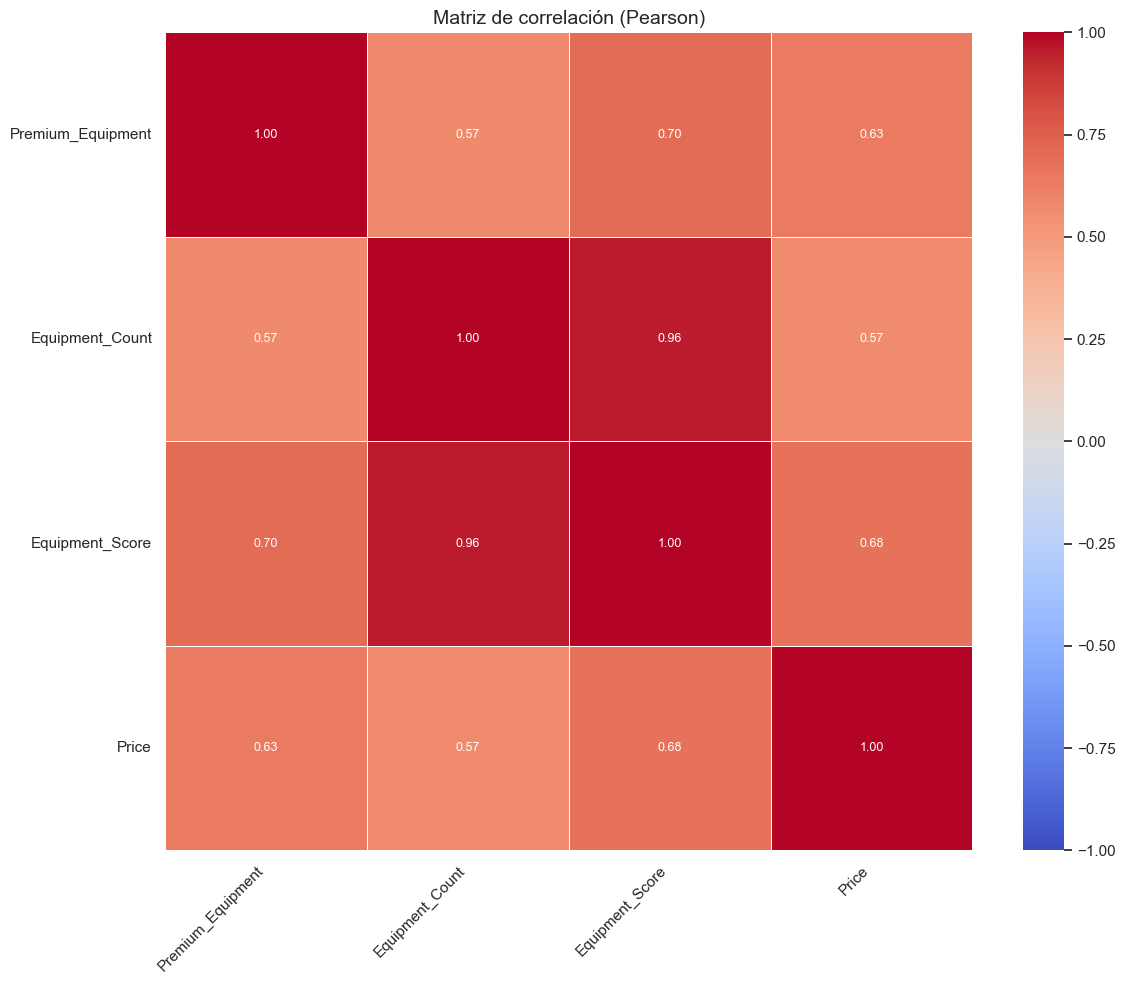

Premium_Equipment  Equipment_Count  Equipment_Score  \
Premium_Equipment           1.000000         0.574402         0.700499   
Equipment_Count             0.574402         1.000000         0.957956   
Equipment_Score             0.700499         0.957956         1.000000   
Price                       0.634287         0.566614         0.675821   

                      Price  
Premium_Equipment  0.634287  
Equipment_Count    0.566614  
Equipment_Score    0.675821  
Price              1.000000

In [1096]:
show_correlation_matrix(
    df[["Premium_Equipment", "Equipment_Count", "Equipment_Score", "Price"]]
)

Veamos cómo se distribuye premium equipment


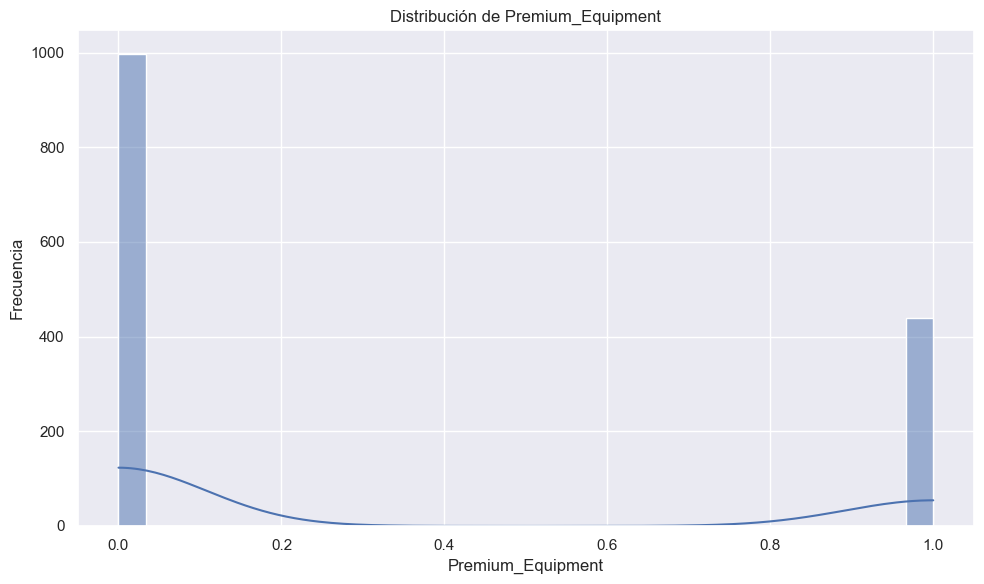

In [1097]:
histogram_feature(df, "Premium_Equipment")

Está sesgado a la izquierda Equipment_Socre, lo cuál es una pena porque tenemos 0,68 de correlación.


Y su scatter plot


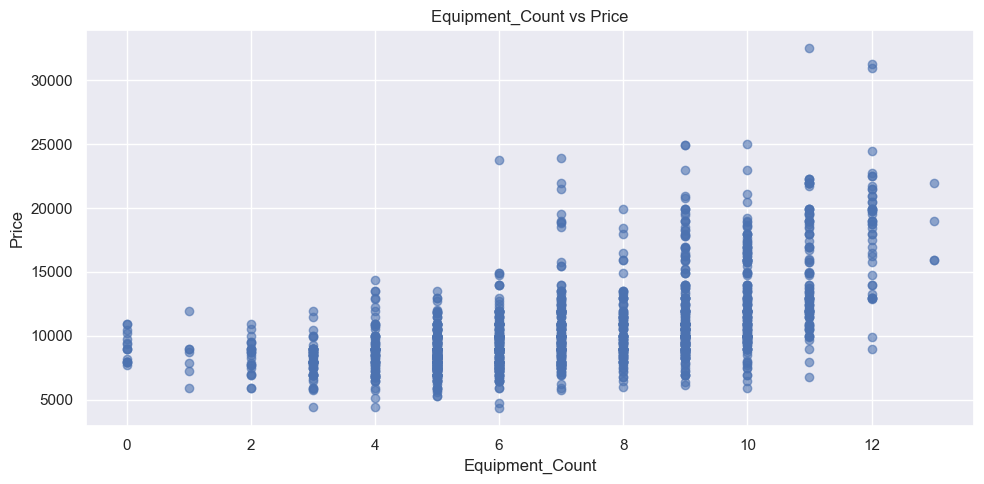

In [1098]:
scatter_feature_vs_target(df, "Equipment_Count")

Creemos que al principio, cuantos más equipamientos mejor, pero cuando ya se tiene una cierta base, se estabiliza el precio un poco, por el scatter plot creemos que una exponencial se ajustaría mejor


Veamos si con una transformación logarítmica podemos forzar su distribución a parecerse más a una normal


In [1099]:
df["Equip_Score_sqrt"] = np.sqrt(df["Equipment_Score"])

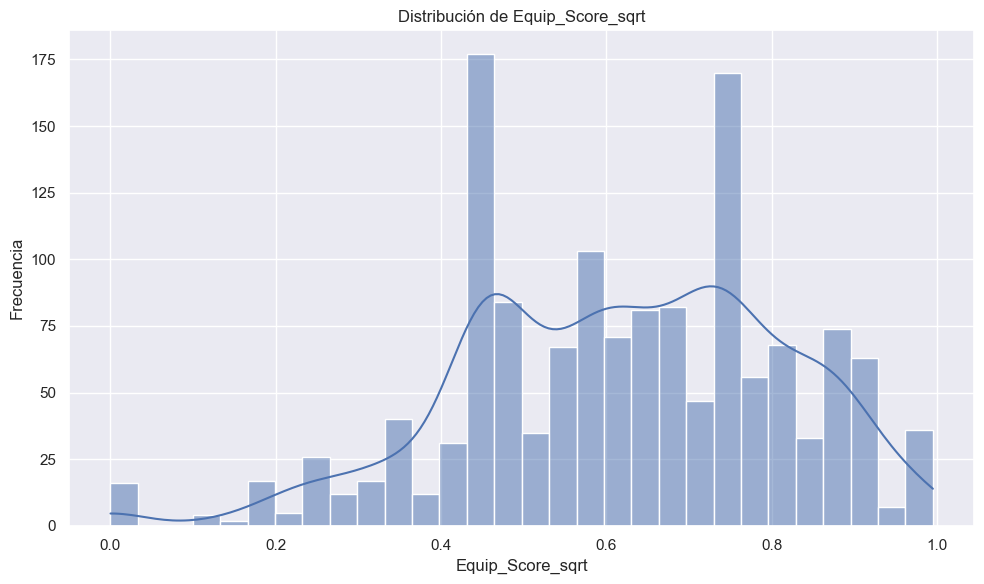

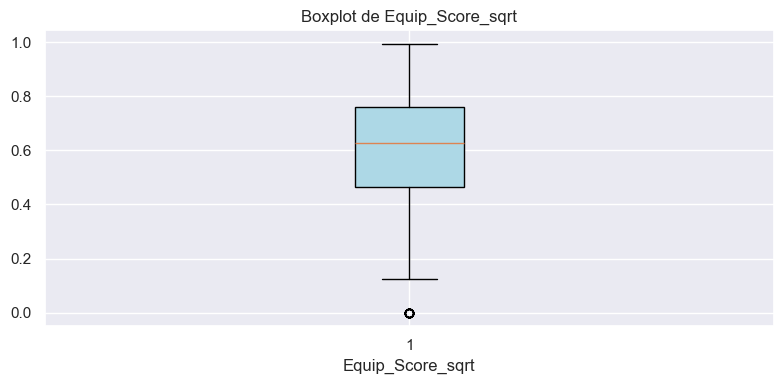

In [1100]:
from utils import boxplot_feature


histogram_feature(df, "Equip_Score_sqrt")
boxplot_feature(df, "Equip_Score_sqrt")

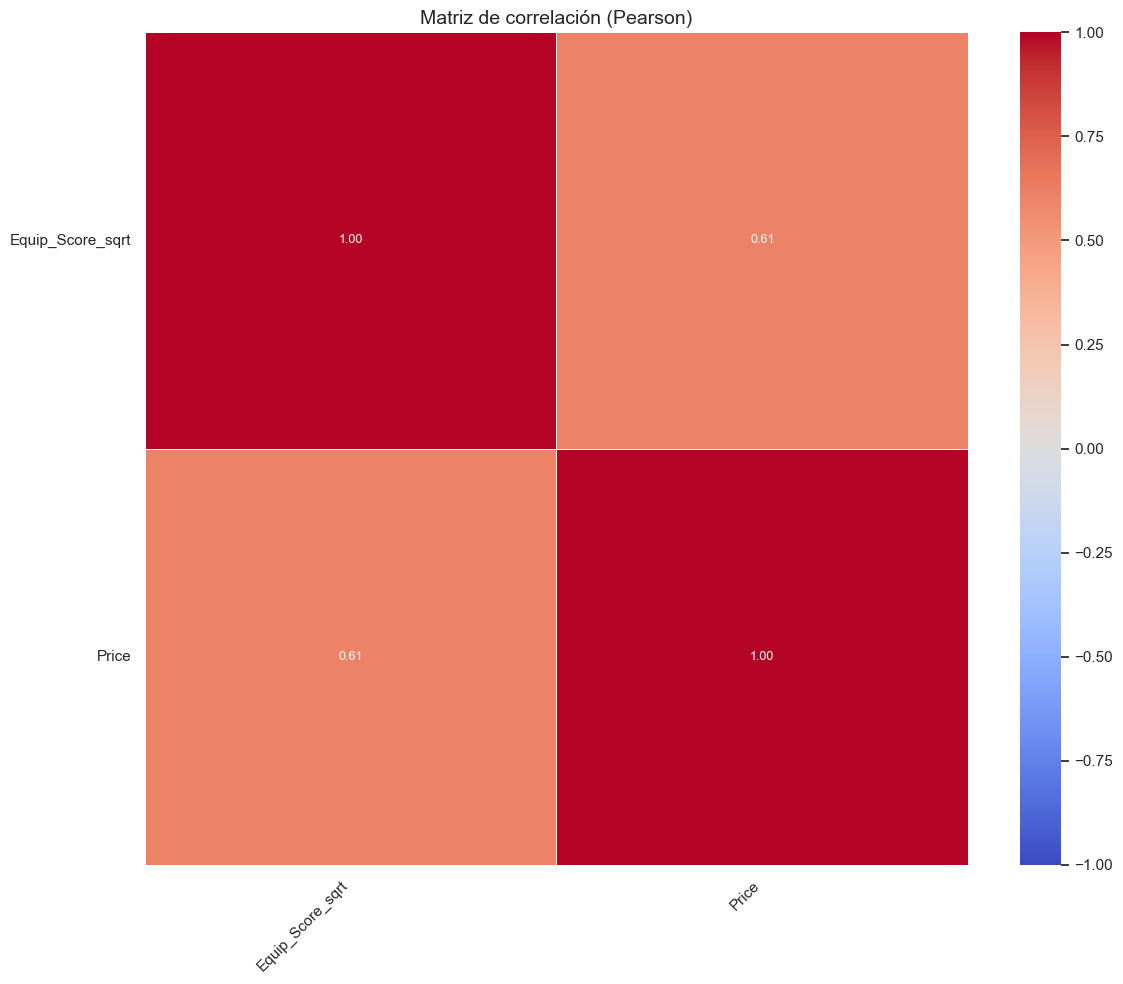

In [1101]:
matrix = show_correlation_matrix(df[["Equip_Score_sqrt", "Price"]])

In [1102]:
def tag_equipment(score):
    if score <= 0.2:
        return "Bajo"
    elif score <= 0.6:
        return "Medio"
    else:
        return "Alto"


df["Equipment_Level"] = df["Equipment_Score"].apply(tag_equipment)

dummies = pd.get_dummies(df["Equipment_Level"], prefix="Equip_Level").astype(int)
df = pd.concat([df, dummies], axis=1)

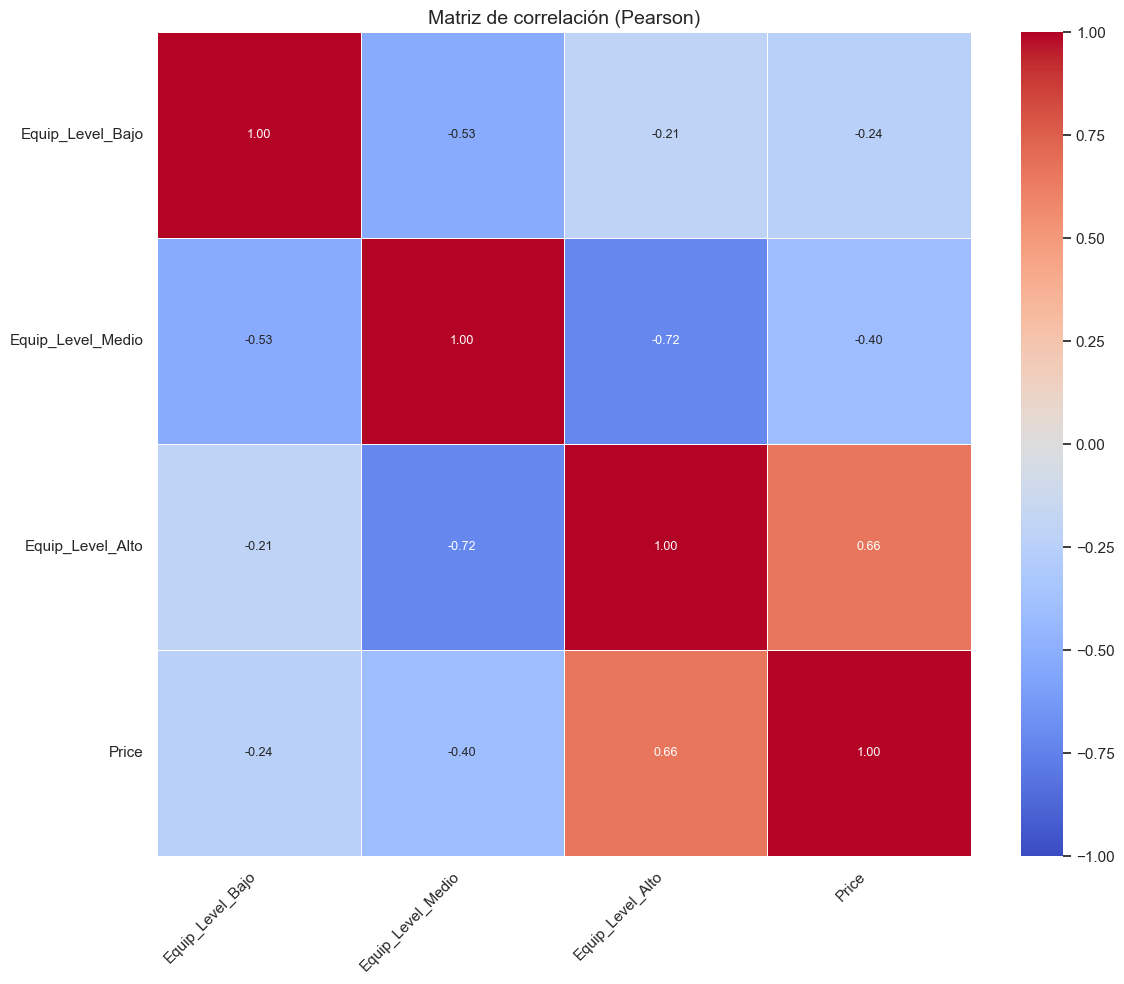

In [1103]:
matrix = show_correlation_matrix(
    df[["Equip_Level_Bajo", "Equip_Level_Medio", "Equip_Level_Alto", "Price"]]
)

Puede que Equip_Level_Alto tenga alguna utilidad


Veamos cómo está distribuida


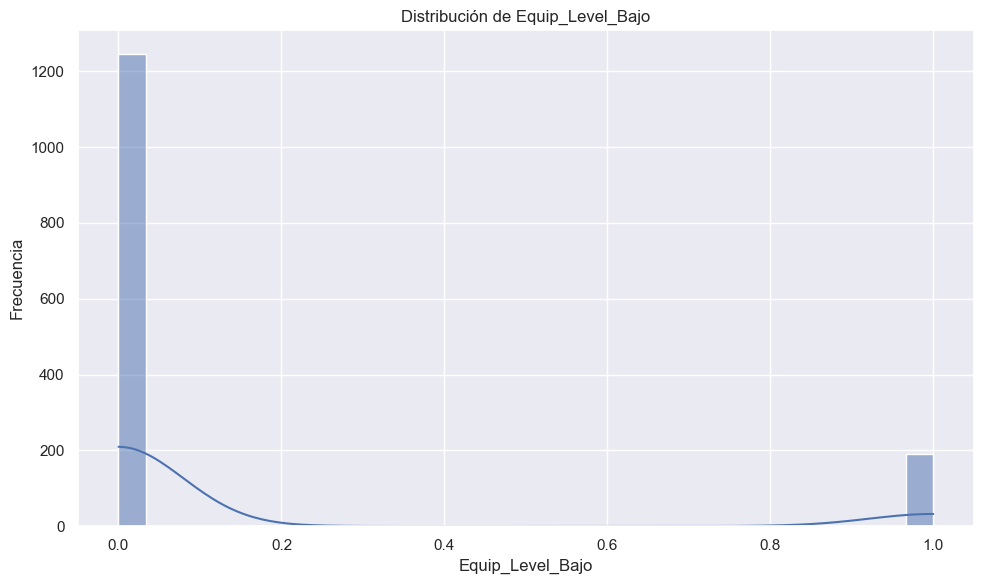

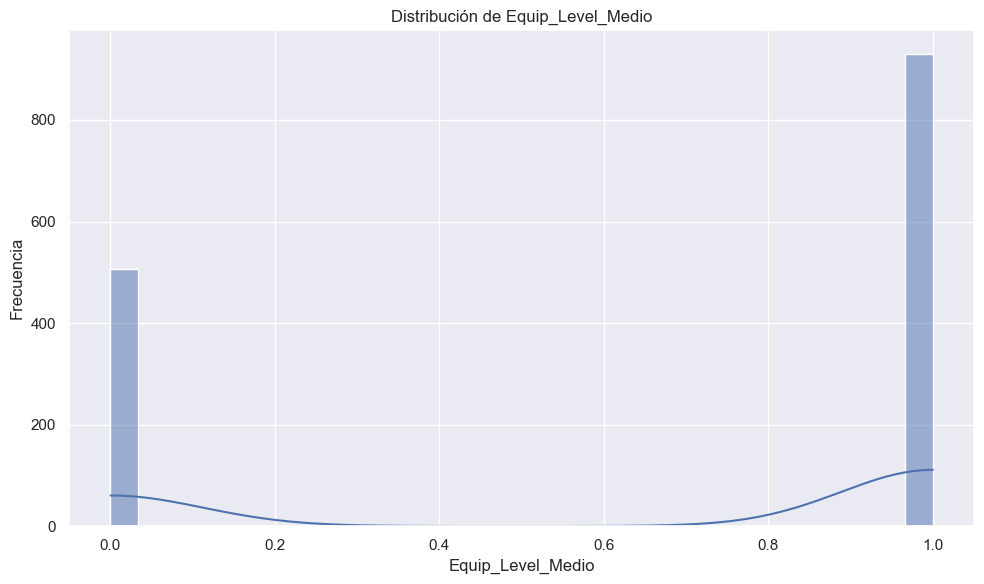

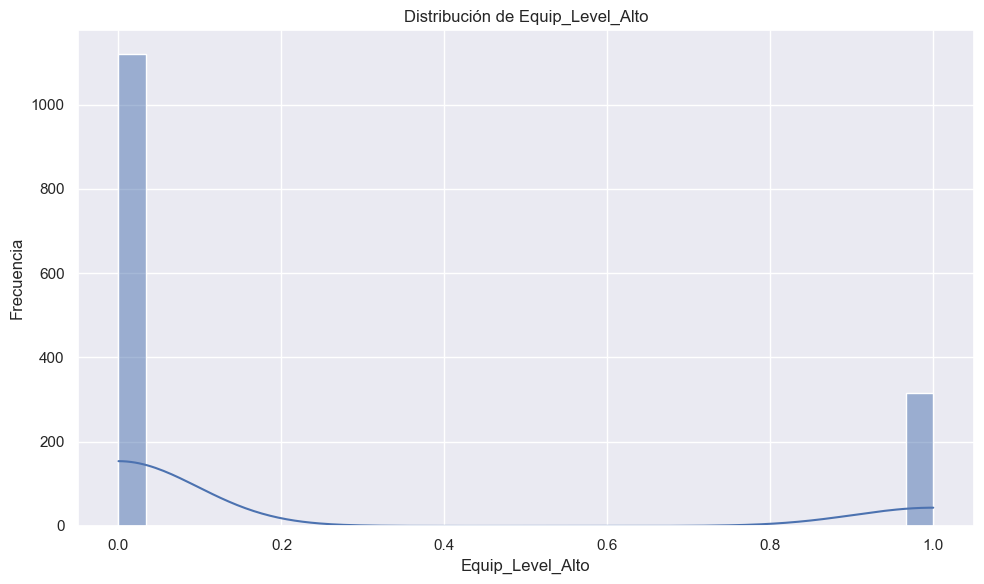

In [1104]:
histogram_feature(df, "Equip_Level_Bajo")
histogram_feature(df, "Equip_Level_Medio")
histogram_feature(df, "Equip_Level_Alto")

Con todo, vemos qué tenemos hasta el momento


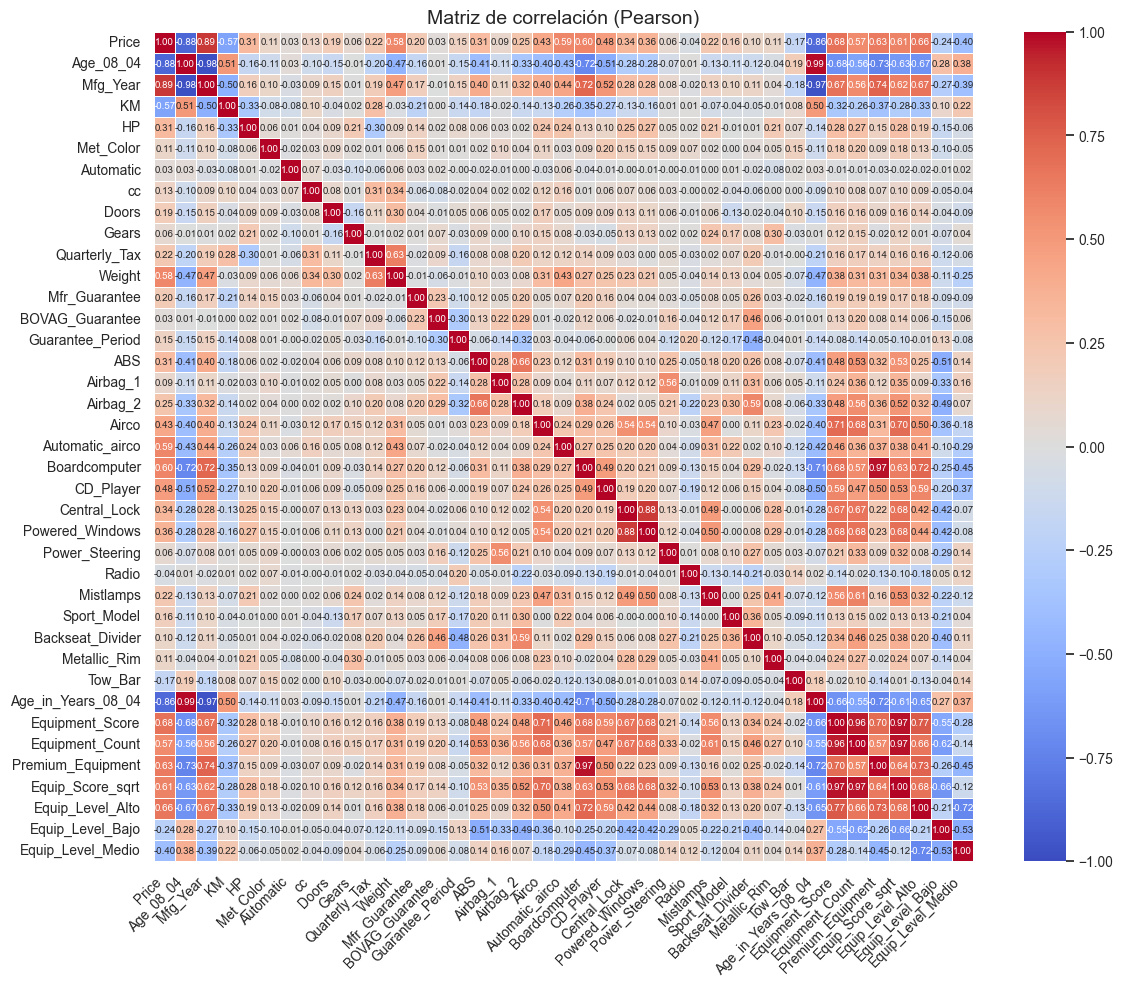

In [1105]:
matrix = show_correlation_matrix(df)

Hay una feature para indicar si tiene un tipo de garantía, otra feature para indicar que tiene del otro tipo de garantía, y otra feature más que indica qué período de garantía.


In [1106]:
mask = (
    (df["BOVAG_Guarantee"] == 0)
    & (df["Mfr_Guarantee"] == 0)
    & (df["Guarantee_Period"] != 0)
)
df.loc[mask, ["BOVAG_Guarantee", "Mfr_Guarantee", "Guarantee_Period"]]

BOVAG_Guarantee  Mfr_Guarantee  Guarantee_Period
17                  0              0                18
18                  0              0                 3
34                  0              0                 3
80                  0              0                 3
86                  0              0                12
...               ...            ...               ...
1367                0              0                 6
1378                0              0                 6
1388                0              0                 6
1401                0              0                 3
1435                0              0                 3

[139 rows x 3 columns]

In [1107]:
df["Has_Guarantee"] = (df["BOVAG_Guarantee"] == 1) | (df["Mfr_Guarantee"] == 1)

In [1108]:
df["Has_Guarantee"].value_counts()

Has_Guarantee
True     1297
False     139
Name: count, dtype: int64

In [1109]:
df["True_Guarantee_Period"] = (
    df["Guarantee_Period"].where(df["Has_Guarantee"], other=0).astype(int)
)

In [1110]:
df["True_Guarantee_Period"].value_counts()

True_Guarantee_Period
3     1196
0      139
12      57
6       39
24       2
13       1
20       1
28       1
Name: count, dtype: int64

Esta exploración de Garantías no nos llevó a ningún lado.


Veamos qué features son las más correlacionadas con el Price hasta el momento.


In [1111]:
top_corr = matrix["Price"].abs().sort_values(ascending=False).iloc[1:16]
print(top_corr)

Mfg_Year              0.885159
Age_08_04             0.876590
Age_in_Years_08_04    0.864162
Equipment_Score       0.675821
Equip_Level_Alto      0.660392
Premium_Equipment     0.634287
Equip_Score_sqrt      0.609351
Boardcomputer         0.601292
Automatic_airco       0.588262
Weight                0.581198
KM                    0.569960
Equipment_Count       0.566614
CD_Player             0.481374
Airco                 0.429259
Equip_Level_Medio     0.399947
Name: Price, dtype: float64


También podemos buscar una relación entre la potencia y el peso del vehículo


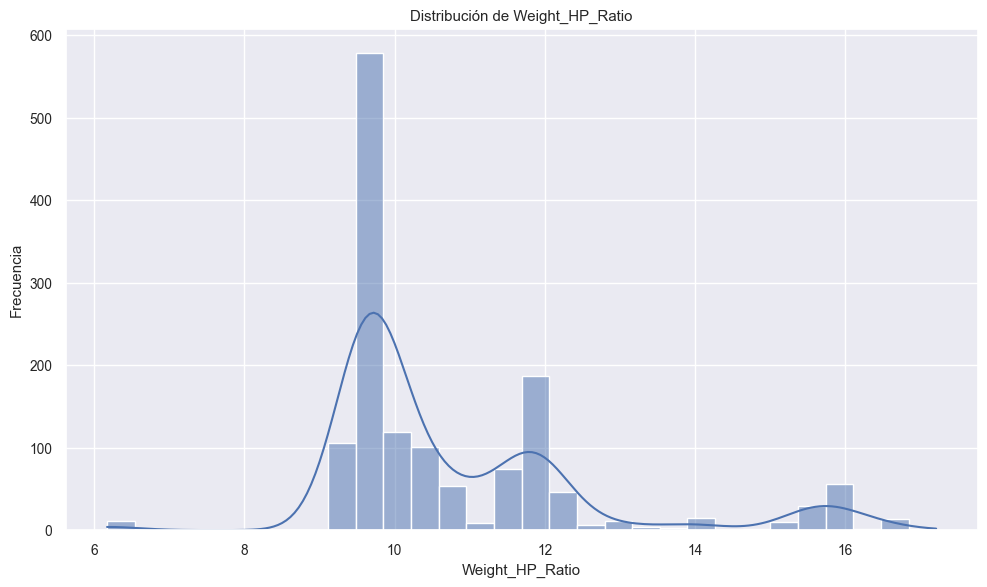

In [1112]:
df["Weight_HP_Ratio"] = df["Weight"] / df["HP"]
histogram_feature(df, "Weight_HP_Ratio")

Qué tenemos hasta el momento


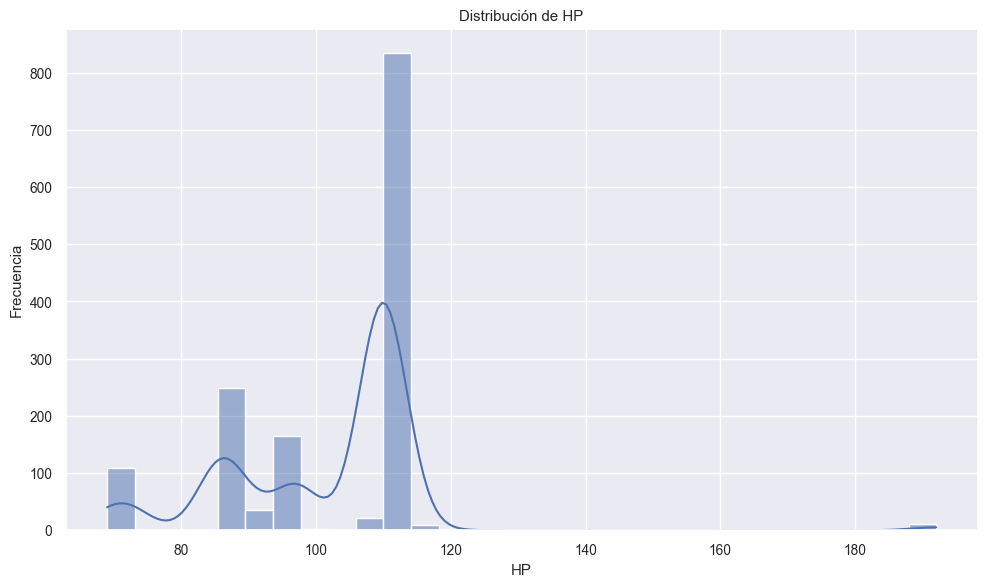

In [1113]:
df["HP"].value_counts()
histogram_feature(df, "HP")

Otra podría ser el nivel de uso, cuántos kilometros tiene para la edad que tiene


Correlación de KM_per_Year con Price: 0.0720
Correlación de KM_per_Month con Price: -0.0234


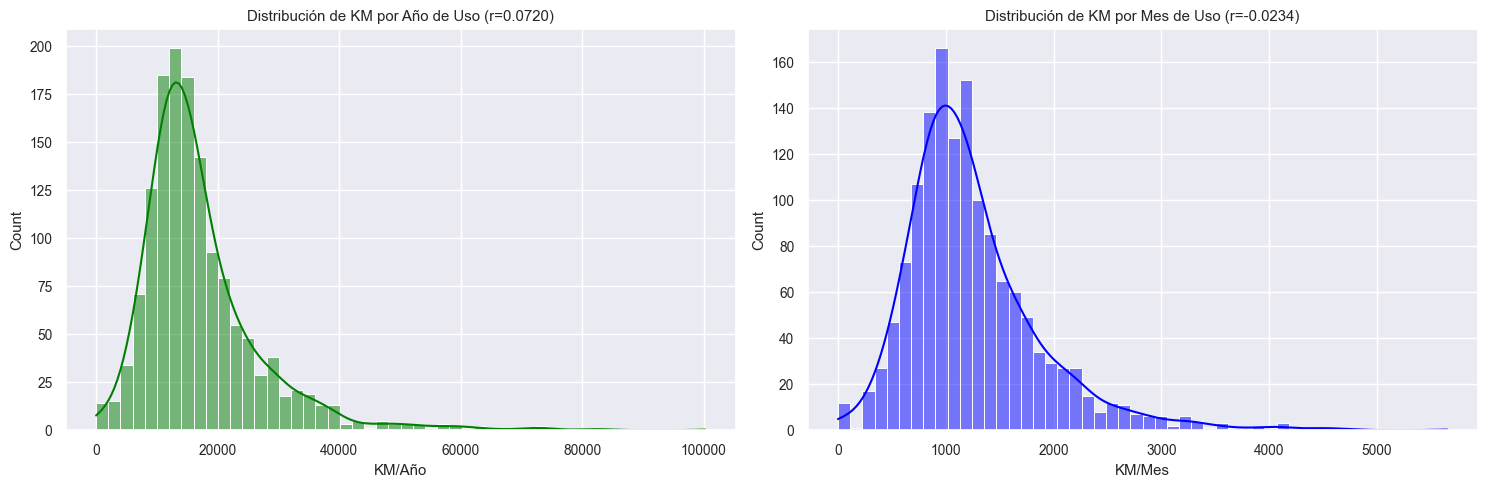

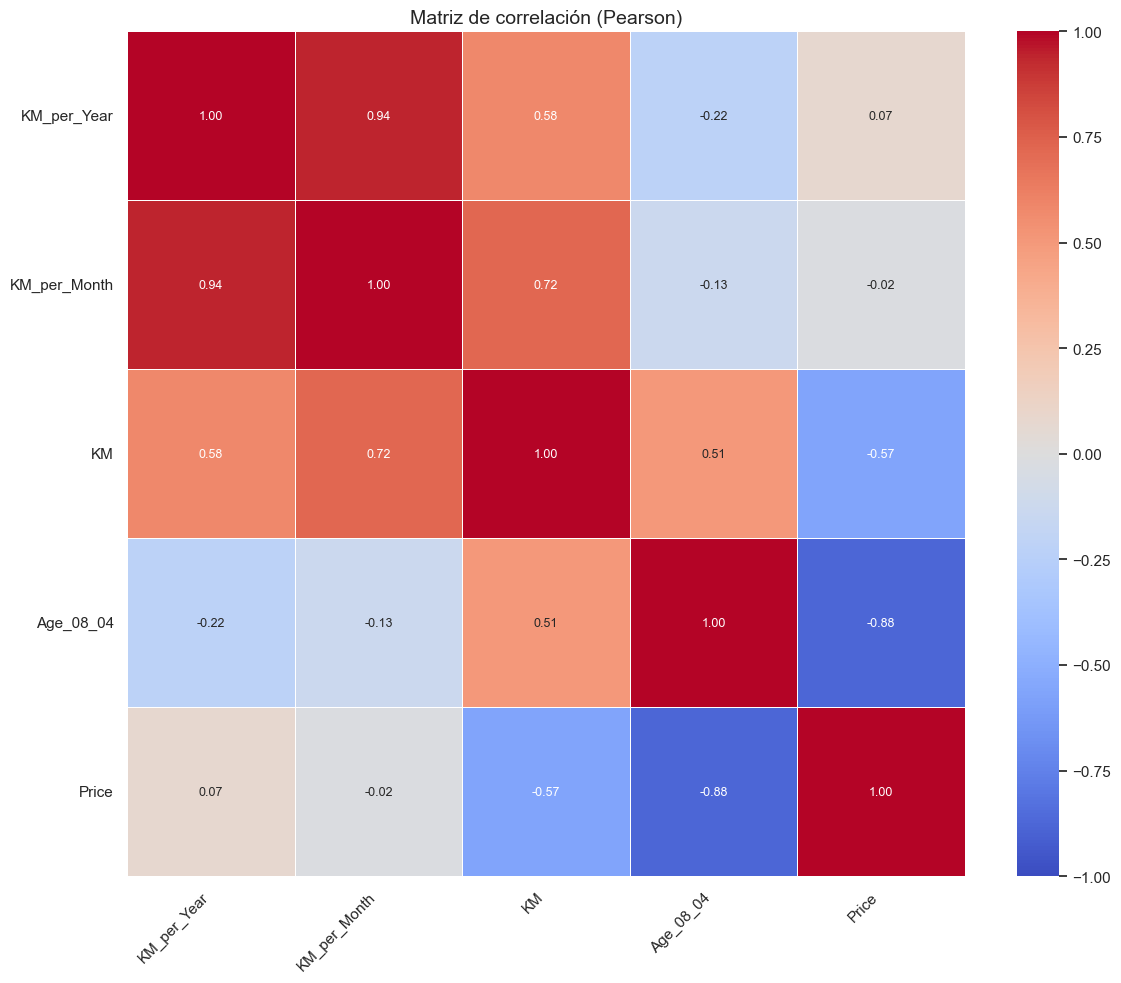

In [1114]:
df["KM_per_Year"] = df["KM"] / df["Age_in_Years_08_04"].replace(0, 1)
df["KM_per_Month"] = df["KM"] / df["Age_08_04"].replace(0, 1)

# Mostrar correlación con Price
correlation_year = df["KM_per_Year"].corr(df["Price"])
correlation_month = df["KM_per_Month"].corr(df["Price"])
print(f"Correlación de KM_per_Year con Price: {correlation_year:.4f}")
print(f"Correlación de KM_per_Month con Price: {correlation_month:.4f}")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df["KM_per_Year"], bins=50, kde=True, ax=axes[0], color="green")
axes[0].set_title(f"Distribución de KM por Año de Uso (r={correlation_year:.4f})")
axes[0].set_xlabel("KM/Año")

sns.histplot(df["KM_per_Month"], bins=50, kde=True, ax=axes[1], color="blue")
axes[1].set_title(f"Distribución de KM por Mes de Uso (r={correlation_month:.4f})")
axes[1].set_xlabel("KM/Mes")

plt.tight_layout()
plt.show()

usage_correlations = show_correlation_matrix(
    df[["KM_per_Year", "KM_per_Month", "KM", "Age_08_04", "Price"]]
)

Casi nada de correlación, no es por aquí.


In [1115]:
len(df.columns)

47

Por el sentido común, y por el scatter plot de abajo, creemos que el kilometraje y el precio no tienen una relación lineal, el precio en kilometrajes bajos es muy sensible, pero en kilometrajes se estabiliza


Tratamos de corregir esto con una raíz cuadrada


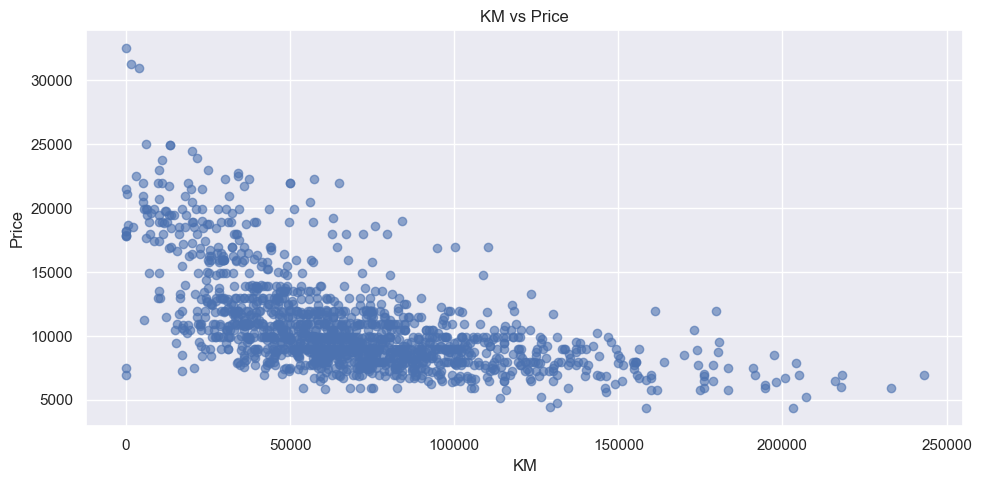

In [1116]:
scatter_feature_vs_target(df, "KM", "Price")

Aplicamos la raíz cuadrada


In [1117]:
df["KM_Sqrt"] = np.sqrt(df["KM"])

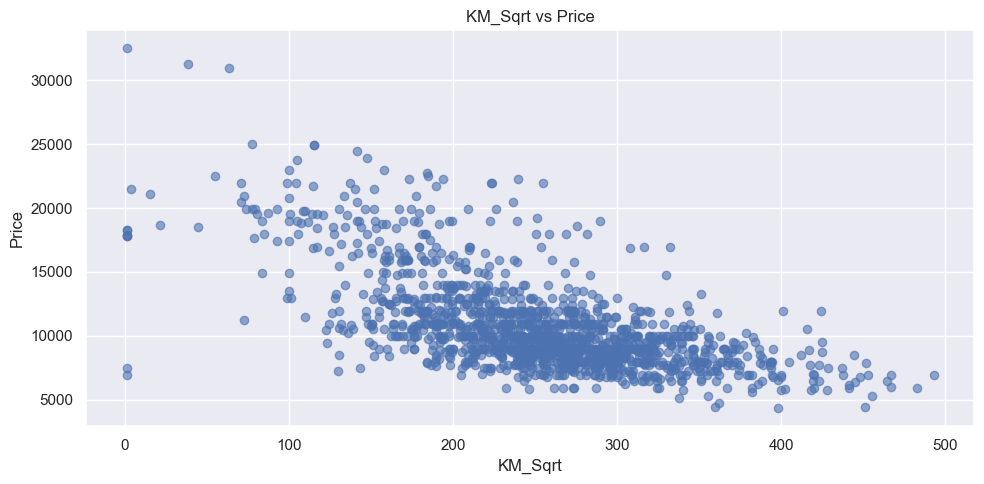

In [1118]:
scatter_feature_vs_target(df, "KM_Sqrt")

Vemos la correlación


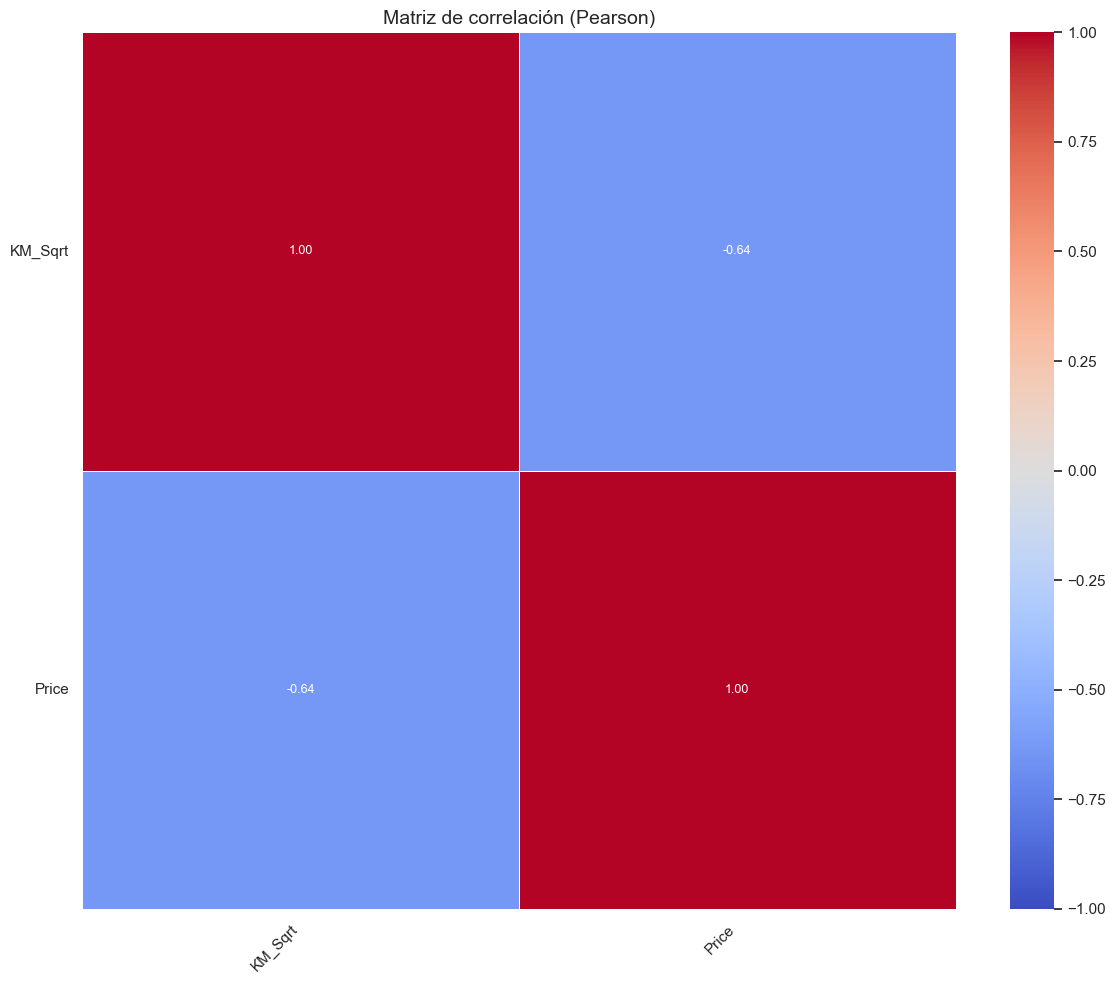

In [1119]:
matrix = show_correlation_matrix(df[["KM_Sqrt", "Price"]])

Veamos la distribución ahora


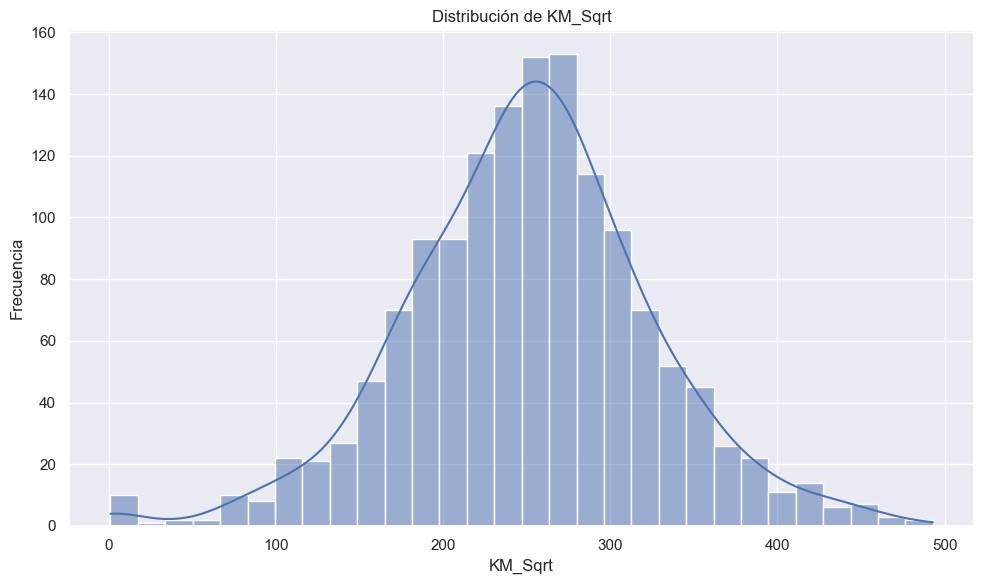

In [1120]:
histogram_feature(df, "KM_Sqrt")

Exploremos un poco weight


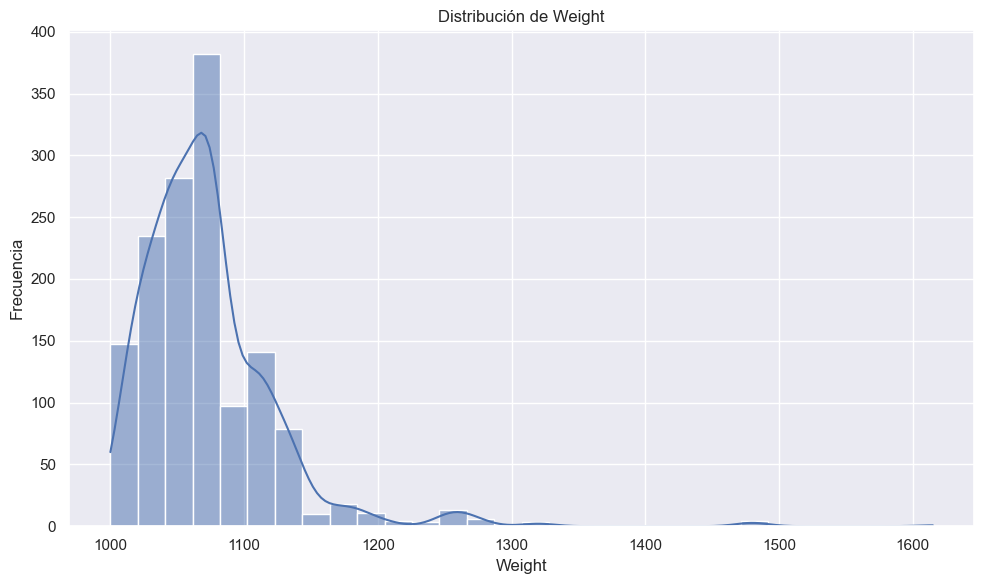

In [1121]:
histogram_feature(df, "Weight")

Le vemos un sesgo pronunciado a la izquierda, por lo que vamos a aplicar una transformación logarítmica para normalizar la distribución.


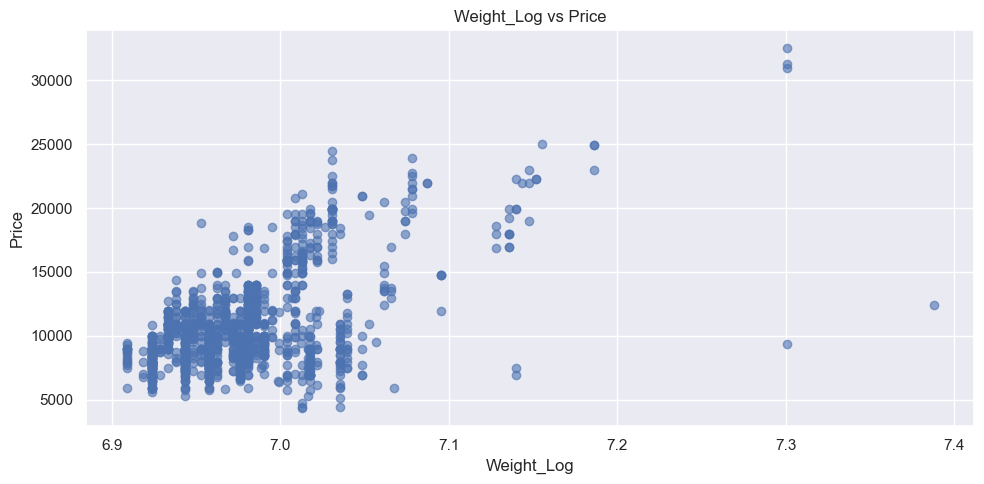

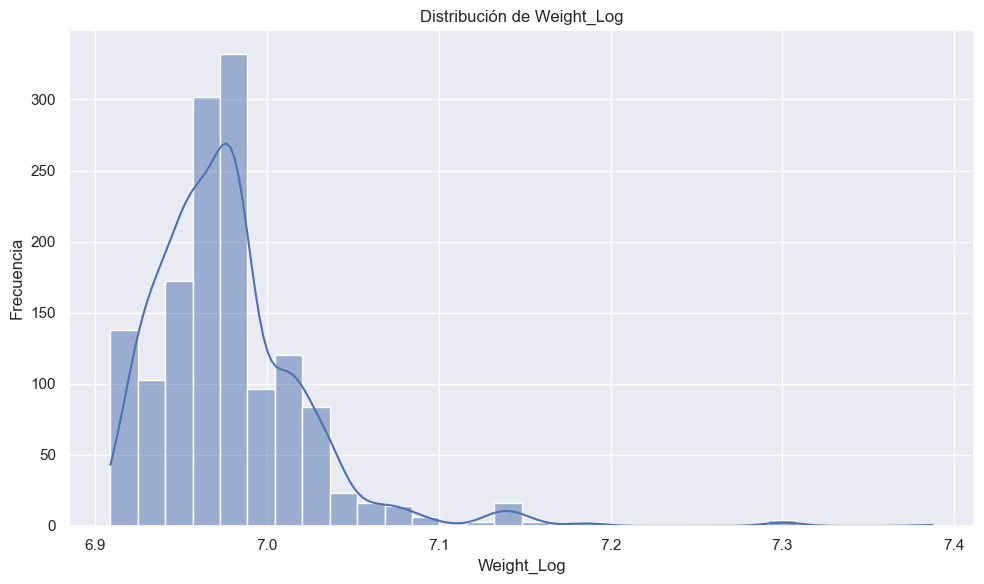

In [1122]:
df["Weight_Log"] = np.log1p(df["Weight"])
scatter_feature_vs_target(df, "Weight_Log")
histogram_feature(df, "Weight_Log")

Veamos cómo está distribuido Age


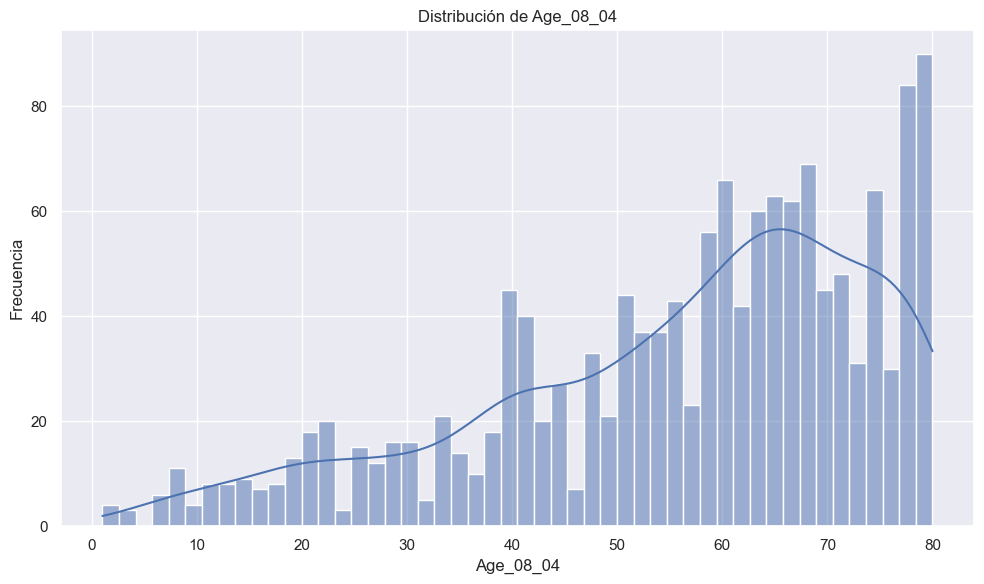

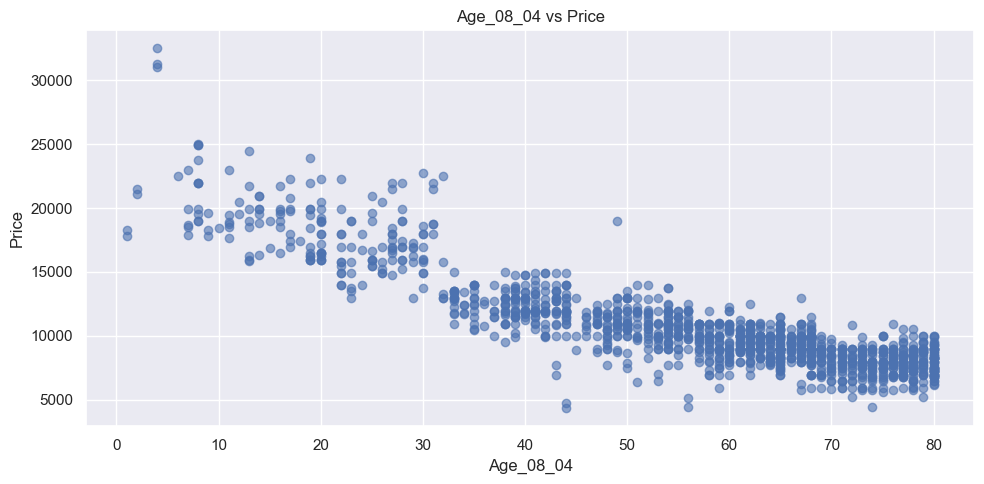

In [1123]:
histogram_feature(df, "Age_08_04", bins=50)
scatter_feature_vs_target(df, "Age_08_04")

Parecido a lo que pasa con kilómetro, es más susceptible al principio, veamos si podemos corregirlo


In [1124]:
df["Age_Sqrt"] = np.sqrt(df["Age_08_04"])

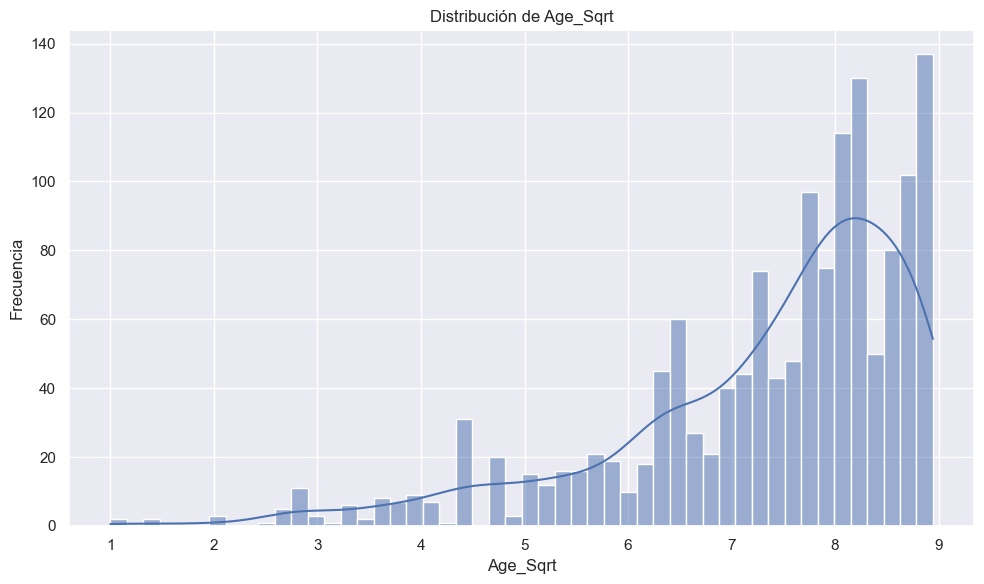

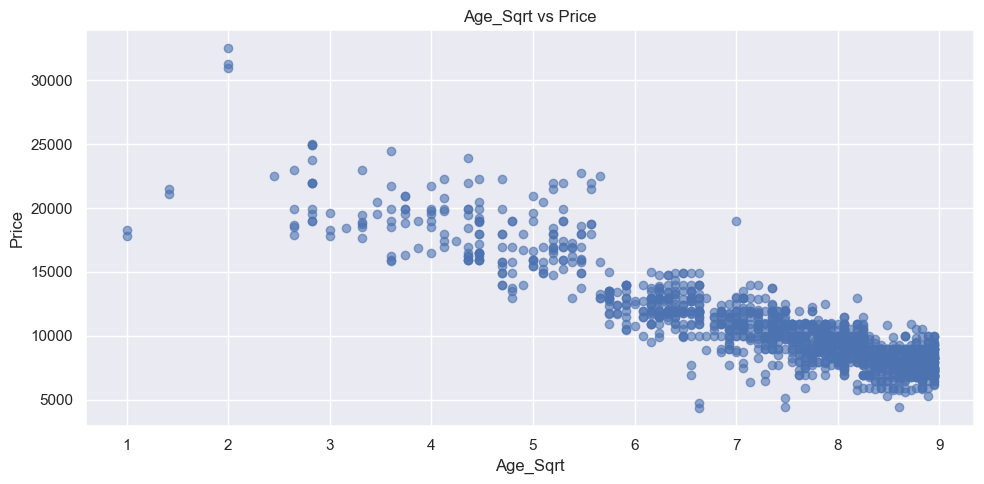

In [1125]:
histogram_feature(df, "Age_Sqrt", bins=50)
scatter_feature_vs_target(df, "Age_Sqrt")

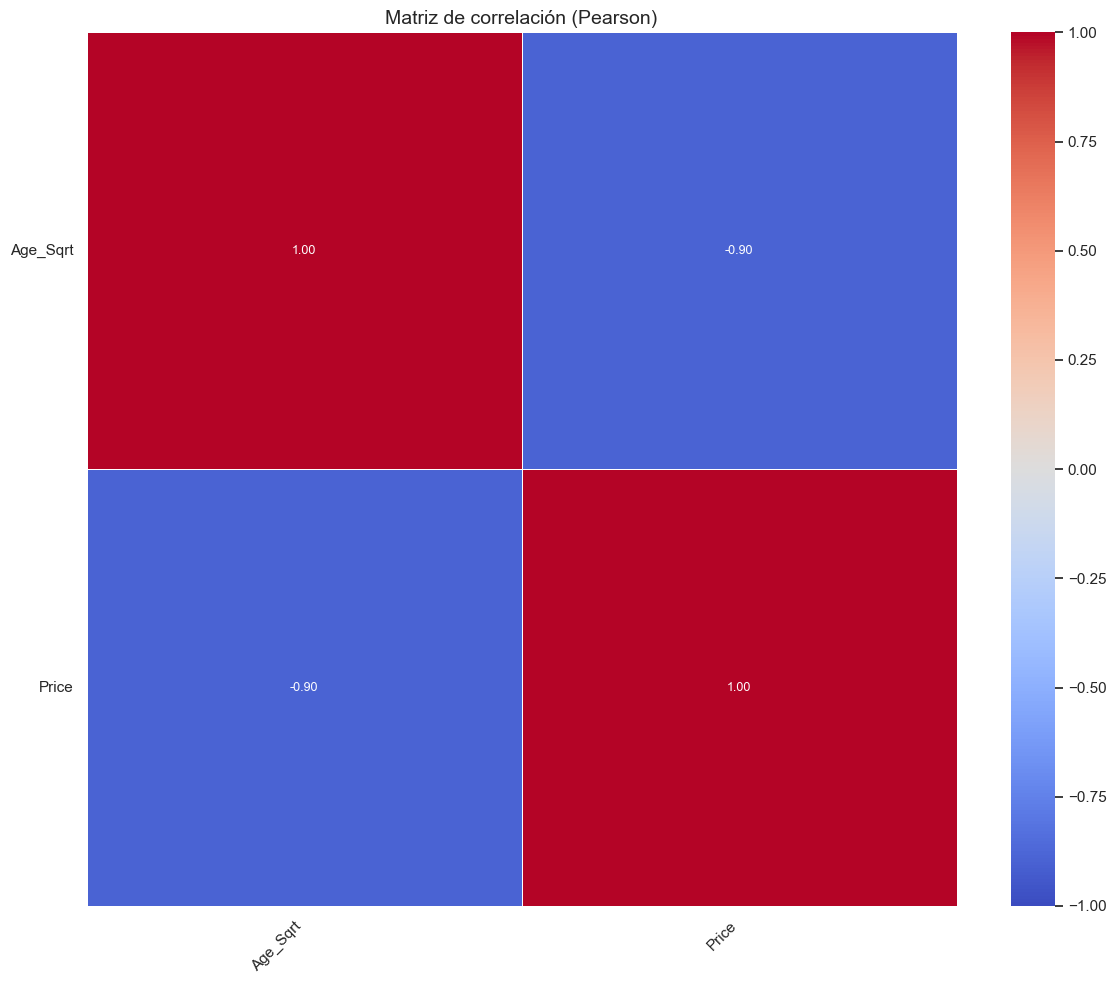

In [1126]:
matrix = show_correlation_matrix(df[["Age_Sqrt", "Price"]])

También nos quedó pendiente la feature fuel type, vamos a hacerle un one hot encoding porque es categórica


In [1127]:
fuel_dummies = pd.get_dummies(
    df["Fuel_Type"], prefix="Fuel", dtype=int, drop_first=True
)
df = pd.concat([df, fuel_dummies], axis=1)

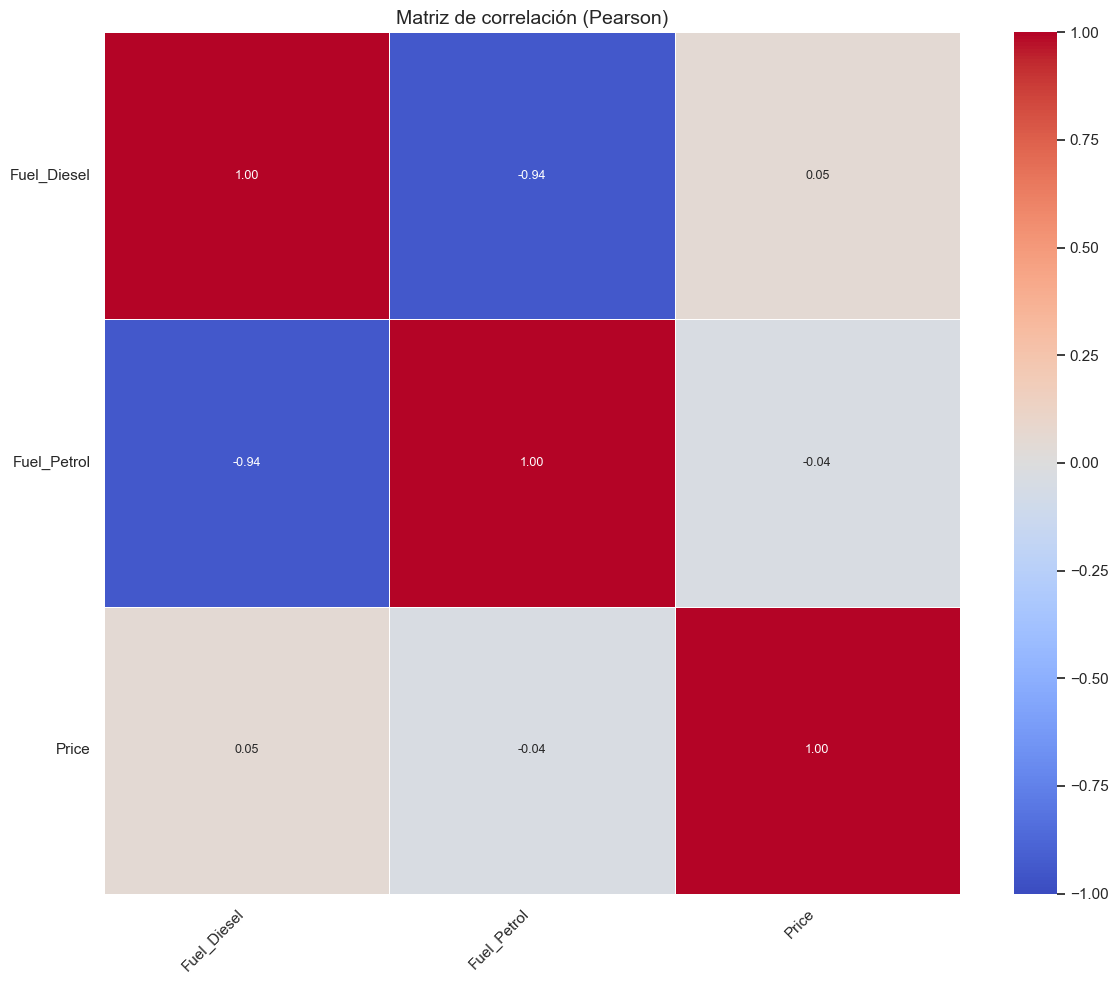

In [1128]:
matrix = show_correlation_matrix(df[["Fuel_Diesel", "Fuel_Petrol", "Price"]])

## Limpieza


Ahora mismo nuestro dataset se ve así


In [1129]:
df.describe().T

count          mean           std          min  \
Price                  1436.0  10730.824513   3626.964585  4350.000000   
Age_08_04              1436.0     55.947075     18.599988     1.000000   
Mfg_Year               1436.0   1999.625348      1.540722  1998.000000   
KM                     1436.0  68533.259749  37506.448872     1.000000   
HP                     1436.0    101.502089     14.981080    69.000000   
Met_Color              1436.0      0.674791      0.468616     0.000000   
Automatic              1436.0      0.055710      0.229441     0.000000   
cc                     1436.0   1576.855850    424.386770  1300.000000   
Doors                  1436.0      4.033426      0.952677     2.000000   
Gears                  1436.0      5.026462      0.188510     3.000000   
Quarterly_Tax          1436.0     87.122563     41.128611    19.000000   
Weight                 1436.0   1072.459610     52.641120  1000.000000   
Mfr_Guarantee          1436.0      0.409471      0.491907     0.000000   
BOVAG_Guarantee        1436.0      0.895543      0.305959     0.000000   
Guarantee_Period       1436.0      3.815460      3.011025     3.000000   
ABS                    1436.0      0.813370      0.389750     0.000000   
Airbag_1               1436.0      0.970752      0.168559     0.000000   
Airbag_2               1436.0      0.722841      0.447751     0.000000   
Airco                  1436.0      0.508357      0.500104     0.000000   
Automatic_airco        1436.0      0.056407      0.230786     0.000000   
Boardcomputer          1436.0      0.294568      0.456007     0.000000   
CD_Player              1436.0      0.218663      0.413483     0.000000   
Central_Lock           1436.0      0.580084      0.493717     0.000000   
Powered_Windows        1436.0      0.561978      0.496317     0.000000   
Power_Steering         1436.0      0.977716      0.147657     0.000000   
Radio                  1436.0      0.146240      0.353469     0.000000   
Mistlamps              1436.0      0.256964      0.437111     0.000000   
Sport_Model            1436.0      0.300139      0.458478     0.000000   
Backseat_Divider       1436.0      0.770195      0.420854     0.000000   
Metallic_Rim           1436.0      0.204735      0.403649     0.000000   
Tow_Bar                1436.0      0.277855      0.448098     0.000000   
Age_in_Years_08_04     1436.0      4.206825      1.572316     0.000000   
Equipment_Score        1436.0      0.421051      0.230949     0.000000   
Equipment_Count        1436.0      7.155989      2.602205     0.000000   
Premium_Equipment      1436.0      0.305710      0.460868     0.000000   
Equip_Score_sqrt       1436.0      0.618917      0.194985     0.000000   
Equip_Level_Alto       1436.0      0.220056      0.414428     0.000000   
Equip_Level_Bajo       1436.0      0.132312      0.338948     0.000000   
Equip_Level_Medio      1436.0      0.647632      0.477874     0.000000   
True_Guarantee_Period  1436.0      3.213788      2.368399     0.000000   
Weight_HP_Ratio        1436.0     10.801589      1.804203     6.171875   
KM_per_Year            1436.0  17178.564450  10099.700003     0.166667   
KM_per_Month           1436.0   1251.555950    636.670309     0.013158   
KM_Sqrt                1436.0    251.216212     73.671256     1.000000   
Weight_Log             1436.0      6.977537      0.046107     6.908755   
Age_Sqrt               1436.0      7.337941      1.450228     1.000000   
Fuel_Diesel            1436.0      0.107939      0.310411     0.000000   
Fuel_Petrol            1436.0      0.880223      0.324814     0.000000   

                                25%           50%           75%            max  
Price                   8450.000000   9900.000000  11950.000000   32500.000000  
Age_08_04                 44.000000     61.000000     70.000000      80.000000  
Mfg_Year                1998.000000   1999.000000   2001.000000    2004.000000  
KM                     43000.000000  63389.500000  87020.750000  243000.0

In [1130]:
df.dtypes.iloc[15:]

BOVAG_Guarantee            int64
Guarantee_Period           int64
ABS                        int64
Airbag_1                   int64
Airbag_2                   int64
Airco                      int64
Automatic_airco            int64
Boardcomputer              int64
CD_Player                  int64
Central_Lock               int64
Powered_Windows            int64
Power_Steering             int64
Radio                      int64
Mistlamps                  int64
Sport_Model                int64
Backseat_Divider           int64
Metallic_Rim               int64
Tow_Bar                    int64
Age_in_Years_08_04         int64
Equipment_Score          float64
Equipment_Count            int64
Premium_Equipment          int64
Equip_Score_sqrt         float64
Equipment_Level           object
Equip_Level_Alto           int64
Equip_Level_Bajo           int64
Equip_Level_Medio          int64
Has_Guarantee               bool
True_Guarantee_Period      int64
Weight_HP_Ratio          float64
KM_per_Yea

Del trabajo anterior en el que tratamos de crear nuevas features y mejorarlas, vamos a ver cuáles son las mejores candidatas a limpiar


Tomamos las variables más correlacionadas con Price


In [1131]:
correlations = df.corr(numeric_only=True)["Price"].abs().sort_values(ascending=False)

top_corr_vars = correlations.drop("Price").head(15)
print(top_corr_vars)

Age_Sqrt              0.896133
Mfg_Year              0.885159
Age_08_04             0.876590
Age_in_Years_08_04    0.864162
Equipment_Score       0.675821
Equip_Level_Alto      0.660392
KM_Sqrt               0.636877
Premium_Equipment     0.634287
Equip_Score_sqrt      0.609351
Boardcomputer         0.601292
Automatic_airco       0.588262
Weight_Log            0.585330
Weight                0.581198
KM                    0.569960
Equipment_Count       0.566614
Name: Price, dtype: float64


Muchas de las variables más correlacionadas de este top son variaciones de la misma información, nos quedamos con una de cada tipo, eligiendo por su distribución en general, y por su correlación


Age_Sqrt, Mfg_Year, Age_08_04, Age_in_Years_08_04 son todas variaciones de la edad del vehículo. Nos quedamos con Age_Sqrt que es la mejor por el análisis que le hicimos, de todas formas aquí van sus gráficos de nuevo


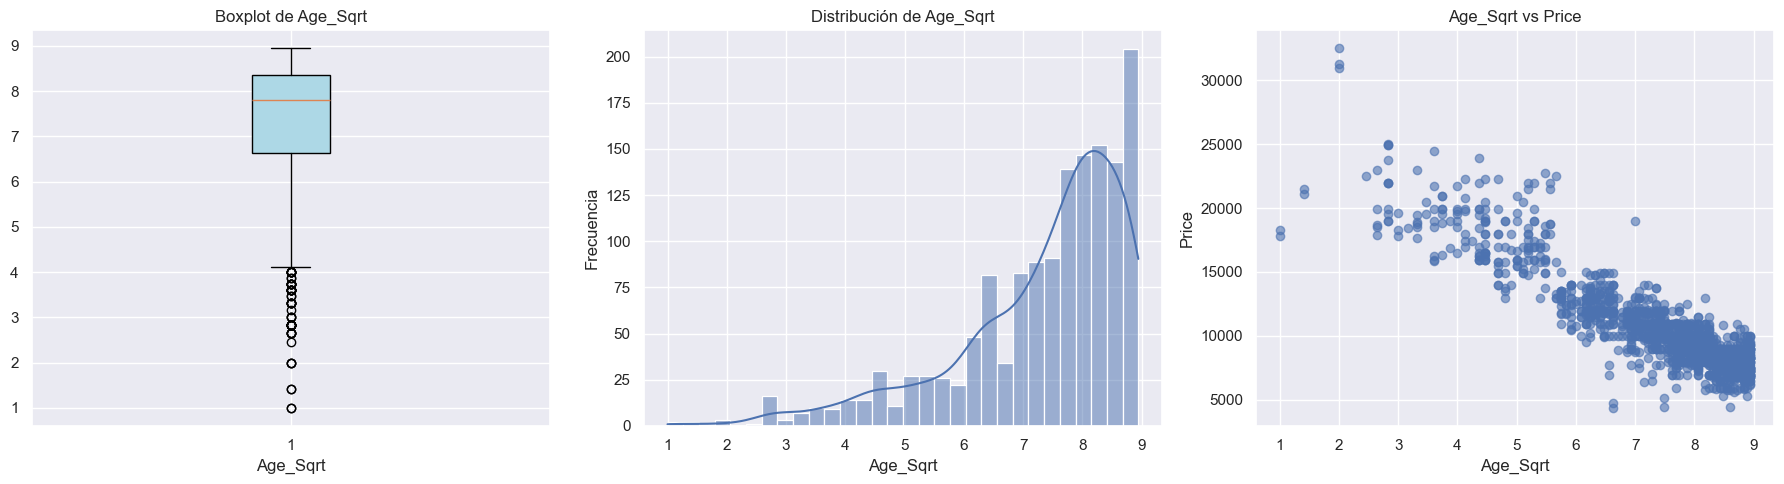

In [1132]:
from utils import plot_feature_analysis

plot_feature_analysis(df, "Age_Sqrt")

Para el equipment tenemos el equipment alto, el equipment premium, el equipment count. De todos, el que más utilidad nos puede dar es Equipment_Score, por su correlación, y su distribución más similar a una normal.


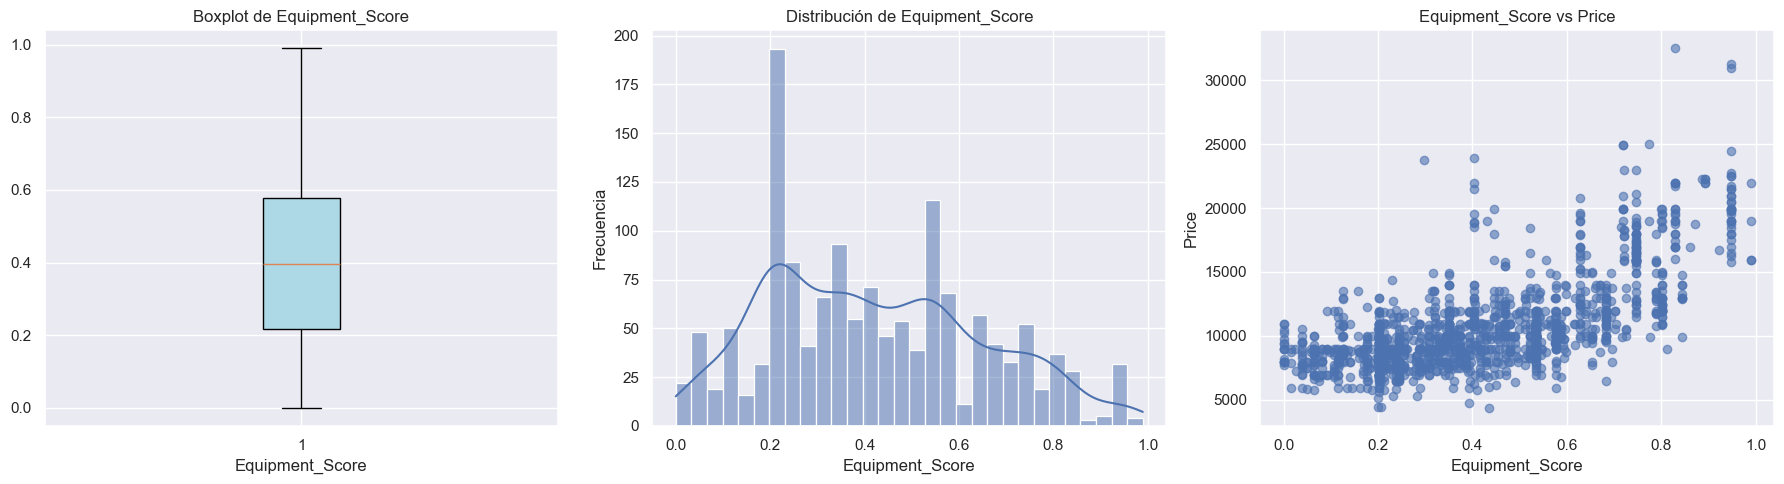

In [1133]:
plot_feature_analysis(df, "Equipment_Score")

Para el kilometraje nos quedamos con su variante de raíz cuadrada, que explica mejor el comportamiento del precio y que tiene una distribución muy próxima a una normal


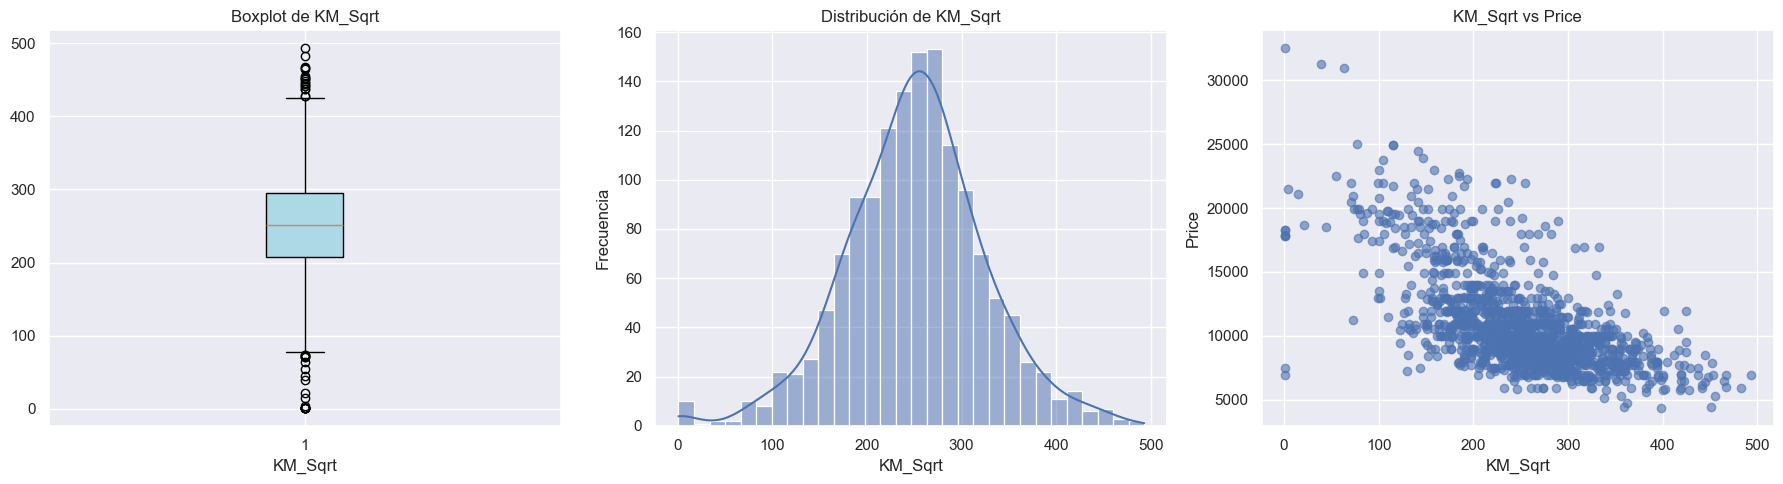

In [1134]:
plot_feature_analysis(df, "KM_Sqrt")

Para el peso nos quedamos con su versión transformada con logaritmo, porque aunque tengan correlación muy similar, la transformada tiene una mejor distribución


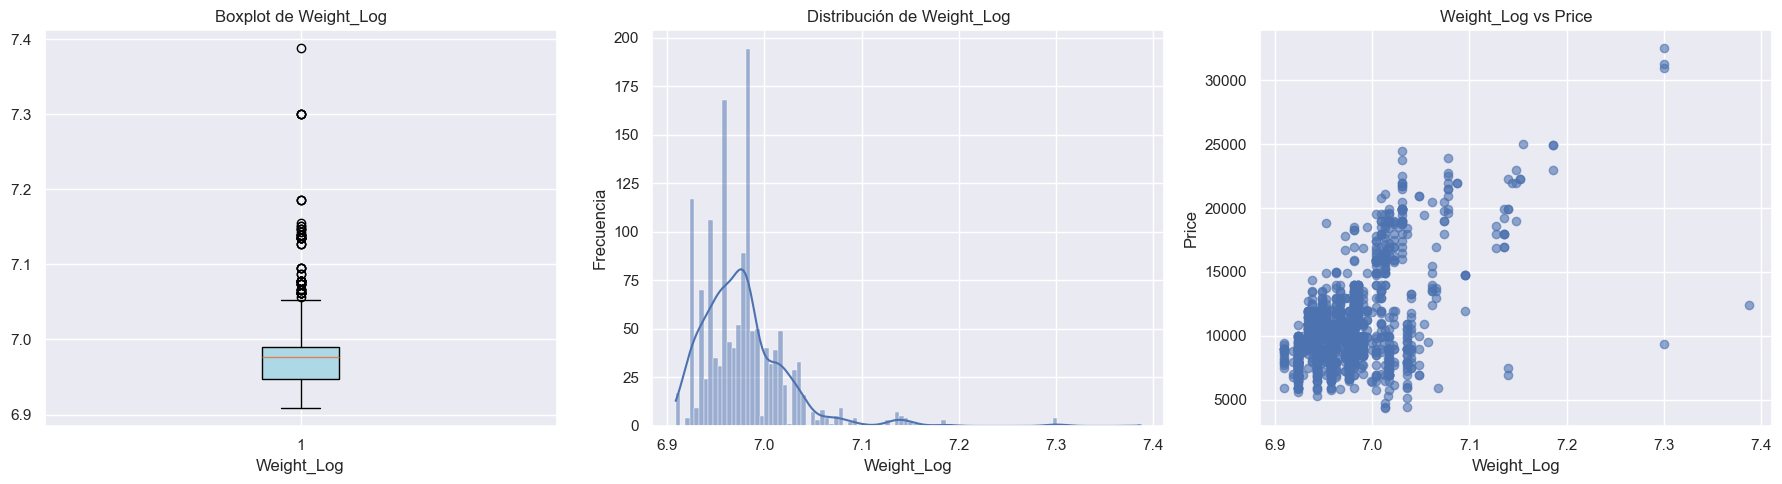

In [1135]:
plot_feature_analysis(df, "Weight_Log", bins=100)

Vamos sacando todo lo que ya no nos sirve


In [1136]:
df.drop(
    columns=[
        "Age_08_04",
        "KM",
        "Equipment_Count",
        "Premium_Equipment",
        "Mfg_Year",
        "Age_in_Years_08_04",
        "Boardcomputer",
        "Automatic_airco",
        "Weight",
        "Equip_Level_Alto",
        "CD_Player",
        "Airco",
        "Central_Lock",
        "Powered_Windows",
        "Power_Steering",
        "Radio",
        "Mistlamps",
        "Equip_Level_Medio",
        "Equip_Level_Bajo",
        "Tow_Bar",
        "Airbag_1",
        "Airbag_2",
        "ABS",
        "Backseat_Divider",
        "Weight_HP_Ratio",
        "Fuel_Petrol",
        "Fuel_Diesel",
        "Equip_Score_sqrt",
        "KM_per_Month",
        "KM_per_Year",
        "True_Guarantee_Period",
        "Model",
        "Fuel_Type",
    ],
    inplace=True,
)
correlations = df.corr(numeric_only=True)["Price"].abs().sort_values(ascending=False)

top_corr_vars = correlations.drop("Price").head(15)
print(top_corr_vars)

Age_Sqrt            0.896133
Equipment_Score     0.675821
KM_Sqrt             0.636877
Weight_Log          0.585330
HP                  0.314990
Quarterly_Tax       0.219197
Mfr_Guarantee       0.197802
Doors               0.185326
Sport_Model         0.164121
Guarantee_Period    0.146627
cc                  0.126389
Met_Color           0.108905
Metallic_Rim        0.108564
Gears               0.063104
Automatic           0.033081
Name: Price, dtype: float64


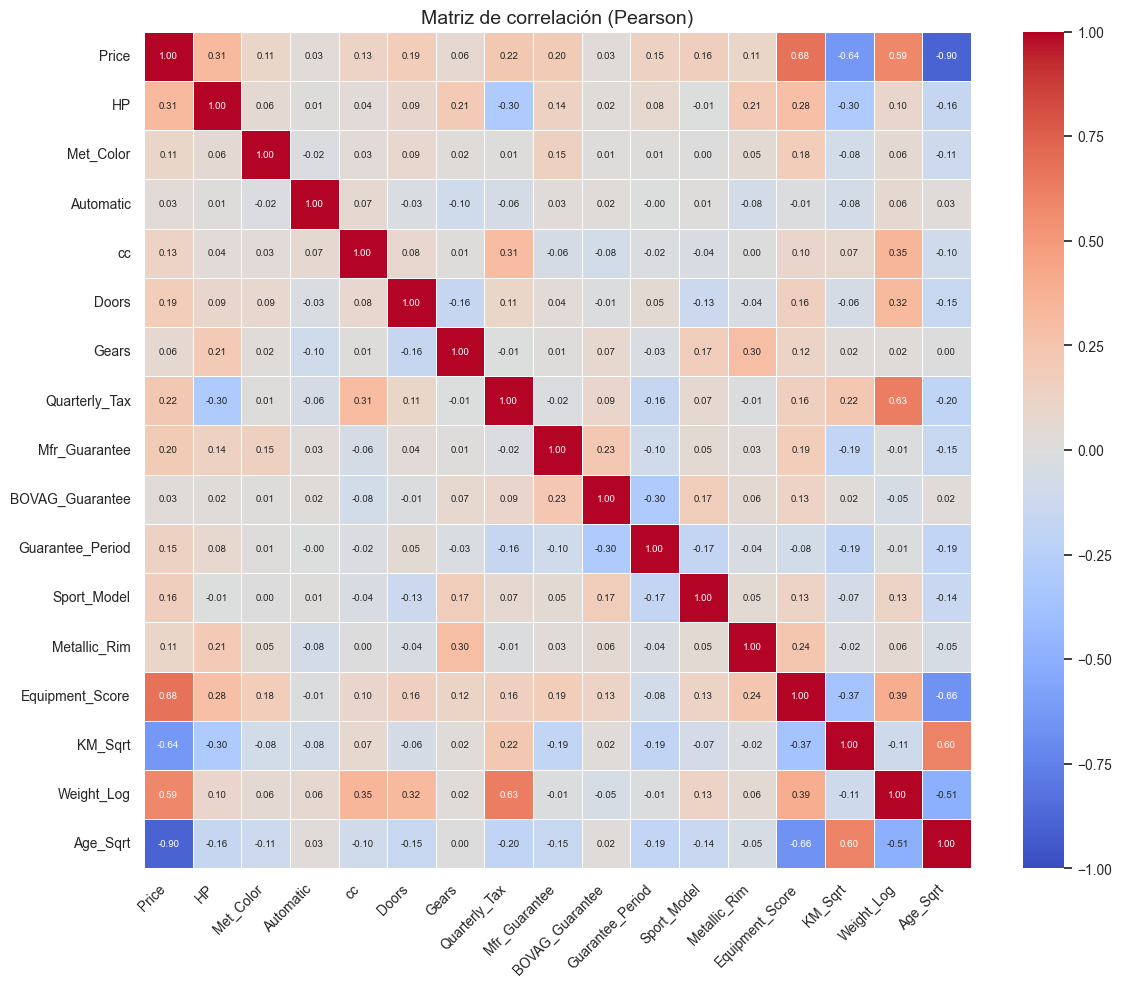

In [1137]:
matrix = show_correlation_matrix(df)

Vamos a tratar de limpiar lo más que podamos estas variables en orden de importancia


### Price


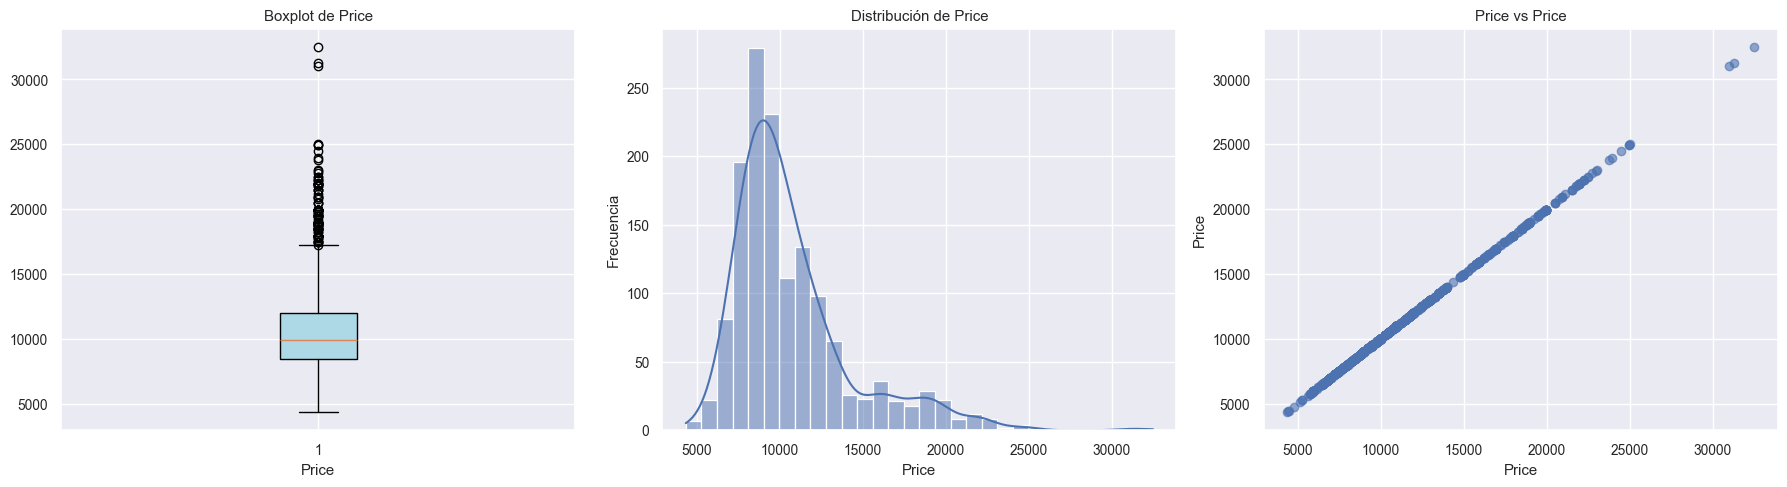

In [1138]:
plot_feature_analysis(df, "Price")

Price presenta varios outliers, algunos pocos vehiculos con precios muy elevados. Más allá de eso, la distribución de price parece rescatable, vamos a empezar por limpiar outliers usando IQR


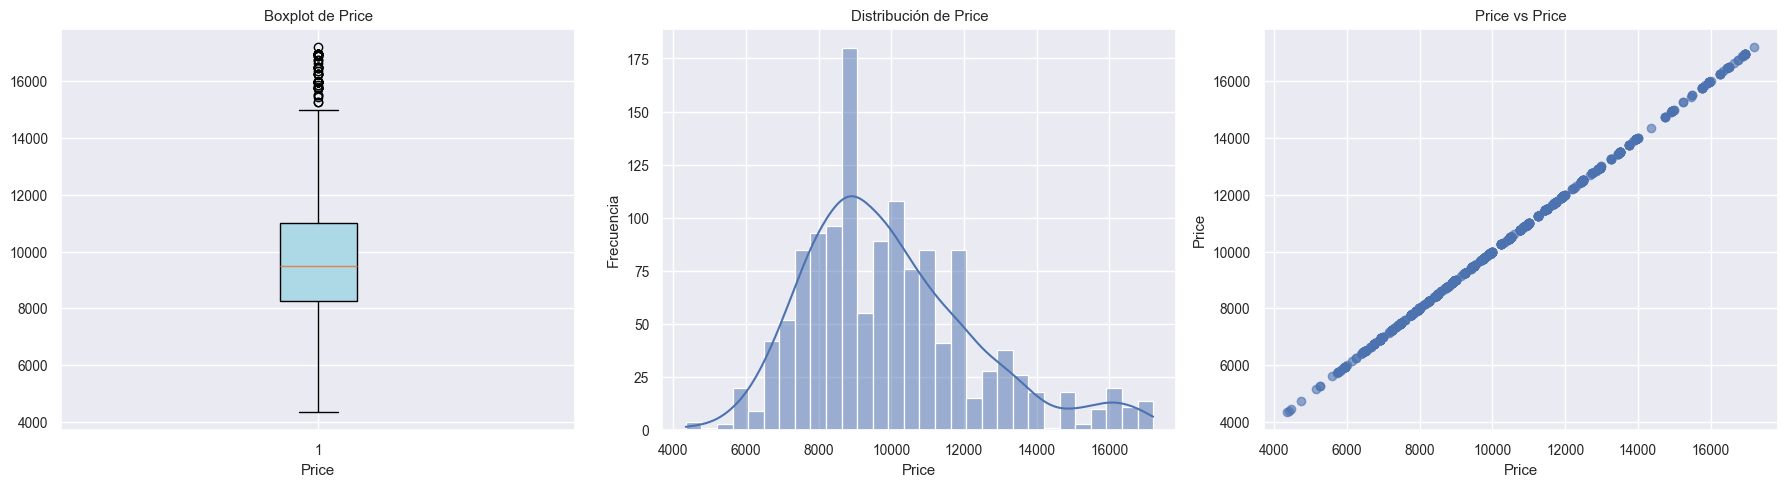

In [1139]:
from utils import clean_outliers_iqr


df = df[clean_outliers_iqr(df["Price"])[1]]
plot_feature_analysis(df, "Price")

hemos probado con zscore y la distribución resultante no es adecuada, vamos a probar borrando directamente los precios por encima de cierto valor


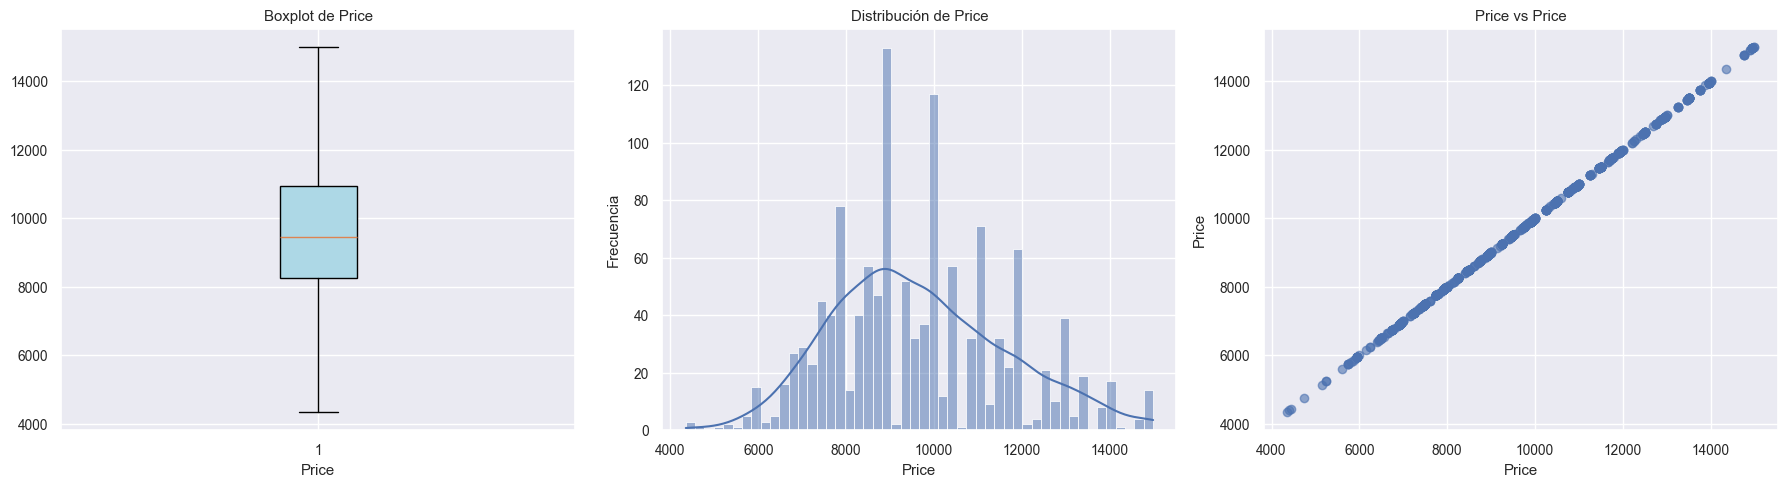

In [1140]:
df = df[df["Price"] <= 15000]
plot_feature_analysis(df, "Price", bins=50)

### Age_Sqrt


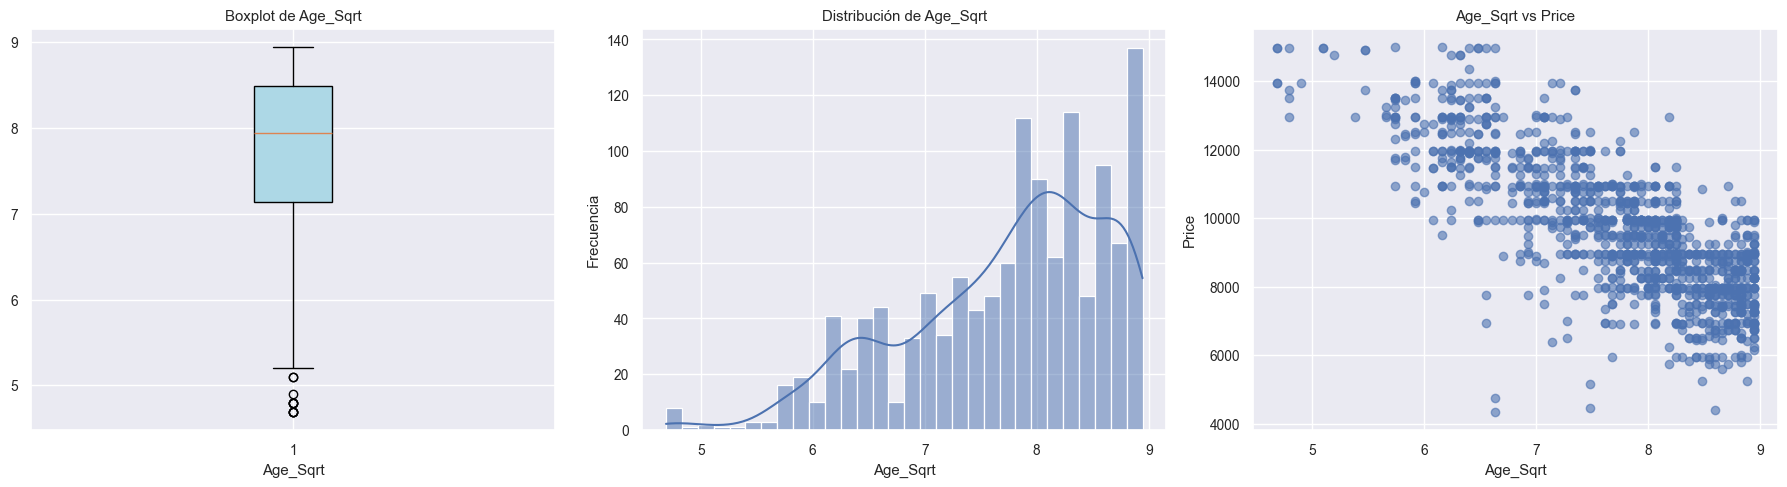

In [1141]:
plot_feature_analysis(df, "Age_Sqrt")

Age_Sqrt presenta varios outliers, empecemos limpiandolo para ver cómo queda la distribución


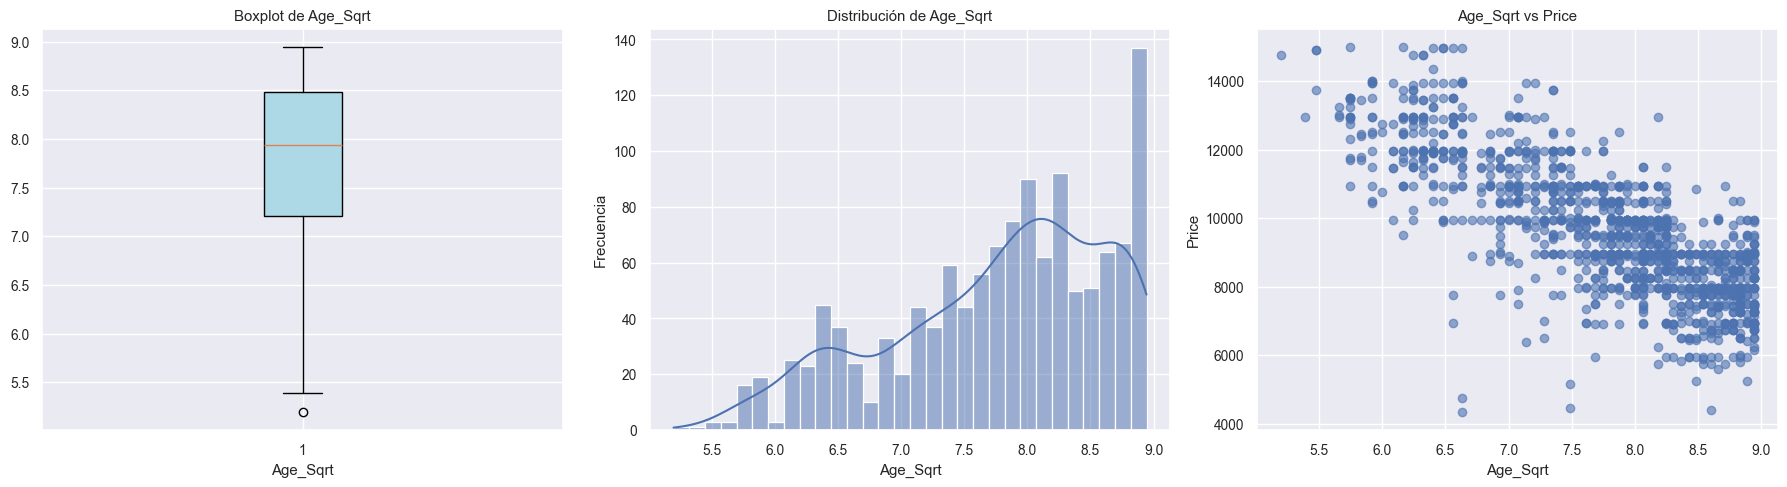

In [1142]:
df = df[clean_outliers_iqr(df["Age_Sqrt"])[1]]
plot_feature_analysis(df, "Age_Sqrt")

Aplicamos zscore


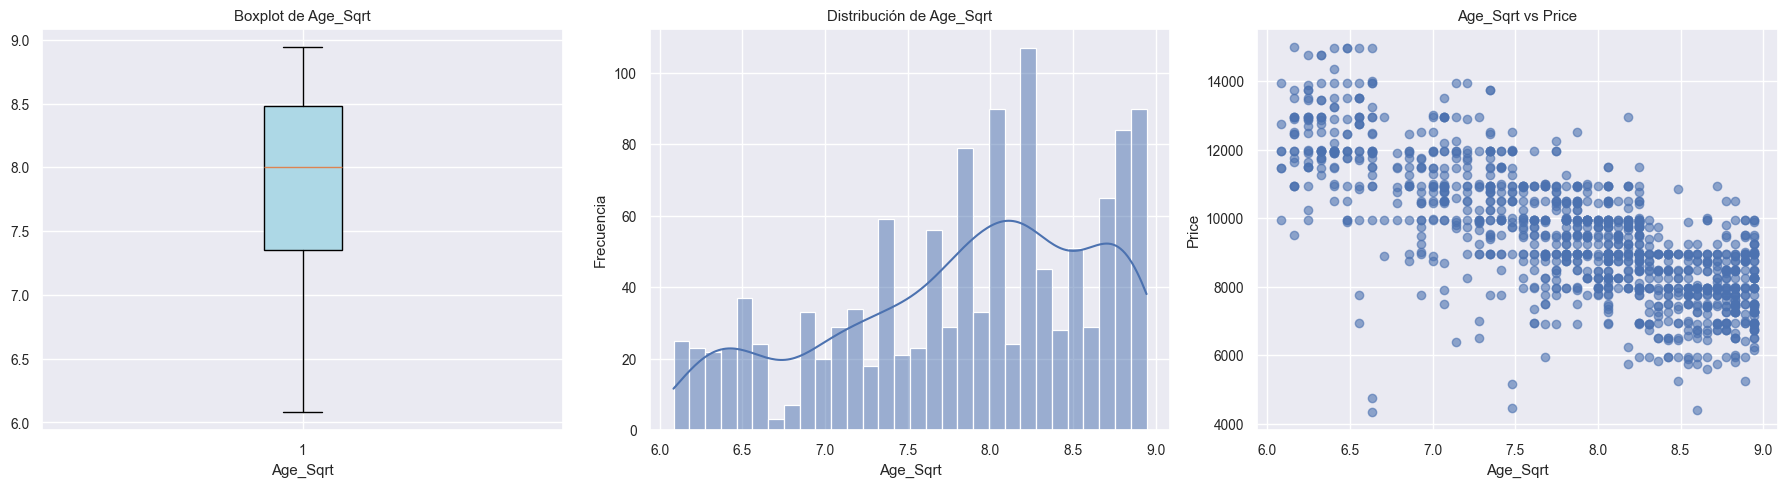

In [1143]:
from utils import clean_outliers_zscore


df = df[clean_outliers_zscore(df["Age_Sqrt"])[1]]
plot_feature_analysis(df, "Age_Sqrt")

## Equipment_Score


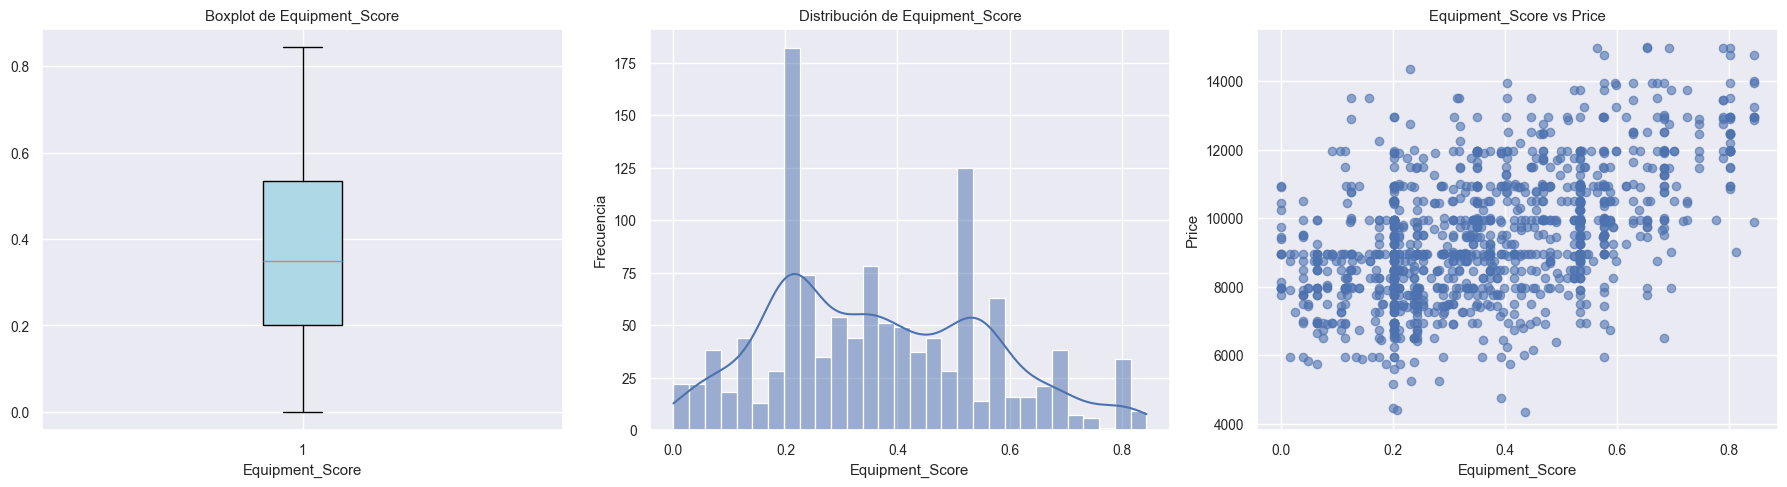

In [1144]:
plot_feature_analysis(df, "Equipment_Score")

Equipment_Score no presenta outliers, lo dejamos como está porque un zscore no dió resultados satisfactorios


### KM_Sqrt


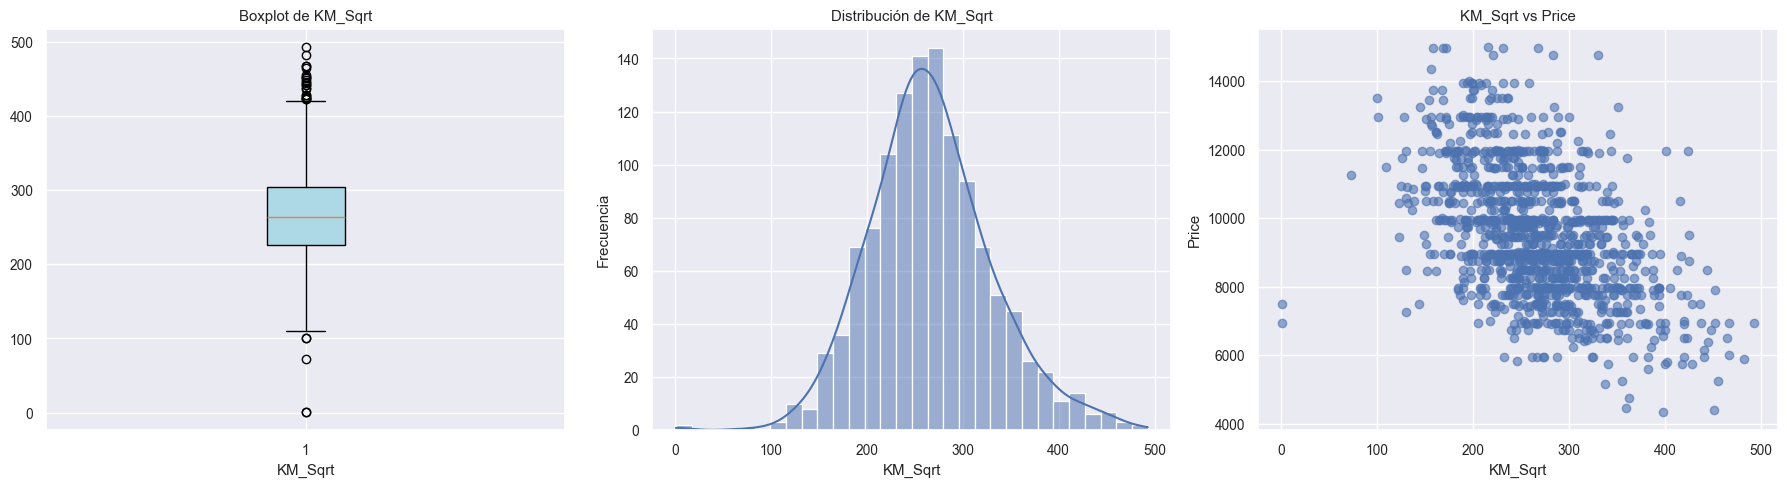

In [1145]:
plot_feature_analysis(df, "KM_Sqrt")

KM_sqrt está muy bien en primera instancia, vamos a aplicar un zscore ya que la distribución es casi normal


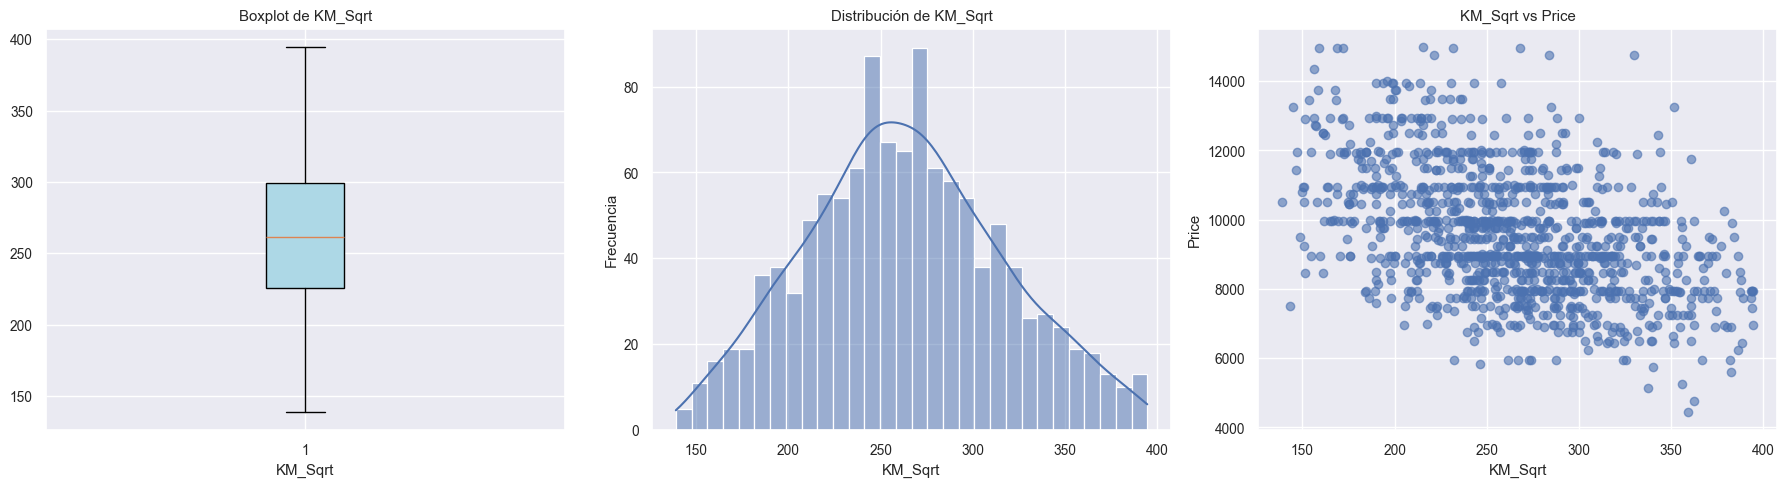

In [1146]:
df = df[clean_outliers_zscore(df["KM_Sqrt"])[1]]
plot_feature_analysis(df, "KM_Sqrt")

No más tratamiento


### Weight_Log


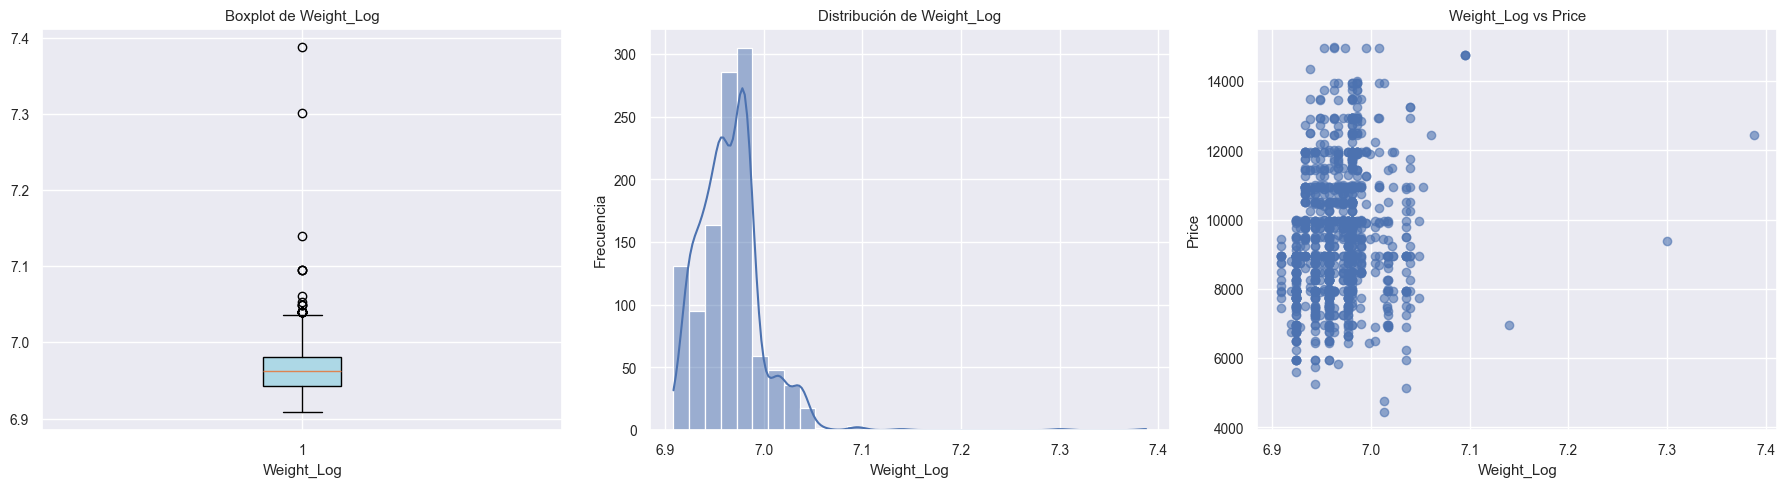

In [1147]:
plot_feature_analysis(df, "Weight_Log")

Weight presenta un sesgo a la derecha, aplicaremos un IQR para ir limpiando outliers


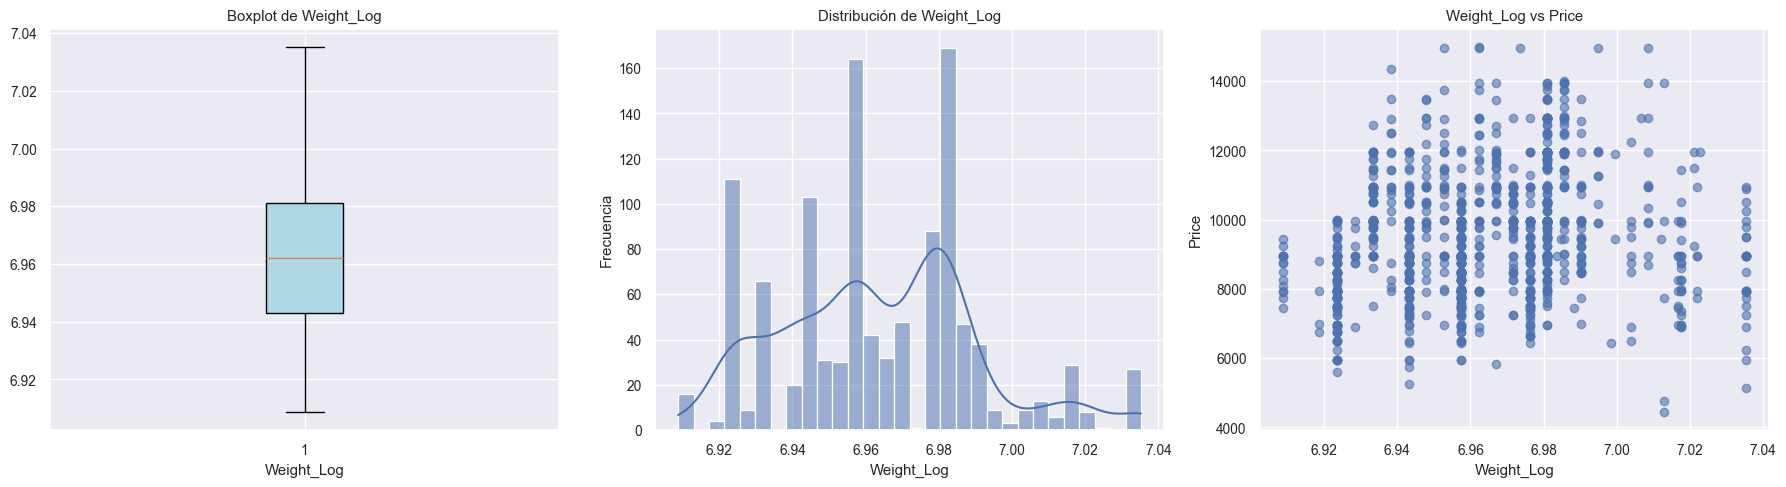

In [1148]:
df = df[clean_outliers_iqr(df["Weight_Log"])[1]]
plot_feature_analysis(df, "Weight_Log")

### HP


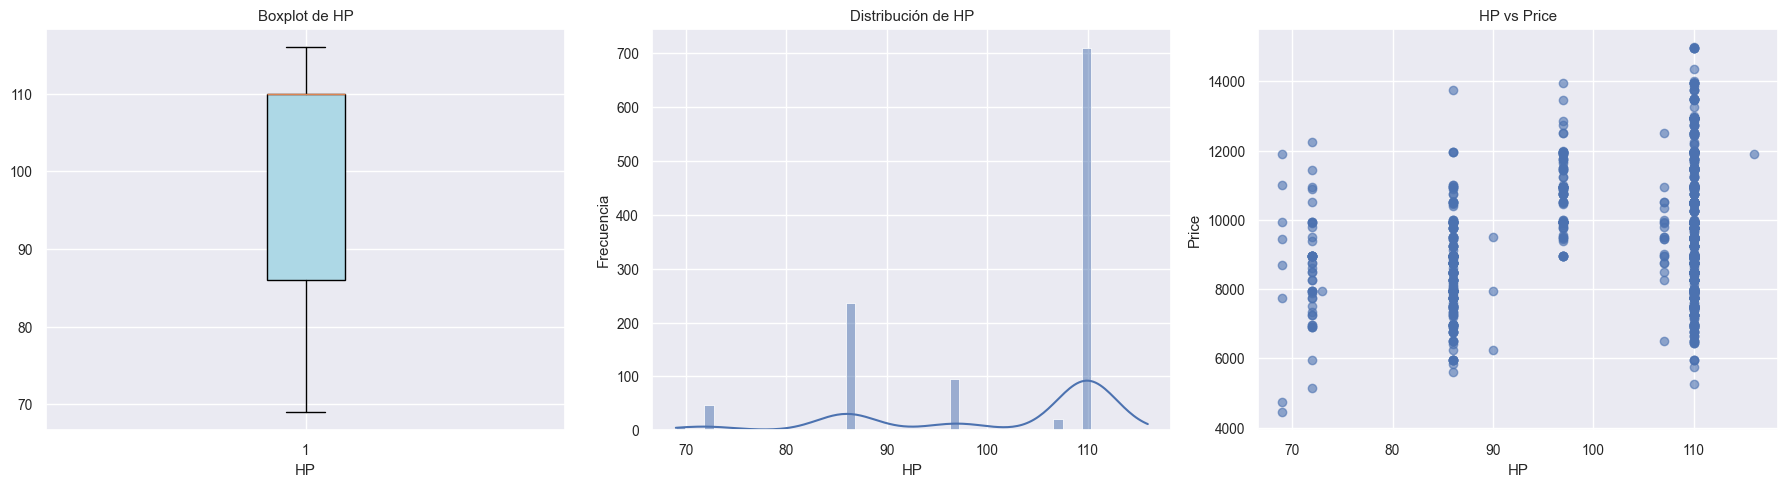

In [1149]:
plot_feature_analysis(df, "HP", bins=50)

### HP


No parece rescatable, y no derivamos ninguna feature de aquí


### Quarterly_Tax


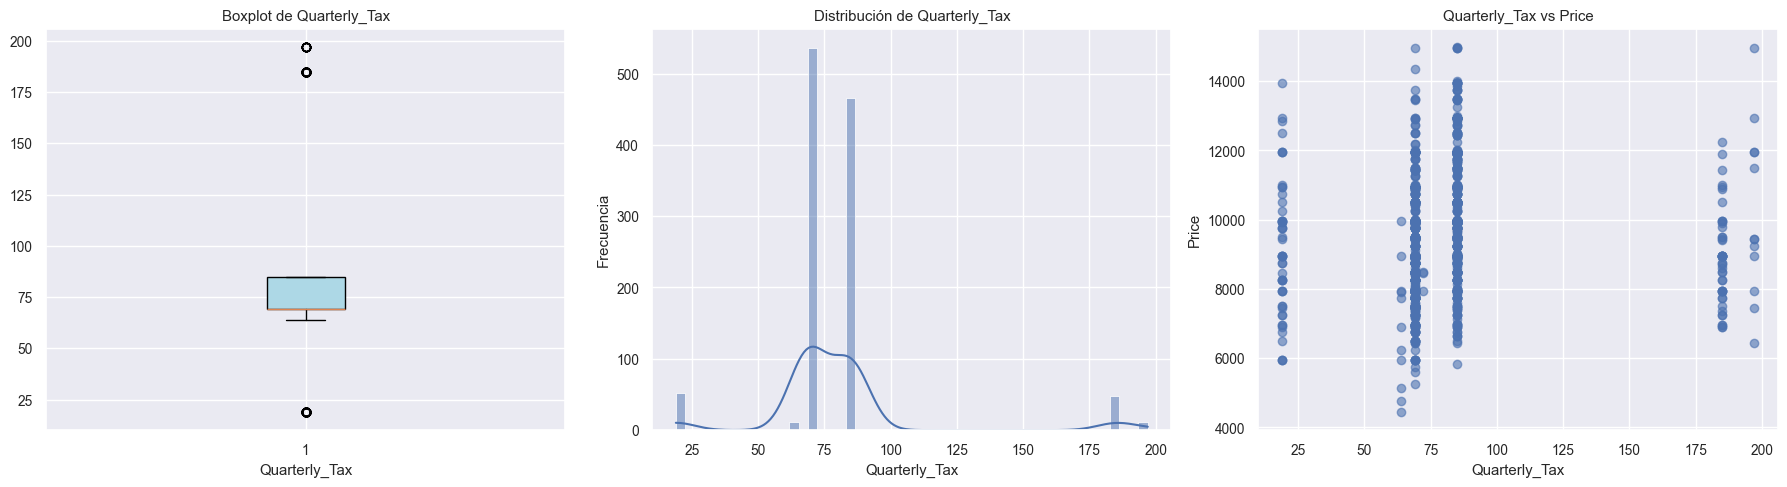

In [1150]:
plot_feature_analysis(df, "Quarterly_Tax", bins=50)

No se puede recuperar esta variable


### Resto de variables


No tiene sentido seguir limpiando, estamos en la marca de 1000 observaciones y las variables que quedan tienen una correlación muy baja


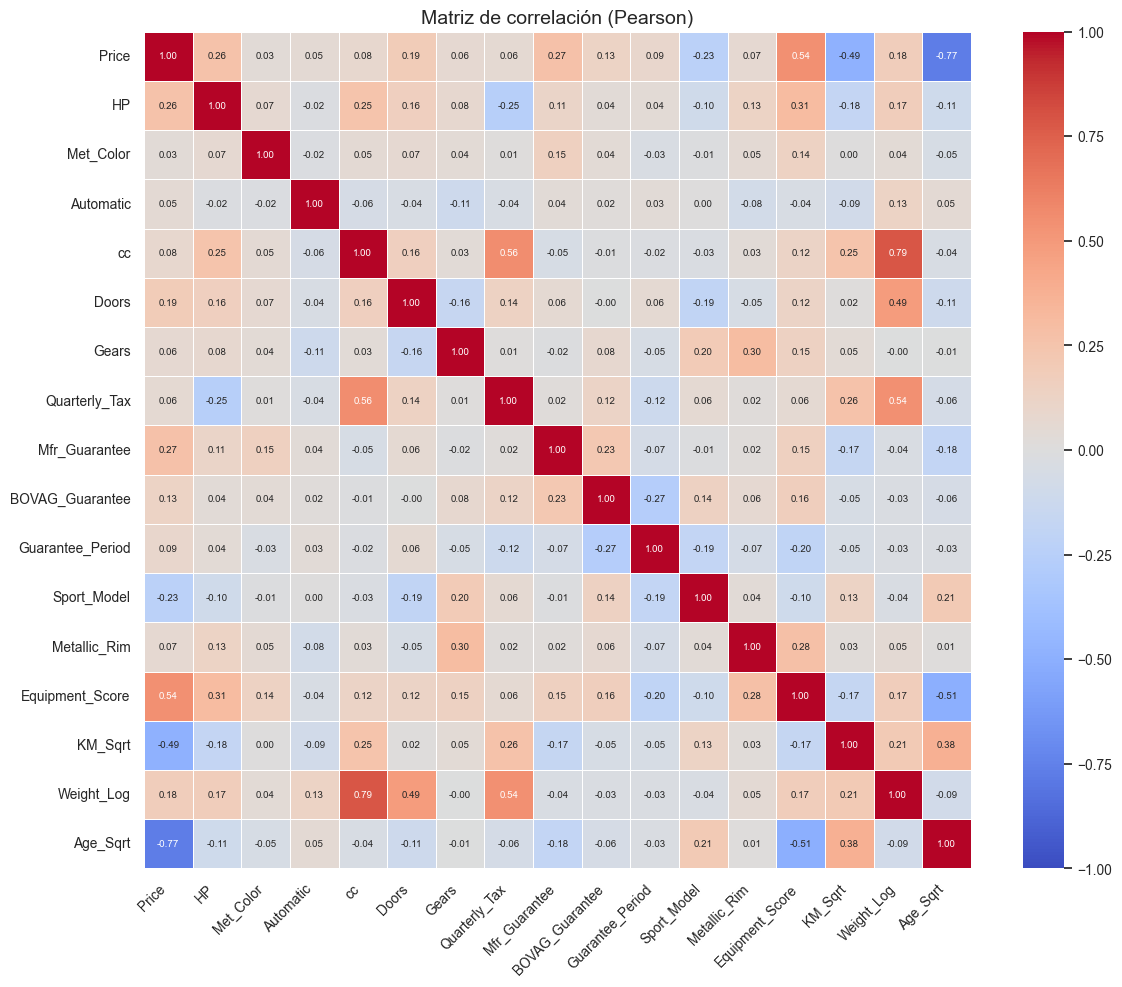

In [1193]:
matrix = show_correlation_matrix(df)

# Guardar dataset limpio


In [1151]:
from pathlib import Path


clean_path = Path("data/clean_df.csv").resolve()
df.to_csv(clean_path, index=False)
clean_path

PosixPath('/Users/tobiaspazposse/Documents/Datamining/parcial_toyotaCorolla/data/clean_df.csv')

In [1152]:
# orig_doors = pd.to_numeric(df["Doors"], errors="coerce").astype("Int64")

# raw = df["Model_Clean"].str.extract(
#     r"(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))", expand=False
# )


# def normalize(val):
#     if pd.isna(val):
#         return pd.NA
#     return max(map(int, val.split("/"))) if "/" in val else int(val)


# df["Doors_extracted"] = raw.apply(normalize).astype("Int64")
# df["Doors_extracted"].value_counts(dropna=False)

In [1153]:
# df["Doors"].value_counts(dropna=False)

In [1154]:
# orig_doors = pd.to_numeric(df["Doors"], errors="coerce").astype("Int64")

# raw = df["Model_Clean"].str.extract(
#     r"(\d(?:/\d)?)(?=\s*[-\s]?(?:Doors?|Drs?))", expand=False
# )


# def normalize(val):
#     if pd.isna(val):
#         return pd.NA
#     return max(map(int, val.split("/"))) if "/" in val else int(val)


# df["Doors_extracted"] = raw.apply(normalize).astype("Int64")

# body_map = {
#     "Sedan": 4,
#     "Coupe": 3,
#     "Convertible": 3,
#     "Hatchback": 5,
#     "Hatchb": 5,
#     "Wagon": 5,
#     "Stationwagen": 5,
#     "Sw": 5,
#     "Station": 5,
#     "Mpv": 5,
#     "Verso": 5,
# }
# mask_inf = df["Doors_extracted"].isna() & df["Body_Style"].notna()
# df.loc[mask_inf, "Doors_extracted"] = df.loc[mask_inf, "Body_Style"].map(body_map)
# manual_map = {"Gli": 4, "XLi": 4, "E-Four": 4, "XEi": 4, "16V": 4}


# def assign_manual(text):
#     for key, doors in manual_map.items():
#         if key.lower() in text.lower():
#             return doors
#     return pd.NA


# mask_man = df["Doors_extracted"].isna()
# df.loc[mask_man, "Doors_extracted"] = (
#     df.loc[mask_man, "Model_Clean"].apply(assign_manual).astype("Int64")
# )
# combined = pd.concat(
#     [orig_doors.fillna(0), df["Doors_extracted"].fillna(0)], axis=1
# ).max(axis=1)
# df["Doors"] = combined.replace({0: pd.NA}).astype("Int64")

# five_styles = {
#     "Hatchback",
#     "Hatchb",
#     "Wagon",
#     "Stationwagen",
#     "Sw",
#     "Station",
#     "Mpv",
#     "Verso",
# }


# def force_3_or_5(row):
#     d = row["Doors"]
#     if d in (3, 5):
#         return d
#     return 5 if row["Body_Style"] in five_styles else 3


# df["Doors"] = df.apply(force_3_or_5, axis=1).astype("Int64")
# df.drop(columns=["Doors_extracted"], inplace=True)

# print(df[["Model_Clean", "Doors"]])
# print("\nDistribución de Doors:")
# print(df["Doors"].value_counts(dropna=False))

Después de corregir la feature Doors veremos cómo quedó


In [1155]:
# df["Doors"].value_counts()

In [1156]:
# hist = histogram(df["Doors"], title="Doors")

Quedó bastante bien


En la siguiente celda, retiramos las features auxiliares derivadas de model para que no interfieran en el dataset


In [1157]:
# df.drop(
#     columns=["Model", "Model_Clean", "Model_Len", "Model_Words"],
#     inplace=True,
#     axis=1,
#     errors="ignore",
# )
# print(df.columns.tolist())

Ahora veremos qué tal las features nuevas en una matriz de correlación


In [1158]:
# df["Body_Style"].value_counts(dropna=False)

In [1159]:
# df[
#     [
#         "Doors",
#         "Brand",
#         "Series",
#         "Engine_Size",
#         "Engine_Tech",
#         "Body_Style",
#         "Trim",
#         "Price",
#     ]
# ]

In [1160]:
# df["Engine_Tech"].value_counts(dropna=False)

In [1161]:
# df["Body_Style"].value_counts()

Como notamos


In [1162]:
# matrix = show_correlation_matrix(
#     df[
#         [
#             "Doors",
#             "Brand",
#             "Series",
#             "Engine_Size",
#             "Engine_Tech",
#             "Body_Style",
#             "Trim",
#             "Price",
#         ]
#     ]
# )

## Eliminación de valores nulos


In [1163]:
# # Seleccionar columnas numéricas
# numeric_df = df.select_dtypes(include="number")

# # Verificar si hay valores negativos
# negativos_bool = (numeric_df < 0).any()

# # Convertir a DataFrame con nombre de columna y booleano
# negativos_df = negativos_bool.reset_index()
# negativos_df.columns = ["columna", "tiene_valores_negativos"]

# # Mostrar el resultado
# negativos_df

# Limpieza de datos


In [1164]:
# # Sacamos las columnas que no nos interesan
# df = df.drop(columns=["Id"], axis=1, errors="ignore")
# df

In [1165]:
# # 1. Obtener el número de nulos por columna
# null_counts = df.isnull().sum()

# # 2. Filtrar solo columnas con al menos un nulo
# null_counts = null_counts[null_counts > 0]

# # 3. Mostrar el resultado
# print(null_counts)

## Detección de valores duplicados


In [1166]:
# def duplicados_con_indices(df):
#     resultado = []

#     for i in range(len(df)):
#         fila_actual = df.iloc[i]
#         duplicado_en = False

#         for j in range(i):
#             if df.iloc[j].equals(fila_actual):
#                 duplicado_en = j
#                 break

#         resultado.append({"Fila": i, "Duplicado_de": duplicado_en})

#     # Convertir la lista de resultados en un DataFrame
#     df_resultado = pd.DataFrame(resultado)
#     return df_resultado


# df_re = duplicados_con_indices(df)

In [1167]:
# # Crear una columna 'dup_col' que marca los duplicados según df_re
# dup_col = "Duplicado_de"
# df[dup_col] = False
# for idx, orig in zip(df_re["Fila"], df_re["Duplicado_de"]):
#     df.at[idx, dup_col] = orig

# # 1) Filtrar las filas marcadas
# df_dup = df.loc[df[dup_col] != False]

# # 2) Sacar índices de duplicados y de sus originales
# dup_idxs = df_dup.index.tolist()
# orig_idxs = df_dup[dup_col].tolist()

# # 3) Unión única y ordenada de índices
# all_idxs = sorted(set(dup_idxs + orig_idxs))

# # 4) Extraer esas filas completas
# pd.set_option("display.max_columns", None)
# df_pairs = df.loc[all_idxs]

# # 5) Mostrar resultado
# df_pairs

In [1168]:
# # Verificar si hay columnas constantes
# columnas_cte = df.columns[df.nunique() == 1]
# print("Columnas constantes:", columnas_cte.tolist())

In [1169]:
# # borrar columnas constantes
# df.drop(columns=["Cylinders", "Brand", "Series"], axis=1, inplace=True)
# df

In [1170]:
# # Mostrar cantidad de outliers por columna
# resumen = resumen_outliers(df)
# resumen

In [1171]:
# # ------------------------------------------------
# # Detectar columnas con valores continuos en `df`
# # ------------------------------------------------

# from pandas.api.types import is_float_dtype, is_integer_dtype

# # Umbral mínimo de valores únicos para considerar un entero como “continuo”
# INT_UNIQUE_THRESHOLD = 20

# continuous_features = []
# for col in df.columns:
#     series = df[col]
#     # Si es float, lo consideramos continuo
#     if is_float_dtype(series):
#         continuous_features.append(col)
#     # Si es entero y tiene muchos valores únicos, también lo consideramos continuo
#     elif is_integer_dtype(series) and series.nunique() > INT_UNIQUE_THRESHOLD:
#         continuous_features.append(col)

# print("Features continuas detectadas:")
# for feat in continuous_features:
#     print(f" - {feat} (dtype={df[feat].dtype}, únicos={df[feat].nunique()})")

In [1172]:
# # Define tus cortes manuales
# bins = [df["Quarterly_Tax"].min() - 1, 100, 150, 200, df["Quarterly_Tax"].max()]
# labels = [1, 2, 3, 4]

# # Crea la categoría
# df["Tax_RangeCat"] = pd.cut(df["Quarterly_Tax"], bins=bins, labels=labels).astype(int)

# # Muestra la relación entre Quarterly_Tax y la nueva categoría
# print(
#     df[["Quarterly_Tax", "Tax_RangeCat"]]
#     .drop_duplicates()
#     .sort_values("Quarterly_Tax")
#     .reset_index(drop=True)
# )

In [1173]:
# df

In [1174]:
# # Primero ponemos las continuas en un nuevo DataFrame
# df_toyota_continuas = df[continuous_features].copy()

# # Ahora veremos BoxPlots e Histogramas con sus curva de densidad
# histogram_por_lotes(df_toyota_continuas, 6)

In [1175]:
# boxplots_por_lotes(df_toyota_continuas, 6)

---

### Price

* **Distribución**: el histograma muestra una distribución con pico principal entre \$8 000 y \$12 000, con una larga cola hacia la derecha que llega hasta \$30 000. La curva de densidad confirma ese sesgo positivo.
* **Boxplot**: la mediana está cerca de \$10 000; el IQR va aproximadamente de \$8 000 a \$12 000. Hay muchos valores atípicos por encima de \$15 000, que corresponden a modelos o equipamientos premium.
* **Interpretación**: la mayoría de los coches se cotizan en un rango estrecho, pero existen unos pocos vehículos de alto precio que inflan la cola, por lo que conviene una transformación (por ejemplo, log) o tratar outliers antes de modelar.

---

### Age_08_04

- **Distribución**: el histograma es prácticamente creciente desde valores bajos hasta el máximo (\~80), y la densidad señala que hay un acumulado mayor en edades altas. No es simétrica: hay más coches "viejos".
- **Boxplot**: la mediana está en torno a 60–65, el IQR entre \~50 y \~70, con algunos autos muy recientes (cerca de 0) como outliers en la izquierda.
- **Interpretación**: la flota tiende a concentrarse en edades entre 50 y 80 años (o unidades de medida), con pocos vehículos nuevos. Al modelar, podría ser útil agrupar edades muy bajas o muy altas o usar técnicas robustas a outliers.

---

### KM

- **Distribución**: el histograma con KDE presenta un solo pico alrededor de 50 000–75 000 km y luego una cola larga hacia la derecha hasta >200 000 km.
- **Boxplot**: la mediana se sitúa cerca de 75 000 km; el IQR va de \~50 000 a \~100 000 km. Varios outliers por encima de 150 000 km.
- **Interpretación**: la mayoría de los vehículos tienen kilometrajes moderados, pero existe un subgrupo con uso intensivo. Para regresión podría convenir una transformación (raíz o log) y evaluar si recortar o imputar outliers.

---

### Weight

- **Distribución**: el histograma muestra un pico muy marcado entre 1 000 y 1 100 kg, con una cola derecha que llega hasta 1 600 kg; la densidad refleja un sesgo ligero a la derecha.
- **Boxplot**: la mediana ronda 1 050 kg, el IQR entre \~1 015 y \~1 100 kg, con algunos valores muy pesados como outliers.
- **Interpretación**: el peso es bastante homogéneo (la mayoría alrededor de \~1 050 kg), pero hay versiones más pesadas que conviene revisar (p. ej. carrocerías especiales o variante 4×4). Para modelar, quizá baste winsorizar esos pocos valores extremos.

---

**Resumen general**:

- **Precio** y **KM** presentan sesgo positivo y varios outliers altos.
- **Edad** está sesgada hacia valores altos, con pocos coches muy nuevos.
- **Peso** es la más concentrada, aunque con alguna cola derecha.


In [1176]:
# # Variables enteras

# df_toyota_enteras = df.copy()
# df_toyota_enteras.drop(
#     columns=[
#         "Price",
#         "Quarterly_Tax",
#         "Weight",
#         "KM",
#         "Mfr_Guarantee",
#         "BOVAG_Guarantee",
#         "ABS",
#         "Airbag_1",
#         "Airbag_2",
#         "Airco",
#         "Automatic_airco",
#         "Boardcomputer",
#         "CD_Player",
#         "Central_Lock",
#         "Met_Color",
#         "Powered_Windows",
#         "Power_Steering",
#         "Radio",
#         "Mistlamps",
#         "Sport_Model",
#         "Backseat_Divider",
#         "Metallic_Rim",
#         "Radio_cassette",
#         "Tow_Bar",
#         "Age_08_04_calculada",
#         "Fuel_Type",
#         "Automatic",
#     ],
#     axis=1,
#     inplace=True,
#     errors="ignore",  # Ignore if any column is missing
# )

In [1177]:
# df_toyota_enteras.describe().T

In [1178]:
# bar_por_lotes(df_toyota_enteras, 3)

# Eliminación de outliers en Price


In [1179]:
# # Eliminacion de outliers y/o Transformacion para varibles continuas

# histogram(df_toyota_continuas["Price"])
# boxplot(df_toyota_continuas["Price"])

Dicha distribucion presenta una sesgo hacia la izquierda por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distrubucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


In [1180]:
# price = df_toyota_continuas["Price"].copy()
# _, mask_price = limpiar_outliers_z_core(price)
# price_limpio = price[mask_price]
# histogram(price_limpio)
# boxplot(price_limpio)

# print(len(price) - len(price_limpio))

# price_limpio_l, mask_price_l = limpiar_outliers_z_core(price_limpio)

# histogram(price_limpio_l)

# boxplot(price_limpio_l)

# print(len(price_limpio) - len(price_limpio_l))

# Eliminación de outliers en KM


In [1181]:
# histogram(df_toyota_continuas["KM"])
# boxplot(df_toyota_continuas["KM"])

dicha distribucion presenta una sesgo hacia la derecha por lo tanto hay que eliminar esos outliers, como el histograma lo presenta vemos que es una distribucion que se acerca mucho a una `distribucion normal` lo que haremos es eliminar los outliers con el metodo llamado `z-core`


In [1182]:
# km = df_toyota_continuas["KM"].copy()
# _, mask_km = limpiar_outliers_z_core(km)
# km_limpio = km[mask_km]
# histogram(km_limpio)
# boxplot(km_limpio)
# print(len(km) - len(km_limpio))

# Eliminacion de outliers en Weight


In [1183]:
# histogram(df_toyota_continuas["Price"])
# boxplot(df_toyota_continuas["Price"])

In [1184]:
# # 1. Copiar la serie de peso
# peso = df_toyota_continuas["Weight"].copy()

# # 2. Obtener la máscara de valores válidos con tu función de Z-score
# _, mask_peso = limpiar_outliers_z_core(peso)

# # 3. Filtrar los datos limpios
# peso_limpio = peso[mask_peso]

# # 4. Visualizar distribución y outliers
# histogram(peso_limpio)
# boxplot(peso_limpio)

# # 5. Imprimir cuántos registros se eliminaron
# print(f"Registros removidos: {len(peso) - len(peso_limpio)}")

# Eliminacion de outliers en Age


In [1185]:
# histogram(df_toyota_continuas["Age_08_04"])
# boxplot(df_toyota_continuas["Age_08_04"])

# Analisis Bivariado con dataframe original


In [1186]:
# from sklearn.preprocessing import LabelEncoder

# df["fuel_type_encoded"] = LabelEncoder().fit_transform(df["Fuel_Type"])

In [1187]:
# matriza = mostrar_matriz_correlacion(df)

Price vs. Mfg_Year (r ≈ +0.89)

Los autos más nuevos (año de fabricación alto) tienden a tener precios más elevados. Cada año adicional aumenta fuertemente el valor.

Price vs. Age_08_04 (r ≈ –0.88)

Edad y precio son espejo: a más antigüedad (edad alta) el precio baja. Cada unidad de edad adicional desploma el valor de manera proporcional.

Mfg_Year vs. Age_08_04 (r ≈ –0.98)

Lógicamente inversas: un coche más nuevo (año alto) tiene poca “edad” registrada.

Quarterly_Tax vs. Tax_RangeCat (r ≈ +0.93)

El impuesto trimestral está prácticamente definido por la categoría de rango fiscal; son casi sinónimos cuantitativos.

Airco vs. Automatic_airco (r ≈ +0.72)

Tener aire acondicionado se superpone en gran medida con la versión “automática” de ese aire, indica redundancia de ambas variables.

Boardcomputer vs. Mfg_Year (r ≈ +0.72)

Los coches más modernos casi siempre traen ordenador de a bordo, reflejando que ese equipamiento se incorporó en modelos recientes.

Central_Lock vs. Powered_Windows (r ≈ +0.88)

El cierre centralizado y las ventanillas eléctricas suelen venir juntos en el mismo nivel de acabado.

Radio vs. Radio_cassette (r ≈ +0.99)

HP vs. Mfg_Year (r ≈ +0.72)
Modelos más nuevos tienden a tener más potencia; esta alta colinealidad puede inflar la varianza de los coeficientes si ambas variables entran al mismo tiempo.

Casi todos los coches con radio incorporan también reproductor de casete; las dos variables miden esencialmente el mismo equipamiento.


In [1188]:
# # Realizamos feature selection de acuerdo a la alta correlacion
# cols_to_drop = [
#     "Mfg_Year",
#     "Age_08_04",
#     "Tax_RangeCat",
#     "Automatic_airco",
#     "Boardcomputer",
#     "Powered_Windows",
#     "Radio_cassette",
#     "Fuel_Type",
#     "Quarterly_Tax",
#     "BOVAG_Guarantee",
#     "Duplicado_de",
# ]

# df_clean = df.drop(columns=cols_to_drop)
# df_clean

In [1189]:
# matriz = mostrar_matriz_correlacion(df_clean)

In [1190]:
# df.columnas

In [1191]:
# df.dtypes

In [1192]:
# from pathlib import Path


# clean_path = Path("data/clean_df.csv").resolve()
# df_clean.to_csv(clean_path, index=False)
# clean_path